In [1]:
from importlib import reload
import os
import glob2
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
import numpy as np
import sys
#sys.path.pop(0)

In [2]:
import hpfspec
import hpfspecmatch
hpfspecmatch

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False


/home/sejones/anaconda3/lib/python3.8/site-packages/radvel/gp.py:32: ImportWarning: celerite not installed. GP kernals using celerite will not work. Try installing celerite using 'pip install celerite'
  warnings.warn("celerite not installed. GP kernals using celerite will not work. \


<module 'hpfspecmatch' from '/home/sejones/anaconda3/lib/python3.8/site-packages/hpfspecmatch-0.1.0-py3.8.egg/hpfspecmatch/__init__.py'>

# Read in SpecMatch master 

In [3]:
#df_master = pd.read_csv('../lib/SPECMATCH_MASTER_with_ids.csv',comment='%')
df_master = pd.read_csv('../lib/SPECMATCH_MASTER_with_ids_using.csv')
df_master

,Name,Teff,e_Teff,R*,e_R*,log(g),e_log(g),[Fe/H],e_[Fe/H],M*,e_M*,logAge,e_logAge,plx,Vmag,Notes,SCat,unknown,Gaia,2M,Simbad,_RA,_DE,simbadnames,ID_NAME
0,HD_100623,5140,60,0.720,0.040,4.56,0.05,-0.36,0.05,0.75,0.04,9.81,0.50,104.6,6.0,A,1,1,Gaia,2M,Simbad,173.62286,-32.83134,PLX_2678|CD-32__8179|CPC_17__5727|CPD-32__3122...,Gaia_DR2_3478127463341507072
1,HD_101904,5883,60,1.540,0.190,4.10,0.05,0.12,0.05,1.12,0.09,9.80,0.11,12.5,8.2,A,1,1,Gaia,2M,Simbad,176.00117,64.96420,SPOCS_2801|AG+65__578|AGKR_10518|BD+65___848|G...,Gaia_DR2_864492018067010560
2,HD_102195,5277,60,0.850,0.050,4.50,0.05,0.10,0.05,0.89,0.04,9.74,0.49,34.0,8.1,A,1,1,Gaia,2M,Simbad,176.42622,2.82148,SPOCS_2802|LSPM_J1145+0249|TYC__275-157-1|ASCC...,Gaia_DR2_3799626935341796096
3,HD_102444,5227,60,2.670,0.390,3.60,0.05,0.00,0.05,1.02,0.21,9.98,0.27,8.5,8.0,A,1,1,Gaia,2M,Simbad,176.88109,-5.26362,Gaia_DR2_3598898374589122432|UCAC4_424-055472|...,Gaia_DR2_3598898374589122432
4,HD_102956,4985,60,3.790,0.470,3.38,0.05,0.26,0.05,1.30,0.15,9.70,0.17,8.1,7.9,A,1,1,Gaia,2M,Simbad,177.84380,57.64073,SPOCS_2804|AG+57__830|AGKR_10629|BD+58__1340|G...,Gaia_DR2_845335158256083584
5,HD_103459,5722,60,1.710,0.210,4.03,0.05,0.24,0.05,1.15,0.12,9.81,0.15,16.0,7.6,A,2,1,Gaia,2M,Simbad,178.71649,-1.45149,PLX_2755|SPOCS_2809|AG-01_1627|AGKR_10683|BD-0...,Gaia_DR2_3602296587073060224
6,HD_103890,6120,60,1.430,0.160,4.19,0.05,0.03,0.05,1.17,0.07,9.63,0.09,13.7,8.0,A,1,1,Gaia,2M,Simbad,179.44244,-8.27528,SPOCS_2814|BD-07__3323|GSC_05518-00363|HD_1038...,Gaia_DR2_3594215344111465344
7,HD_104437,5761,60,1.030,0.090,4.40,0.05,0.17,0.05,1.03,0.04,9.64,0.35,16.6,8.6,A,1,1,Gaia,2M,Simbad,180.42003,39.58659,SPOCS_2817|AG+39_1229|AGKR_10784|BD+40__2490|F...,Gaia_DR2_4034726367018683520
8,HD_106088,5470,60,2.070,0.260,3.87,0.05,0.34,0.05,1.23,0.12,9.75,0.13,10.3,8.4,A,1,1,Gaia,2M,Simbad,183.10271,19.80102,SPOCS_2824|AG+20_1323|AGKR_10941|BD+20__2693|G...,Gaia_DR2_3951357650189291392
9,HD_107181,5628,60,1.640,0.210,4.05,0.05,0.31,0.05,1.13,0.12,9.86,0.15,12.5,8.4,A,1,1,Gaia,2M,Simbad,184.86392,-26.10737,SPOCS_2830|GC_16801|CD-25__9167|CPD-25__4923|G...,Gaia_DR2_3476529086968390912


In [4]:
#df_master['ID_NAME'] = [hpfspecmatch.filter_simbadnames(i.split('|')) for i in df_master.simbadnames.values]
#df_master.to_csv('../lib/SPECMATCH_MASTER_with_ids_using.csv',index=False)

# Query specmatch ids 

In [5]:
# List of fitsfiles
LIBRARY_DIR = '../library/20201008_specmatch_nir/'

library_fitsfiles = glob2.glob(LIBRARY_DIR+'FITS/*/*.fits')

# Read in all files as a HPFSpecList object
HLS = hpfspec.HPFSpecList(filelist=library_fitsfiles)

Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_3507.config
No section: 'targetinfo' File does not exist!
Querying SIMBAD for data
Saving to file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_3507.config
ra 128.63188249999996
dec -0.7260633333333334
pmra -195.544
pmdec 18.204
px 47.4029
rv 34990.0
epoch 2451545.0
Done
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -114.66667km/s
Second iteration: RVabs = -115.28023km/s, sigma=2.68944
RVabs it #1: -114.66667+- 0.00000km/s
RVabs it #2: -115.28023+- 0.00000km/s
berv=-24.16206576724576,rv=-115.28022716839078
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_109.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 30.50000km/s
Second iter

Saving to file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/HD_173701.config
ra 281.14633
dec 43.83327472222223
pmra -105.631
pmdec -1.833
px 36.9783
rv -45555.0
epoch 2451545.0
Done
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -45.00000km/s
Second iteration: RVabs = -44.81863km/s, sigma=2.97589
RVabs it #1: -45.00000+- 0.00000km/s
RVabs it #2: -44.81863+- 0.00000km/s
berv=2.234233987627185,rv=-44.818632320952936
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/HD_28343.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -35.00000km/s
Second iteration: RVabs = -34.99088km/s, sigma=2.97314
RVabs it #1: -35.00000+- 0.00000km/s
RVabs it #2: -34.99088+- 0.00000km/s
berv=5.922571435310169,rv=-34.99088083941696
Reading from file /home/sejones/anaconda3/lib/python3

Saving to file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_172.config
ra 69.42054458333332
dec 52.893614166666666
pmra 303.96
pmdec -475.032
px 100.7797
rv 34030.0
epoch 2451545.0
Done
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 34.66667km/s
Second iteration: RVabs = 34.42472km/s, sigma=3.09214
RVabs it #1: 34.66667+- 0.00000km/s
RVabs it #2: 34.42472+- 0.00000km/s
berv=17.529476076277103,rv=34.42472164264387
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_880.config
No section: 'targetinfo' File does not exist!
Querying SIMBAD for data
Saving to file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_880.config
ra 344.1450195833333
dec 16.55343138888889
pmra -1034.803
pmdec -283.998
px 145.6107
rv -27334.0
epoch 2451545.0
Done
Barycentric shiftin

Saving to file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_658.config
ra 257.6567058333333
dec 24.53243583333333
pmra -203.026
pmdec 236.044
px 28.4548
rv -59579.0
epoch 2451545.0
Done
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -59.16667km/s
Second iteration: RVabs = -58.89987km/s, sigma=2.94681
RVabs it #1: -59.16667+- 0.00000km/s
RVabs it #2: -58.89987+- 0.00000km/s
berv=-2.2683517173956265,rv=-58.899867309053434
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_3743.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -9.33333km/s
Second iteration: RVabs = -9.18861km/s, sigma=3.17345
RVabs it #1: -9.33333+- 0.00000km/s
RVabs it #2: -9.18861+- 0.00000km/s
berv=18.261563112685042,rv=-9.188611202534236
Reading from file /home/sejones/anaconda3/lib/pyt

Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/*_111_Tau_B.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 38.50000km/s
Second iteration: RVabs = 38.89993km/s, sigma=3.25551
RVabs it #1: 38.50000+- 0.00000km/s
RVabs it #2: 38.89993+- 0.00000km/s
berv=12.474248238189897,rv=38.899926819025445
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_9066.config
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -28.66667km/s
Second iteration: RVabs = -28.75085km/s, sigma=3.73019
RVabs it #1: -28.66667+- 0.00000km/s
RVabs it #2: -28.75085+- 0.00000km/s
berv=29.52171137557641,rv=-28.750850328254757
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_173.config
Barycentric shifting
AIR

First iteration:  RVabs = 12.50000km/s
Second iteration: RVabs = 12.47525km/s, sigma=3.02655
RVabs it #1: 12.50000+- 0.00000km/s
RVabs it #2: 12.47525+- 0.00000km/s
berv=20.32041091086356,rv=12.475246192835195
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_649.1_C.config
No section: 'targetinfo' File does not exist!
Querying SIMBAD for data
Saving to file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/GJ_649.1_C.config
ra 254.4259504166666
dec 47.36214277777778
pmra -139.712
pmdec 262.08
px 55.7171
rv -7166.0
epoch 2451545.0
Done
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -6.50000km/s
Second iteration: RVabs = -6.69575km/s, sigma=3.23485
RVabs it #1: -6.50000+- 0.00000km/s
RVabs it #2: -6.69575+- 0.00000km/s
berv=10.140518532981062,rv=-6.695749554004982
Reading from file /home/sejones/anaconda3/lib/pytho

First iteration:  RVabs = -17.83333km/s
Second iteration: RVabs = -17.72558km/s, sigma=3.10865
RVabs it #1: -17.83333+- 0.00000km/s
RVabs it #2: -17.72558+- 0.00000km/s
berv=24.111441252189323,rv=-17.725577465794068
Reading from file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/LSPM_J1916+0510.config
No section: 'targetinfo' File does not exist!
Querying SIMBAD for data
Saving to file /home/sejones/anaconda3/lib/python3.8/site-packages/hpfspec-0.1.0-py3.8.egg/hpfspec/data/target_files/LSPM_J1916+0510.config
ra 289.23023541666663
dec 5.1688994444444445
pmra -579.043
pmdec -1332.743
px 169.159
rv 35884.0
epoch 2451545.0
Done
Barycentric shifting
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 35.83333km/s
Second iteration: RVabs = 35.84616km/s, sigma=2.82295
RVabs it #1: 35.83333+- 0.00000km/s
RVabs it #2: 35.84616+- 0.00000km/s
berv=26.26844144866483,rv=35.84616398767652
Reading from file /home/sejones/

In [6]:
df_files = HLS.df
df_files['basenames'] = [i.split(os.sep)[-1] for i in df_files.filename.values]
df_files

,OBJECT_ID,filename,exptime,sn18,qprog,rv,basenames
0,GJ_3507,../library/20201008_specmatch_nir/FITS/158_727...,330.15,322.286835,PSU20-1-012,-115.280227,Slope-20200331T040315_R01.optimal.fits
1,GJ_109,../library/20201008_specmatch_nir/FITS/265_GL1...,649.65,501.315796,PSU19-1-013,30.515882,Slope-20181221T061620_R01.optimal.fits
2,GJ_411,../library/20201008_specmatch_nir/FITS/390_957...,63.90,677.483765,ENG19-2-003,-84.725129,Slope-20190512T052546_R01.optimal.fits
3,NLTT_57303,../library/20201008_specmatch_nir/FITS/99_2218...,969.15,477.344482,UT20-2-007,-12.142036,Slope-20200801T105922_R01.optimal.fits
4,GJ_176,../library/20201008_specmatch_nir/FITS/391_GJ1...,330.15,261.819824,UT20-1-008,26.186852,Slope-20191208T040844_R01.optimal.fits
5,HD_186306,../library/20201008_specmatch_nir/FITS/216_KIC...,330.15,273.051483,PSU20-1-012,-59.836882,Slope-20200323T114445_R01.optimal.fits
6,GJ_725_A,../library/20201008_specmatch_nir/FITS/340_173...,181.05,573.382507,UT20-3-013,-0.734468,Slope-20200821T052005_R01.optimal.fits
7,GJ_694,../library/20201008_specmatch_nir/FITS/275_GL6...,649.65,440.992493,UT20-2-007,-14.304826,Slope-20200622T091705_R01.optimal.fits
8,GJ_134,../library/20201008_specmatch_nir/FITS/288_HIP...,969.15,480.095947,UT20-1-008,-4.232166,Slope-20191224T011605_R01.optimal.fits
9,GJ_436,../library/20201008_specmatch_nir/FITS/401_HIP...,649.65,513.594360,ENG20-1-003,9.568895,Slope-20200208T064809_R01.optimal.fits


In [7]:
# Query simbad object_names
for i in range(len(df_files)):
    names = hpfspecmatch.get_simbad_object_names(df_files.loc[i,'OBJECT_ID'],as_str=True)
    df_files.loc[i,'simbadnames'] = names
    df_files.loc[i,'ID_NAME'] = hpfspecmatch.filter_simbadnames(names.split('|'))
    print(i,names[0:20],df_files.loc[i,'ID_NAME'])
df_files

# Merge
df_comb = pd.merge(df_master,df_files,on='ID_NAME',)
df_comb

0 WDS_J08345-0044A|**_ Gaia_DR2_3073562610873679872
1 Karmn_J02442+255|PLX Gaia_DR2_114207651462714880
2 Karmn_J11033+359|PLX HD__95735
3 [SMM2006]_SPG_171|SP Gaia_DR2_2647148976301673472
4 1RXS_J044254.6+18571 Gaia_DR2_3409711211681795584
5 KIC_7970740|SPOCS_23 Gaia_DR2_2078105327586616704
6 Karmn_J18427+596N|PL Gaia_DR2_2154880616773521408
7 WDS_J17439+4323A|**_ Gaia_DR2_1349047857580994560
8 Karmn_J03181+382|2MA Gaia_DR2_235383247412615936
9 Karmn_J11421+267|TYC Gaia_DR2_4017860992519744384
10 Karmn_J22021+014|PLX Gaia_DR2_2683023811628007296
11 PLX_2298|AC_+13__130 Gaia_DR2_614543647497149056
12 AG+34_1066|BD+34__20 Gaia_DR2_747266452000257280
13 2MASS_J03550380+6110 Gaia_DR2_474648763011926272
14 KIC_8006161|PLX_4329 Gaia_DR2_2117279002732678656
15 Karmn_J04290+219|PM_ Gaia_DR2_145421309108301184
16 Karmn_J09143+526|PM_ Gaia_DR2_1022456139210632064
17 Karmn_J23492+024|PLX Gaia_DR2_2739689239311660672
18 PLX_5293|BD+31__4574 Gaia_DR2_1898230241798771584
19 Karmn_J01433+043|2MA Gaia

,Name,Teff,e_Teff,R*,e_R*,log(g),e_log(g),[Fe/H],e_[Fe/H],M*,e_M*,logAge,e_logAge,plx,Vmag,Notes,SCat,unknown,Gaia,2M,Simbad,_RA,_DE,simbadnames_x,ID_NAME,OBJECT_ID,filename,exptime,sn18,qprog,rv,basenames,simbadnames_y
0,HD_102195,5277,60,0.850,0.050,4.50,0.05,0.10,0.05,0.89,0.04,9.74,0.49,34.0,8.1,A,1,1,Gaia,2M,Simbad,176.42622,2.82148,SPOCS_2802|LSPM_J1145+0249|TYC__275-157-1|ASCC...,Gaia_DR2_3799626935341796096,NLTT_28458,../library/20201008_specmatch_nir/FITS/2_10219...,649.65,339.875092,UT20-2-007,2.688682,Slope-20200428T055102_R01.optimal.fits,NAME_Flegetonte|SPOCS_2802|LSPM_J1145+0249|TYC...
1,HD_110463,4906,60,0.760,0.030,4.55,0.05,0.06,0.05,0.80,0.04,9.73,0.52,44.1,8.3,A,1,1,Gaia,2M,Simbad,190.43551,55.72467,SPOCS_2843|V*_NP_UMa|NSV_19460|AC2000_1833644|...,Gaia_DR2_1571411233756165248,GJ_3743,../library/20201008_specmatch_nir/FITS/15_1104...,649.65,514.133606,UT20-1-008,-9.188611,Slope-20191203T123535_R01.optimal.fits,WDS_J12417+5543A|**_SHY___64A|WISE_J124144.69+...
2,HD_110743,5198,60,0.840,0.050,4.47,0.05,0.01,0.05,0.84,0.04,9.98,0.40,22.9,8.8,A,2,1,Gaia,2M,Simbad,190.97652,34.34372,SBC9_3576|SPOCS_2844|LSPM_J1243+3420|TYC_2533-...,Gaia_DR2_1515243640027361024,NLTT_31697,../library/20201008_specmatch_nir/FITS/17_1107...,969.15,378.116333,UT20-2-007,-6.097251,Slope-20200402T041219_R01.optimal.fits,SBC9_3576|SPOCS_2844|LSPM_J1243+3420|TYC_2533-...
3,HD_110833,4999,60,0.800,0.040,4.51,0.05,0.18,0.05,0.83,0.04,9.86,0.50,66.4,7.0,A,2,1,Gaia,2M,Simbad,191.06060,51.75930,SBC9_3625|PLX_2933|SPOCS_2845|LSPM_J1244+5145|...,Gaia_DR2_1568219729458240128,GJ_483,../library/20201008_specmatch_nir/FITS/18_1108...,202.35,438.896149,UT20-1-008,10.405539,Slope-20191221T105911_R01.optimal.fits,WDS_J12442+5146A|**_RDR____5A|SBC9_3625|PLX_29...
4,HD_112914,4816,60,0.700,0.030,4.51,0.05,-0.26,0.05,0.71,0.03,10.00,0.45,41.4,8.6,A,2,1,Gaia,2M,Simbad,194.88659,41.98676,SBC9_1742|LSPM_J1259+4159|ASCC__409814|UCAC2__...,Gaia_DR2_1527631807474248448,NLTT_32537,../library/20201008_specmatch_nir/FITS/21_1129...,649.65,330.296814,UT20-1-008,27.064545,Slope-20200108T094852_R01.optimal.fits,SBC9_1742|LSPM_J1259+4159|ASCC__409814|UCAC2__...
5,HD_153525,4826,60,0.740,0.030,4.54,0.05,0.03,0.05,0.78,0.04,9.83,0.51,55.7,7.9,A,1,0,Gaia,2M,Simbad,254.42595,47.36214,PLX_3858.0|SPOCS_2941|LSPM_J1657+4721|TYC_3500...,Gaia_DR2_1408029436569383296,GJ_649.1_C,../library/20201008_specmatch_nir/FITS/54_1535...,330.15,485.129883,UT20-1-008,-6.695750,Slope-20200311T100551_R01.optimal.fits,PLX_3858.0|SPOCS_2941|LSPM_J1657+4721|TYC_3500...
6,HD_155456,5225,60,0.910,0.070,4.43,0.05,0.26,0.05,0.88,0.04,10.02,0.33,28.3,8.3,A,1,1,Gaia,2M,Simbad,257.65671,24.53244,PLX_3900|SPOCS_2944|LSPM_J1710+2431|TYC_2065-6...,Gaia_DR2_4571935477627652736,GJ_658,../library/20201008_specmatch_nir/FITS/56_1554...,649.65,511.789490,UT20-2-007,-58.899867,Slope-20200610T091513_R01.optimal.fits,PLX_3900|SPOCS_2944|LSPM_J1710+2431|TYC_2065-6...
7,HD_155712,4911,60,0.750,0.040,4.52,0.05,-0.07,0.05,0.77,0.04,9.91,0.49,48.7,8.0,A,2,1,Gaia,2M,Simbad,258.15676,18.35120,SPOCS_2947|LSPM_J1712+1821|ASCC__876885|USNO-B...,Gaia_DR2_4548462729742343296,LSPM_J1712+1821,../library/20201008_specmatch_nir/FITS/57_1557...,330.15,495.275513,UT20-1-008,20.369588,Slope-20200208T121845_R01.optimal.fits,SPOCS_2947|LSPM_J1712+1821|ASCC__876885|USNO-B...
8,HD_164922,5341,60,0.950,0.080,4.39,0.05,0.15,0.05,0.88,0.04,10.07,0.18,45.4,7.0,A,1,1,Gaia,2M,Simbad,270.62859,26.31300,PLX_4127|LSPM_J1802+2618|ASCC__698943|2MASS_J1...,Gaia_DR2_4582680493669880704,LHS_3353,../library/20201008_specmatch_nir/FITS/61_1649...,255.60,547.789124,UT20-2-007,-124.619341,Slope-20200630T034130_R01.optimal.fits,PLX_4127|LSPM_J1802+2618|ASCC__698943|2MASS_J1...
9,HD_18143,5101,60,0.880,0.060,4.43,0.05,0.27,0.05,0.86,0.04,10.06,0.29,44.3,7.6,A,1,1,Gaia,2M,Simbad,43.91274,26.87321,Gaia_DR1_116037406313944960|ASCC__655288|2MASS...,Gaia_DR1_116037406313944960,LSPM_J0255+2652E,../library/20201008_specmatch_nir/FITS/70_1814...,649.65,655.59661

In [8]:
len(df_files), len(df_comb)

(88, 88)

In [9]:
df_comb.to_csv('../library/20201008_specmatch_nir/20201008_specmatch_nir.csv',index=False)

In [10]:
df_comb

,Name,Teff,e_Teff,R*,e_R*,log(g),e_log(g),[Fe/H],e_[Fe/H],M*,e_M*,logAge,e_logAge,plx,Vmag,Notes,SCat,unknown,Gaia,2M,Simbad,_RA,_DE,simbadnames_x,ID_NAME,OBJECT_ID,filename,exptime,sn18,qprog,rv,basenames,simbadnames_y
0,HD_102195,5277,60,0.850,0.050,4.50,0.05,0.10,0.05,0.89,0.04,9.74,0.49,34.0,8.1,A,1,1,Gaia,2M,Simbad,176.42622,2.82148,SPOCS_2802|LSPM_J1145+0249|TYC__275-157-1|ASCC...,Gaia_DR2_3799626935341796096,NLTT_28458,../library/20201008_specmatch_nir/FITS/2_10219...,649.65,339.875092,UT20-2-007,2.688682,Slope-20200428T055102_R01.optimal.fits,NAME_Flegetonte|SPOCS_2802|LSPM_J1145+0249|TYC...
1,HD_110463,4906,60,0.760,0.030,4.55,0.05,0.06,0.05,0.80,0.04,9.73,0.52,44.1,8.3,A,1,1,Gaia,2M,Simbad,190.43551,55.72467,SPOCS_2843|V*_NP_UMa|NSV_19460|AC2000_1833644|...,Gaia_DR2_1571411233756165248,GJ_3743,../library/20201008_specmatch_nir/FITS/15_1104...,649.65,514.133606,UT20-1-008,-9.188611,Slope-20191203T123535_R01.optimal.fits,WDS_J12417+5543A|**_SHY___64A|WISE_J124144.69+...
2,HD_110743,5198,60,0.840,0.050,4.47,0.05,0.01,0.05,0.84,0.04,9.98,0.40,22.9,8.8,A,2,1,Gaia,2M,Simbad,190.97652,34.34372,SBC9_3576|SPOCS_2844|LSPM_J1243+3420|TYC_2533-...,Gaia_DR2_1515243640027361024,NLTT_31697,../library/20201008_specmatch_nir/FITS/17_1107...,969.15,378.116333,UT20-2-007,-6.097251,Slope-20200402T041219_R01.optimal.fits,SBC9_3576|SPOCS_2844|LSPM_J1243+3420|TYC_2533-...
3,HD_110833,4999,60,0.800,0.040,4.51,0.05,0.18,0.05,0.83,0.04,9.86,0.50,66.4,7.0,A,2,1,Gaia,2M,Simbad,191.06060,51.75930,SBC9_3625|PLX_2933|SPOCS_2845|LSPM_J1244+5145|...,Gaia_DR2_1568219729458240128,GJ_483,../library/20201008_specmatch_nir/FITS/18_1108...,202.35,438.896149,UT20-1-008,10.405539,Slope-20191221T105911_R01.optimal.fits,WDS_J12442+5146A|**_RDR____5A|SBC9_3625|PLX_29...
4,HD_112914,4816,60,0.700,0.030,4.51,0.05,-0.26,0.05,0.71,0.03,10.00,0.45,41.4,8.6,A,2,1,Gaia,2M,Simbad,194.88659,41.98676,SBC9_1742|LSPM_J1259+4159|ASCC__409814|UCAC2__...,Gaia_DR2_1527631807474248448,NLTT_32537,../library/20201008_specmatch_nir/FITS/21_1129...,649.65,330.296814,UT20-1-008,27.064545,Slope-20200108T094852_R01.optimal.fits,SBC9_1742|LSPM_J1259+4159|ASCC__409814|UCAC2__...
5,HD_153525,4826,60,0.740,0.030,4.54,0.05,0.03,0.05,0.78,0.04,9.83,0.51,55.7,7.9,A,1,0,Gaia,2M,Simbad,254.42595,47.36214,PLX_3858.0|SPOCS_2941|LSPM_J1657+4721|TYC_3500...,Gaia_DR2_1408029436569383296,GJ_649.1_C,../library/20201008_specmatch_nir/FITS/54_1535...,330.15,485.129883,UT20-1-008,-6.695750,Slope-20200311T100551_R01.optimal.fits,PLX_3858.0|SPOCS_2941|LSPM_J1657+4721|TYC_3500...
6,HD_155456,5225,60,0.910,0.070,4.43,0.05,0.26,0.05,0.88,0.04,10.02,0.33,28.3,8.3,A,1,1,Gaia,2M,Simbad,257.65671,24.53244,PLX_3900|SPOCS_2944|LSPM_J1710+2431|TYC_2065-6...,Gaia_DR2_4571935477627652736,GJ_658,../library/20201008_specmatch_nir/FITS/56_1554...,649.65,511.789490,UT20-2-007,-58.899867,Slope-20200610T091513_R01.optimal.fits,PLX_3900|SPOCS_2944|LSPM_J1710+2431|TYC_2065-6...
7,HD_155712,4911,60,0.750,0.040,4.52,0.05,-0.07,0.05,0.77,0.04,9.91,0.49,48.7,8.0,A,2,1,Gaia,2M,Simbad,258.15676,18.35120,SPOCS_2947|LSPM_J1712+1821|ASCC__876885|USNO-B...,Gaia_DR2_4548462729742343296,LSPM_J1712+1821,../library/20201008_specmatch_nir/FITS/57_1557...,330.15,495.275513,UT20-1-008,20.369588,Slope-20200208T121845_R01.optimal.fits,SPOCS_2947|LSPM_J1712+1821|ASCC__876885|USNO-B...
8,HD_164922,5341,60,0.950,0.080,4.39,0.05,0.15,0.05,0.88,0.04,10.07,0.18,45.4,7.0,A,1,1,Gaia,2M,Simbad,270.62859,26.31300,PLX_4127|LSPM_J1802+2618|ASCC__698943|2MASS_J1...,Gaia_DR2_4582680493669880704,LHS_3353,../library/20201008_specmatch_nir/FITS/61_1649...,255.60,547.789124,UT20-2-007,-124.619341,Slope-20200630T034130_R01.optimal.fits,PLX_4127|LSPM_J1802+2618|ASCC__698943|2MASS_J1...
9,HD_18143,5101,60,0.880,0.060,4.43,0.05,0.27,0.05,0.86,0.04,10.06,0.29,44.3,7.6,A,1,1,Gaia,2M,Simbad,43.91274,26.87321,Gaia_DR1_116037406313944960|ASCC__655288|2MASS...,Gaia_DR1_116037406313944960,LSPM_J0255+2652E,../library/20201008_specmatch_nir/FITS/70_1814...,649.65,655.59661

# Cross validation 

In [ ]:
wmin = hpfspecmatch.BOUNDS['17'][0]
wmax = hpfspecmatch.BOUNDS['17'][1]
ww = np.arange(wmin,wmax,0.01)
v = np.linspace(-125,125,1501)
res = []
for i in range(len(df_comb)):
    print(i)
    # Target data
    Htarget = HLS.splist[i]
    df_target = df_comb[df_comb['OBJECT_ID'] == Htarget.object]
    # Reference data
    Hrefs   = np.delete(np.array(HLS.splist),i)
    _res = hpfspecmatch.run_specmatch(Htarget,Hrefs,ww,v,df_comb,df_target,plot=True,
                         savefolder='../library/20201008_specmatch_nir/crossval/o17_crossval/',)
    res.append(_res)

0
##################
Saving results to ../library/20201008_specmatch_nir/crossval/o17_crossval/
##################
../library/20201008_specmatch_nir/crossval/o17_crossval/ already exists.
##################
Running Chi2 loop
##################
Performing first Chebfit
Found centers: [-1.15581569e+07  3.28454529e+03 -1.03454151e-01 -4.94788547e-06
  3.50647923e-10 -5.53557468e-15]
With CHI 25.693682135938765
7 6
Optimization terminated successfully.
         Current function value: 16.051786
         Iterations: 1148
         Function evaluations: 2023
0 GJ_3507 GJ_109 16.051785770627458
Performing first Chebfit
Found centers: [-4.07626573e+06  1.15048143e+03 -3.58287960e-02 -1.73160910e-06
  1.21331112e-10 -1.90182412e-15]
With CHI 20.43707930525154
7 6
Optimization terminated successfully.
         Current function value: 14.425900
         Iterations: 558
         Function evaluations: 1049
1 GJ_3507 GJ_411 14.425900329250512
Performing first Chebfit
Found centers: [-8.99371545e+06  

23 GJ_3507 GJ_895 16.42453168973283
Performing first Chebfit
Found centers: [-1.71877632e+07  4.89704994e+03 -1.54900789e-01 -7.37938827e-06
  5.25193839e-10 -8.31296314e-15]
With CHI 17.755660087499106
7 6
Optimization terminated successfully.
         Current function value: 12.842849
         Iterations: 780
         Function evaluations: 1399
24 GJ_3507 NLTT_32537 12.842849367565666
Performing first Chebfit
Found centers: [-8.63585063e+06  2.45358957e+03 -7.72550800e-02 -3.69602576e-06
  2.61841816e-10 -4.13274576e-15]
With CHI 19.311801911537557
7 6
Optimization terminated successfully.
         Current function value: 13.861916
         Iterations: 1075
         Function evaluations: 1876
25 GJ_3507 HD_260655 13.86191568677451
Performing first Chebfit
Found centers: [-7.33572736e+06  2.07938600e+03 -6.52239423e-02 -3.13141791e-06
  2.20999806e-10 -3.47985832e-15]
With CHI 24.72066300697401
7 6
Optimization terminated successfully.
         Current function value: 15.791085
      

Optimization terminated successfully.
         Current function value: 17.627235
         Iterations: 634
         Function evaluations: 1149
47 GJ_3507 GJ_205 17.627234696810664
Performing first Chebfit
Found centers: [-3.29205245e+06  9.25557315e+02 -2.86376566e-02 -1.39238269e-06
  9.69300761e-11 -1.51308507e-15]
With CHI 23.40926275693815
7 6
Optimization terminated successfully.
         Current function value: 15.469824
         Iterations: 558
         Function evaluations: 1002
48 GJ_3507 GJ_2066 15.469824403979338
Performing first Chebfit
Found centers: [ 3.15550140e+06 -8.98063647e+02  2.83564704e-02  1.35310683e-06
 -9.61302807e-11  1.51992401e-15]
With CHI 1.6799322397952325
7 6
Optimization terminated successfully.
         Current function value: 1.187785
         Iterations: 507
         Function evaluations: 930
49 GJ_3507 LSPM_J0255+2652E 1.1877853138770922
Performing first Chebfit
Found centers: [-1.35735766e+07  3.86036800e+03 -1.21750881e-01 -5.81589525e-06
  4.1270

Optimization terminated successfully.
         Current function value: 16.145721
         Iterations: 886
         Function evaluations: 1555
71 GJ_3507 GJ_250_B 16.14572050157401
Performing first Chebfit
Found centers: [-1.26128964e+07  3.59629433e+03 -1.13894927e-01 -5.41977989e-06
  3.86199170e-10 -6.11751345e-15]
With CHI 18.11696611121819
7 6
Optimization terminated successfully.
         Current function value: 13.096787
         Iterations: 690
         Function evaluations: 1253
72 GJ_3507 GJ_4183 13.096787209039181
Performing first Chebfit
Found centers: [-2.08343787e+07  5.94247776e+03 -1.88301858e-01 -8.95596776e-06
  6.38527454e-10 -1.01178681e-14]
With CHI 18.584490612466556
7 6
Optimization terminated successfully.
         Current function value: 13.283840
         Iterations: 933
         Function evaluations: 1645
73 GJ_3507 NLTT_31697 13.28383990281892
Performing first Chebfit
Found centers: [-9.44491203e+06  2.68052758e+03 -8.42490736e-02 -4.03732481e-06
  2.85506948

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.744789    -0.244789
1     c2      0.5    0.0    1.0  0.236912     0.263088
2     c3      0.5    0.0    1.0  0.000001     0.499999
3     c4      0.5    0.0    1.0  0.018287     0.481713
LogLn value: -9537.712123748366
Log priors 0.0
[7.44788627e-01 2.36911590e-01 1.24371843e-06 1.82870567e-02]
Weights [0.7447886273661071, 0.23691158962468786, 1.24371842860397e-06, 0.018287056667734218, 1.1482623042291529e-05]
Teffs [5101 4951 5341 5290 5420]
Stellar parameters:
Teff [K]: 5068.923476715672
Fe/H [dex]: 0.08551799427778828
logg [dex]: 4.458804891177365
vsini [km/s]: 5.5967489047132455
Weights [0.7447886273661071, 0.23691158962468786, 1.24371842860397e-06, 0.018287056667734218, 1.1482623042291529e-05]
Teffs [5101 4951 5341 5290 5420]
Stellar parameters:
Teff [K]: 5068.923476715672
Fe/H [dex]: 0.08551799427778828
logg [dex]: 4.458804891177365
vsini [km/s]: 5.596748

Optimization terminated successfully.
         Current function value: 0.604407
         Iterations: 400
         Function evaluations: 807
19 GJ_109 GJ_806 0.6044070901263484
Performing first Chebfit
Found centers: [ 3.59714354e+06 -1.02511410e+03  3.24379661e-02  1.54479334e-06
 -1.09984694e-10  1.74128165e-15]
With CHI 2.7269987330364502
7 6
Optimization terminated successfully.
         Current function value: 2.707573
         Iterations: 377
         Function evaluations: 767
20 GJ_109 GJ_87 2.7075727584487423
Performing first Chebfit
Found centers: [-2.08969489e+06  6.01065562e+02 -1.93057868e-02 -9.06815896e-07
  6.55336378e-11 -1.04702565e-15]
With CHI 6.706868932237747
7 6
Optimization terminated successfully.
         Current function value: 6.580032
         Iterations: 515
         Function evaluations: 983
21 GJ_109 GJ_418 6.580032318769652
Performing first Chebfit
Found centers: [ 1.42652634e+06 -4.06709474e+02  1.28786265e-02  6.12926315e-07
 -4.36685456e-11  6.91649350

Optimization terminated successfully.
         Current function value: 2.108929
         Iterations: 435
         Function evaluations: 857
43 GJ_109 GJ_96 2.108929426630395
Performing first Chebfit
Found centers: [-3.14951641e+06  9.03924398e+02 -2.89318268e-02 -1.36336884e-06
  9.81825752e-11 -1.56532087e-15]
With CHI 8.4245896565921
7 6
Optimization terminated successfully.
         Current function value: 7.748195
         Iterations: 662
         Function evaluations: 1192
44 GJ_109 HD_85488 7.7481953419622105
Performing first Chebfit
Found centers: [-2.94798855e+05  8.31967992e+01 -2.59053364e-03 -1.25220143e-07
  8.77244154e-12 -1.37488570e-16]
With CHI 7.0029301292313235
7 6
Optimization terminated successfully.
         Current function value: 6.896471
         Iterations: 519
         Function evaluations: 960
45 GJ_109 LSPM_J2331+1956N 6.8964710298102885
Performing first Chebfit
Found centers: [ 1.02419612e+06 -2.91906942e+02  9.23829024e-03  4.39898230e-07
 -3.13234795e-11 

Optimization terminated successfully.
         Current function value: 0.133350
         Iterations: 386
         Function evaluations: 779
67 GJ_109 GJ_251 0.13335035721408056
Performing first Chebfit
Found centers: [ 1.14617168e+07 -3.26817987e+03  1.03508954e-01  4.92533082e-06
 -3.50982239e-10  5.55980010e-15]
With CHI 0.8296054405502238
7 6
Optimization terminated successfully.
         Current function value: 0.811138
         Iterations: 438
         Function evaluations: 870
68 GJ_109 GJ_725_B 0.8111379206978171
Performing first Chebfit
Found centers: [-1.12214190e+06  3.22770300e+02 -1.03674856e-02 -4.86956801e-07
  3.51927352e-11 -5.62287953e-16]
With CHI 2.7135681645058582
7 6
Optimization terminated successfully.
         Current function value: 2.712738
         Iterations: 323
         Function evaluations: 674
69 GJ_109 GJ_338_B 2.712738394058016
Performing first Chebfit
Found centers: [-8.81324930e+06  2.52256114e+03 -8.03871610e-02 -3.80343569e-06
  2.72709477e-10 -4.3

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.553346    -0.053346
1     c2      0.5    0.0    1.0  0.075685     0.424315
2     c3      0.5    0.0    1.0  0.127585     0.372415
3     c4      0.5    0.0    1.0  0.123406     0.376594
LogLn value: -44452.21936672904
Log priors 0.0
[0.5533458  0.0756849  0.12758505 0.12340553]
Weights [0.5533457956919369, 0.07568490251119996, 0.1275850522391968, 0.12340553007020261, 0.11997871948746375]
Teffs [3448 3416 3464 3400 3304]
Stellar parameters:
Teff [K]: 3424.4190429059045
Fe/H [dex]: -0.019385894260500695
logg [dex]: 4.847696202703875
vsini [km/s]: 1.6170473467878712
Weights [0.5533457956919369, 0.07568490251119996, 0.1275850522391968, 0.12340553007020261, 0.11997871948746375]
Teffs [3448 3416 3464 3400 3304]
Stellar parameters:
Teff [K]: 3424.4190429059045
Fe/H [dex]: -0.019385894260500695
logg [dex]: 4.847696202703875
vsini [km/s]: 1.6170473467878712
Saved to ..

Optimization terminated successfully.
         Current function value: 0.410546
         Iterations: 476
         Function evaluations: 920
19 GJ_411 GJ_806 0.41054625196994193
Performing first Chebfit
Found centers: [-3.88474764e+06  1.10894976e+03 -3.51873893e-02 -1.67148303e-06
  1.19332117e-10 -1.89246891e-15]
With CHI 0.2710288263079998
7 6
Optimization terminated successfully.
         Current function value: 0.269984
         Iterations: 401
         Function evaluations: 805
20 GJ_411 GJ_87 0.2699835217281772
Performing first Chebfit
Found centers: [-9.57158607e+06  2.73512942e+03 -8.69311422e-02 -4.12309226e-06
  2.94850449e-10 -4.68077621e-15]
With CHI 4.1834762277561275
7 6
Optimization terminated successfully.
         Current function value: 3.786531
         Iterations: 503
         Function evaluations: 968
21 GJ_411 GJ_418 3.7865314109012562
Performing first Chebfit
Found centers: [-6.05536484e+06  1.72735439e+03 -5.47467288e-02 -2.60335005e-06
  1.85648265e-10 -2.94210

Optimization terminated successfully.
         Current function value: 1.263402
         Iterations: 434
         Function evaluations: 874
43 GJ_411 GJ_96 1.2634024436454312
Performing first Chebfit
Found centers: [-1.06314076e+07  3.03798826e+03 -9.65571822e-02 -4.57964521e-06
  3.27499386e-10 -5.19907143e-15]
With CHI 6.232241958172442
7 6
Optimization terminated successfully.
         Current function value: 5.004943
         Iterations: 662
         Function evaluations: 1216
44 GJ_411 HD_85488 5.004943141308839
Performing first Chebfit
Found centers: [-7.77669003e+06  2.21726066e+03 -7.02158890e-02 -3.34149651e-06
  2.38089252e-10 -3.77123913e-15]
With CHI 5.797227480054238
7 6
Optimization terminated successfully.
         Current function value: 5.580512
         Iterations: 690
         Function evaluations: 1230
45 GJ_411 LSPM_J2331+1956N 5.5805122558487925
Performing first Chebfit
Found centers: [-6.45769506e+06  1.84215692e+03 -5.83870652e-02 -2.77637814e-06
  1.97993331e-1

Optimization terminated successfully.
         Current function value: 1.378397
         Iterations: 470
         Function evaluations: 918
67 GJ_411 GJ_251 1.378396877959337
Performing first Chebfit
Found centers: [ 3.97982562e+06 -1.13411601e+03  3.58835988e-02  1.70905446e-06
 -1.21665429e-10  1.92604953e-15]
With CHI 0.3149336028143189
7 6
Optimization terminated successfully.
         Current function value: 0.290887
         Iterations: 455
         Function evaluations: 867
68 GJ_411 GJ_725_B 0.2908868093839762
Performing first Chebfit
Found centers: [-8.60403308e+06  2.45683416e+03 -7.79928409e-02 -3.70323317e-06
  2.64509546e-10 -4.19603851e-15]
With CHI 1.4264154294416826
7 6
Optimization terminated successfully.
         Current function value: 1.298060
         Iterations: 530
         Function evaluations: 1010
69 GJ_411 GJ_338_B 1.2980598899131803
Performing first Chebfit
Found centers: [-1.62951405e+07  4.65662500e+03 -1.48012516e-01 -7.01971206e-06
  5.02026287e-10 -7.9

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  2.545986e-01     0.245401
1     c2      0.5    0.0    1.0  2.859538e-01     0.214046
2     c3      0.5    0.0    1.0  7.177405e-09     0.500000
3     c4      0.5    0.0    1.0  9.805400e-02     0.401946
LogLn value: -36337.49881694453
Log priors 0.0
[2.54598581e-01 2.85953792e-01 7.17740541e-09 9.80539952e-02]
Weights [0.25459858058020535, 0.2859537917947523, 7.177405411395232e-09, 0.09805399519296024, 0.36139362525467666]
Teffs [3657 3567 3801 3497 3638]
Stellar parameters:
Teff [K]: 3608.709041661306
Fe/H [dex]: -0.3359163158003477
logg [dex]: 4.8309045666846435
vsini [km/s]: 1.6751783199282808
Weights [0.25459858058020535, 0.2859537917947523, 7.177405411395232e-09, 0.09805399519296024, 0.36139362525467666]
Teffs [3657 3567 3801 3497 3638]
Stellar parameters:
Teff [K]: 3608.709041661306
Fe/H [dex]: -0.3359163158003477
logg [dex]: 4.8309045666846435
vsini 

Optimization terminated successfully.
         Current function value: 5.651328
         Iterations: 801
         Function evaluations: 1412
19 NLTT_57303 GJ_806 5.6513281045494
Performing first Chebfit
Found centers: [ 1.03270208e+06 -3.03221719e+02  1.00551312e-02  4.58619830e-07
 -3.42134982e-11  5.56925060e-16]
With CHI 7.2899782178885415
7 6
Optimization terminated successfully.
         Current function value: 4.854656
         Iterations: 890
         Function evaluations: 1579
20 NLTT_57303 GJ_87 4.8546555273122305
Performing first Chebfit
Found centers: [-4.65413634e+06  1.32295794e+03 -4.16886216e-02 -1.99298941e-06
  1.41304833e-10 -2.23138224e-15]
With CHI 5.943918584230857
7 6
Optimization terminated successfully.
         Current function value: 3.704191
         Iterations: 1075
         Function evaluations: 1850
21 NLTT_57303 GJ_418 3.7041905520437752
Performing first Chebfit
Found centers: [-1.13791512e+06  3.15182908e+02 -9.50420829e-03 -4.73247198e-07
  3.21026501e-

Optimization terminated successfully.
         Current function value: 5.250563
         Iterations: 575
         Function evaluations: 1057
43 NLTT_57303 GJ_96 5.2505628383529706
Performing first Chebfit
Found centers: [-5.71395787e+06  1.62581678e+03 -5.13146616e-02 -2.44954236e-06
  1.73953771e-10 -2.74967747e-15]
With CHI 8.876528803283152
7 6
Optimization terminated successfully.
         Current function value: 4.620406
         Iterations: 1009
         Function evaluations: 1740
44 NLTT_57303 HD_85488 4.620406275681466
Performing first Chebfit
Found centers: [-2.85924031e+06  8.05089181e+02 -2.49733685e-02 -1.21139366e-06
  8.45436372e-11 -1.32184516e-15]
With CHI 11.994663575148099
7 6
Optimization terminated successfully.
         Current function value: 9.759066
         Iterations: 944
         Function evaluations: 1643
45 NLTT_57303 LSPM_J2331+1956N 9.759066093712542
Performing first Chebfit
Found centers: [-1.54024533e+06  4.29985440e+02 -1.31445446e-02 -6.46275283e-07
 

Optimization terminated successfully.
         Current function value: 6.730677
         Iterations: 947
         Function evaluations: 1611
67 NLTT_57303 GJ_251 6.73067702233422
Performing first Chebfit
Found centers: [ 8.89727534e+06 -2.54628748e+03  8.11261193e-02  3.83915731e-06
 -2.75211044e-10  4.37544350e-15]
With CHI 9.98206117441704
7 6
Optimization terminated successfully.
         Current function value: 5.840276
         Iterations: 678
         Function evaluations: 1251
68 NLTT_57303 GJ_725_B 5.840276261961916
Performing first Chebfit
Found centers: [-3.68658336e+06  1.04466268e+03 -3.27503204e-02 -1.57313031e-06
  1.10963931e-10 -1.74664455e-15]
With CHI 7.7863512925077325
7 6
Optimization terminated successfully.
         Current function value: 4.622960
         Iterations: 1062
         Function evaluations: 1800
69 NLTT_57303 GJ_338_B 4.622959684943288
Performing first Chebfit
Found centers: [-1.13776908e+07  3.24445352e+03 -1.02769996e-01 -4.88960920e-06
  3.4848067

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.630548    -0.130548
1     c2      0.5    0.0    1.0  0.359560     0.140440
2     c3      0.5    0.0    1.0  0.009802     0.490198
3     c4      0.5    0.0    1.0  0.000083     0.499917
LogLn value: -39995.33991364636
Log priors 0.0
[6.30547658e-01 3.59560445e-01 9.80166595e-03 8.32824756e-05]
Weights [0.6305476575140422, 0.35956044472093507, 0.009801665948170465, 8.328247558115671e-05, 6.949341271100806e-06]
Teffs [5290 5309 4980 5401 4950]
Stellar parameters:
Teff [K]: 5293.800013584522
Fe/H [dex]: -0.3238692299530409
logg [dex]: 4.521971431941991
vsini [km/s]: 2.976098781067923
Weights [0.6305476575140422, 0.35956044472093507, 0.009801665948170465, 8.328247558115671e-05, 6.949341271100806e-06]
Teffs [5290 5309 4980 5401 4950]
Stellar parameters:
Teff [K]: 5293.800013584522
Fe/H [dex]: -0.3238692299530409
logg [dex]: 4.521971431941991
vsini [km/s]: 2.9760987

Optimization terminated successfully.
         Current function value: 0.350417
         Iterations: 384
         Function evaluations: 769
19 GJ_176 GJ_806 0.3504170377726157
Performing first Chebfit
Found centers: [ 6.69136281e+06 -1.90838870e+03  6.04640967e-02  2.87612285e-06
 -2.05030395e-10  3.24857660e-15]
With CHI 1.6281460581368932
7 6
Optimization terminated successfully.
         Current function value: 1.611134
         Iterations: 369
         Function evaluations: 774
20 GJ_176 GJ_87 1.611133821737972
Performing first Chebfit
Found centers: [ 1.00452438e+06 -2.82209036e+02  8.72034383e-03  4.24513615e-07
 -2.95120631e-11  4.60269300e-16]
With CHI 3.9287355180412336
7 6
Optimization terminated successfully.
         Current function value: 3.878520
         Iterations: 366
         Function evaluations: 728
21 GJ_176 GJ_418 3.8785204681599614
Performing first Chebfit
Found centers: [ 4.52074561e+06 -1.28998407e+03  4.09047572e-02  1.94425582e-06
 -1.38714246e-10  2.1989443

Optimization terminated successfully.
         Current function value: 0.689211
         Iterations: 487
         Function evaluations: 917
43 GJ_176 GJ_96 0.689211249717676
Performing first Chebfit
Found centers: [-5.52971395e+04  2.06498002e+01 -9.05696135e-04 -3.20393333e-08
  3.13687433e-12 -5.80259234e-17]
With CHI 5.179172559613418
7 6
Optimization terminated successfully.
         Current function value: 4.768878
         Iterations: 591
         Function evaluations: 1071
44 GJ_176 HD_85488 4.768878152149969
Performing first Chebfit
Found centers: [ 2.79942042e+06 -8.00077799e+02  2.54355970e-02  1.20610937e-06
 -8.62732593e-11  1.36980638e-15]
With CHI 7.213155210539017
7 6
Optimization terminated successfully.
         Current function value: 7.103253
         Iterations: 459
         Function evaluations: 885
45 GJ_176 LSPM_J2331+1956N 7.1032529987403
Performing first Chebfit
Found centers: [ 4.11841539e+06 -1.17518154e+03  3.72644209e-02  1.77122774e-06
 -1.26369180e-10  2.

Optimization terminated successfully.
         Current function value: 0.761272
         Iterations: 421
         Function evaluations: 854
67 GJ_176 GJ_251 0.7612716318756262
Performing first Chebfit
Found centers: [ 1.45559361e+07 -4.15145446e+03  1.31535085e-01  6.25666033e-06
 -4.46027940e-10  7.06709504e-15]
With CHI 0.8266856227013455
7 6
Optimization terminated successfully.
         Current function value: 0.819707
         Iterations: 484
         Function evaluations: 933
68 GJ_176 GJ_725_B 0.8197065190974374
Performing first Chebfit
Found centers: [ 1.97207737e+06 -5.60504298e+02  1.76586451e-02  8.44372709e-07
 -5.98529657e-11  9.45006995e-16]
With CHI 1.0863873034944453
7 6
Optimization terminated successfully.
         Current function value: 1.085537
         Iterations: 427
         Function evaluations: 843
69 GJ_176 GJ_338_B 1.0855368234442857
Performing first Chebfit
Found centers: [-5.71903003e+06  1.63928655e+03 -5.23610304e-02 -2.47210618e-06
  1.77663776e-10 -2.8

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.346099     0.153901
1     c2      0.5    0.0    1.0  0.289058     0.210942
2     c3      0.5    0.0    1.0  0.075419     0.424581
3     c4      0.5    0.0    1.0  0.135528     0.364472
LogLn value: -43760.1255100111
Log priors 0.0
[0.34609857 0.28905835 0.07541896 0.135528  ]
Weights [0.34609856913511633, 0.2890583509751021, 0.07541896056902231, 0.13552799831352577, 0.1538961210072335]
Teffs [3623 3671 3558 3500 3481]
Stellar parameters:
Teff [K]: 3593.4493754342275
Fe/H [dex]: 0.05574143303079968
logg [dex]: 4.760788998326831
vsini [km/s]: 1.6051603678770767
Weights [0.34609856913511633, 0.2890583509751021, 0.07541896056902231, 0.13552799831352577, 0.1538961210072335]
Teffs [3623 3671 3558 3500 3481]
Stellar parameters:
Teff [K]: 3593.4493754342275
Fe/H [dex]: 0.05574143303079968
logg [dex]: 4.760788998326831
vsini [km/s]: 1.6051603678770767
Saved to ../libr

Optimization terminated successfully.
         Current function value: 5.234405
         Iterations: 706
         Function evaluations: 1282
19 HD_186306 GJ_806 5.234405009279143
Performing first Chebfit
Found centers: [ 1.97132911e+07 -5.63396231e+03  1.79104765e-01  8.49312751e-06
 -6.07490572e-10  9.64519425e-15]
With CHI 6.58518945111702
7 6
Optimization terminated successfully.
         Current function value: 4.348611
         Iterations: 665
         Function evaluations: 1226
20 HD_186306 GJ_87 4.348611078797118
Performing first Chebfit
Found centers: [ 1.40264527e+07 -4.00778265e+03  1.27361012e-01  6.04151827e-06
 -4.31972240e-10  6.85688695e-15]
With CHI 5.887587345872391
7 6
Optimization terminated successfully.
         Current function value: 3.544737
         Iterations: 593
         Function evaluations: 1119
21 HD_186306 GJ_418 3.5447369841387495
Performing first Chebfit
Found centers: [ 1.75426739e+07 -5.01555769e+03  1.59545425e-01  7.56126048e-06
 -5.41174423e-10  8

Optimization terminated successfully.
         Current function value: 4.938673
         Iterations: 751
         Function evaluations: 1350
43 HD_186306 GJ_96 4.938673422718921
Performing first Chebfit
Found centers: [ 1.29666311e+07 -3.70492382e+03  1.17734972e-01  5.58496532e-06
 -3.99323302e-10  6.33859173e-15]
With CHI 8.914309391493466
7 6
Optimization terminated successfully.
         Current function value: 4.507622
         Iterations: 736
         Function evaluations: 1312
44 HD_186306 HD_85488 4.507622428603626
Performing first Chebfit
Found centers: [ 1.58213487e+07 -4.52565141e+03  1.44076265e-01  6.82311402e-06
 -4.88733436e-10  7.76642403e-15]
With CHI 11.621164481304774
7 6
45 HD_186306 LSPM_J2331+1956N 9.401297846198446
Performing first Chebfit
Found centers: [ 1.71403437e+07 -4.90075516e+03  1.55905089e-01  7.38823240e-06
 -5.28829357e-10  8.39985863e-15]
With CHI 9.980302722252494
7 6
Optimization terminated successfully.
         Current function value: 5.400161
  

Optimization terminated successfully.
         Current function value: 6.348354
         Iterations: 689
         Function evaluations: 1262
67 HD_186306 GJ_251 6.348353657778841
Performing first Chebfit
Found centers: [ 2.75778643e+07 -7.87702808e+03  2.50175753e-01  1.18736650e-05
 -8.48488117e-10  1.34637127e-14]
With CHI 9.351692384078198
7 6
Optimization terminated successfully.
         Current function value: 5.383163
         Iterations: 627
         Function evaluations: 1165
68 HD_186306 GJ_725_B 5.383163184070706
Performing first Chebfit
Found centers: [ 1.49940056e+07 -4.28607791e+03  1.36299313e-01  6.46137736e-06
 -4.62313142e-10  7.34162465e-15]
With CHI 7.457932486099893
7 6
Optimization terminated successfully.
         Current function value: 4.317427
         Iterations: 830
         Function evaluations: 1489
69 HD_186306 GJ_338_B 4.31742690934225
Performing first Chebfit
Found centers: [ 7.30289824e+06 -2.08628707e+03  6.62796377e-02  3.14489848e-06
 -2.24796401e-1

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  7.884233e-01    -0.288423
1     c2      0.5    0.0    1.0  2.115592e-01     0.288441
2     c3      0.5    0.0    1.0  5.640009e-07     0.499999
3     c4      0.5    0.0    1.0  1.155261e-05     0.499988
LogLn value: -42952.35131370046
Log priors 0.0
[7.88423271e-01 2.11559216e-01 5.64000928e-07 1.15526142e-05]
Weights [0.7884232706035672, 0.21155921584592596, 5.640009283446619e-07, 1.1552614205456007e-05, 5.39693537304764e-06]
Teffs [5420 4980 5309 4950 4899]
Stellar parameters:
Teff [K]: 5326.905640891684
Fe/H [dex]: -0.38057560438502
logg [dex]: 4.561538185953523
vsini [km/s]: 2.8956547600299674
Weights [0.7884232706035672, 0.21155921584592596, 5.640009283446619e-07, 1.1552614205456007e-05, 5.39693537304764e-06]
Teffs [5420 4980 5309 4950 4899]
Stellar parameters:
Teff [K]: 5326.905640891684
Fe/H [dex]: -0.38057560438502
logg [dex]: 4.561538185953523
vsin

Optimization terminated successfully.
         Current function value: 0.284136
         Iterations: 459
         Function evaluations: 876
19 GJ_725_A GJ_806 0.28413647554517185
Performing first Chebfit
Found centers: [-7.51981714e+06  2.14512790e+03 -6.79883625e-02 -3.23300182e-06
  2.30550553e-10 -3.65369372e-15]
With CHI 0.8472757608305911
7 6
Optimization terminated successfully.
         Current function value: 0.843000
         Iterations: 498
         Function evaluations: 939
20 GJ_725_A GJ_87 0.8429999793682316
Performing first Chebfit
Found centers: [-1.32066556e+07  3.77130756e+03 -1.19732115e-01 -5.68461106e-06
  4.06068885e-10 -6.44200102e-15]
With CHI 5.413262942421208
7 6
Optimization terminated successfully.
         Current function value: 5.009116
         Iterations: 576
         Function evaluations: 1082
21 GJ_725_A GJ_418 5.009116350904864
Performing first Chebfit
Found centers: [-9.69043433e+06  2.76353253e+03 -8.75477020e-02 -4.16486885e-06
  2.96866701e-10 -4.

Optimization terminated successfully.
         Current function value: 1.603959
         Iterations: 472
         Function evaluations: 901
43 GJ_725_A GJ_96 1.6039592457441507
Performing first Chebfit
Found centers: [-1.42664771e+07  4.07416640e+03 -1.29358155e-01 -6.14116401e-06
  4.38717822e-10 -6.96029624e-15]
With CHI 7.39427932980322
7 6
Optimization terminated successfully.
         Current function value: 6.142700
         Iterations: 582
         Function evaluations: 1087
44 GJ_725_A HD_85488 6.14270032992859
Performing first Chebfit
Found centers: [-1.14117595e+07  3.25343880e+03 -1.03016862e-01 -4.90301530e-06
  3.49307689e-10 -5.53246394e-15]
With CHI 5.712469042400759
7 6
Optimization terminated successfully.
         Current function value: 5.550115
         Iterations: 548
         Function evaluations: 1040
45 GJ_725_A LSPM_J2331+1956N 5.550115135105994
Performing first Chebfit
Found centers: [-1.00927646e+07  2.87833506e+03 -9.11880383e-02 -4.33789693e-06
  3.09211768

Optimization terminated successfully.
         Current function value: 0.754659
         Iterations: 498
         Function evaluations: 942
67 GJ_725_A GJ_251 0.7546586889777471
Performing first Chebfit
Found centers: [ 3.44756122e+05 -9.79378669e+01  3.08262563e-03  1.47535661e-07
 -1.04469924e-11  1.64824727e-16]
With CHI 0.1401821350971238
7 6
Optimization terminated successfully.
         Current function value: 0.139565
         Iterations: 412
         Function evaluations: 799
68 GJ_725_A GJ_725_B 0.13956533176634164
Performing first Chebfit
Found centers: [-1.22391026e+07  3.49301230e+03 -1.10793814e-01 -5.26475196e-06
  3.75727982e-10 -5.95726332e-15]
With CHI 1.9366645023665252
7 6
Optimization terminated successfully.
         Current function value: 1.853890
         Iterations: 442
         Function evaluations: 893
69 GJ_725_A GJ_338_B 1.8538896003106895
Performing first Chebfit
Found centers: [-1.99302100e+07  5.69280314e+03 -1.80813490e-01 -8.58123085e-06
  6.13244724e-

Applying vsini: 1.3015612940005945km/s
Target=GJ_725_A, rv=-0.734km/s, rvmed=11.808km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.631907    -0.131907
1     c2      0.5    0.0    1.0  0.222121     0.277879
2     c3      0.5    0.0    1.0  0.144875     0.355125
3     c4      0.5    0.0    1.0  0.001091     0.498909
LogLn value: -39333.263353596696
Log priors 0.0
[0.63190665 0.22212071 0.14487452 0.0010911 ]
Weights [0.6319066460696344, 0.22212070960362776, 0.14487452229079562, 0.001091104989703732, 7.017046238511071e-06]
Teffs [3104 3500 3542 3500 3567]
Stellar parameters:
Teff [K]: 3255.8501682347364
Fe/H [dex]: -0.3226508638332952
logg [dex]: 4.901774757374558
vsini [km/s]: 1.4850251013238012
Weights [0.6319066460696344, 0.22212070960362776, 0.14487452229079562, 0.001091104989703732, 7.017046238511071e-06]
Teffs [3104 3500 3542 3500 3567]
Stellar parameters:
Teff [K]: 3255.8501

Optimization terminated successfully.
         Current function value: 0.386892
         Iterations: 483
         Function evaluations: 923
19 GJ_694 GJ_806 0.3868918410638774
Performing first Chebfit
Found centers: [ 7.66002615e+05 -2.16879539e+02  6.78984445e-03  3.26558135e-07
 -2.30028131e-11  3.61768939e-16]
With CHI 2.320455005854402
7 6
Optimization terminated successfully.
         Current function value: 2.301737
         Iterations: 330
         Function evaluations: 663
20 GJ_694 GJ_87 2.301736980904251
Performing first Chebfit
Found centers: [-4.92083581e+06  1.40930012e+03 -4.49539084e-02 -2.12505110e-06
  1.52515519e-10 -2.42653836e-15]
With CHI 5.422170959001606
7 6
Optimization terminated successfully.
         Current function value: 5.360681
         Iterations: 655
         Function evaluations: 1204
21 GJ_694 GJ_418 5.36068110429729
Performing first Chebfit
Found centers: [-1.40461458e+06  4.01525088e+02 -1.27694951e-02 -6.05308892e-07
  4.33133352e-11 -6.87863365e-

Optimization terminated successfully.
         Current function value: 1.330017
         Iterations: 360
         Function evaluations: 747
43 GJ_694 GJ_96 1.3300169131409647
Performing first Chebfit
Found centers: [-5.98065733e+06  1.71215896e+03 -5.45799484e-02 -2.58160405e-06
  1.85164456e-10 -2.94483359e-15]
With CHI 6.880533982893409
7 6
Optimization terminated successfully.
         Current function value: 6.385118
         Iterations: 415
         Function evaluations: 805
44 GJ_694 HD_85488 6.385118255292376
Performing first Chebfit
Found centers: [-3.12593978e+06  8.91431361e+02 -2.82386553e-02 -1.34345535e-06
  9.57543223e-11 -1.51700129e-15]
With CHI 7.055041729792611
7 6
Optimization terminated successfully.
         Current function value: 6.957628
         Iterations: 476
         Function evaluations: 916
45 GJ_694 LSPM_J2331+1956N 6.957628141028252
Performing first Chebfit
Found centers: [-1.80694480e+06  5.16327620e+02 -1.64098314e-02 -7.78336977e-07
  5.56584013e-11 -

Optimization terminated successfully.
         Current function value: 0.254246
         Iterations: 535
         Function evaluations: 1000
67 GJ_694 GJ_251 0.2542461787264218
Performing first Chebfit
Found centers: [ 8.63057587e+06 -2.45994530e+03  7.78608325e-02  3.70709562e-06
 -2.64000359e-10  4.18028738e-15]
With CHI 0.7809246698961667
7 6
Optimization terminated successfully.
         Current function value: 0.765596
         Iterations: 484
         Function evaluations: 933
68 GJ_694 GJ_725_B 0.7655956872731243
Performing first Chebfit
Found centers: [-3.95328283e+06  1.13100486e+03 -3.60156072e-02 -1.70519201e-06
  1.22174616e-10 -1.94180067e-15]
With CHI 1.9019396106252193
7 6
Optimization terminated successfully.
         Current function value: 1.901703
         Iterations: 388
         Function evaluations: 783
69 GJ_694 GJ_338_B 1.9017029129129364
Performing first Chebfit
Found centers: [-1.16443902e+07  3.33079570e+03 -1.06035283e-01 -5.02167090e-06
  3.59691357e-10 -5.

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.365281     0.134719
1     c2      0.5    0.0    1.0  0.259458     0.240542
2     c3      0.5    0.0    1.0  0.171824     0.328176
3     c4      0.5    0.0    1.0  0.044664     0.455336
LogLn value: -47573.176799783876
Log priors 0.0
[0.36528136 0.25945848 0.17182445 0.04466388]
Weights [0.36528135618235824, 0.25945847732685245, 0.17182445111700337, 0.0446638839273076, 0.15877183144647833]
Teffs [3416 3481 3530 3458 3405]
Stellar parameters:
Teff [K]: 3452.582181432619
Fe/H [dex]: 0.0928269999311471
logg [dex]: 4.805528842981653
vsini [km/s]: 1.326095482607139
Weights [0.36528135618235824, 0.25945847732685245, 0.17182445111700337, 0.0446638839273076, 0.15877183144647833]
Teffs [3416 3481 3530 3458 3405]
Stellar parameters:
Teff [K]: 3452.582181432619
Fe/H [dex]: 0.0928269999311471
logg [dex]: 4.805528842981653
vsini [km/s]: 1.326095482607139
Saved to ../librar

Optimization terminated successfully.
         Current function value: 1.332107
         Iterations: 425
         Function evaluations: 825
19 GJ_134 GJ_806 1.332106866973336
Performing first Chebfit
Found centers: [ 9.97987516e+05 -2.85058521e+02  9.05380545e-03  4.29691414e-07
 -3.07067475e-11  4.87263779e-16]
With CHI 2.7210492038723757
7 6
Optimization terminated successfully.
         Current function value: 2.698232
         Iterations: 499
         Function evaluations: 943
20 GJ_134 GJ_87 2.6982315226353064
Performing first Chebfit
Found centers: [-4.68885091e+06  1.34112114e+03 -4.26899474e-02 -2.02191782e-06
  1.44811584e-10 -2.30104352e-15]
With CHI 2.6738772653776017
7 6
Optimization terminated successfully.
         Current function value: 2.673691
         Iterations: 376
         Function evaluations: 776
21 GJ_134 GJ_418 2.6736906861588547
Performing first Chebfit
Found centers: [-1.17262968e+06  3.33346106e+02 -1.05055341e-02 -5.02175614e-07
  3.56094008e-11 -5.6236852

Optimization terminated successfully.
         Current function value: 0.326472
         Iterations: 453
         Function evaluations: 886
43 GJ_134 GJ_96 0.326471725632947
Performing first Chebfit
Found centers: [-5.74867243e+06  1.64397998e+03 -5.23159874e-02 -2.47847077e-06
  1.77460522e-10 -2.81933875e-15]
With CHI 3.0927156981958337
7 6
Optimization terminated successfully.
         Current function value: 3.011765
         Iterations: 428
         Function evaluations: 859
44 GJ_134 HD_85488 3.011764846510748
Performing first Chebfit
Found centers: [-2.89395487e+06  8.23252379e+02 -2.59746943e-02 -1.24032207e-06
  8.80503879e-11 -1.39150644e-15]
With CHI 9.176789025953022
7 6
Optimization terminated successfully.
         Current function value: 9.082831
         Iterations: 465
         Function evaluations: 894
45 GJ_134 LSPM_J2331+1956N 9.082830769548806
Performing first Chebfit
Found centers: [-1.57495990e+06  4.48148638e+02 -1.41458704e-02 -6.75203699e-07
  4.79544669e-11 -

Optimization terminated successfully.
         Current function value: 2.157764
         Iterations: 442
         Function evaluations: 858
67 GJ_134 GJ_251 2.157763788420109
Performing first Chebfit
Found centers: [ 8.86256077e+06 -2.52812429e+03  8.01247935e-02  3.81022889e-06
 -2.71704293e-10  4.30578222e-15]
With CHI 2.3130644801926152
7 6
Optimization terminated successfully.
         Current function value: 2.302196
         Iterations: 411
         Function evaluations: 813
68 GJ_134 GJ_725_B 2.3021961684574
Performing first Chebfit
Found centers: [-3.72129792e+06  1.06282588e+03 -3.37516462e-02 -1.60205873e-06
  1.14470682e-10 -1.81630583e-15]
With CHI 0.7812514554540615
7 6
Optimization terminated successfully.
         Current function value: 0.775508
         Iterations: 450
         Function evaluations: 878
69 GJ_134 GJ_338_B 0.7755076350126144
Performing first Chebfit
Found centers: [-1.14124053e+07  3.26261672e+03 -1.03771322e-01 -4.91853762e-06
  3.51987423e-10 -5.59028

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.537289    -0.037289
1     c2      0.5    0.0    1.0  0.190693     0.309307
2     c3      0.5    0.0    1.0  0.140344     0.359656
3     c4      0.5    0.0    1.0  0.104636     0.395364
LogLn value: -46717.11251211761
Log priors 0.0
[0.53728911 0.19069278 0.14034366 0.10463595]
Weights [0.5372891142536061, 0.19069278498681477, 0.14034365690141037, 0.10463594655269383, 0.027038497305474918]
Teffs [3801 3764 3713 3993 3785]
Stellar parameters:
Teff [K]: 3801.251610929394
Fe/H [dex]: 0.307504497785765
logg [dex]: 4.706484351221756
vsini [km/s]: 1.1581941349026255
Weights [0.5372891142536061, 0.19069278498681477, 0.14034365690141037, 0.10463594655269383, 0.027038497305474918]
Teffs [3801 3764 3713 3993 3785]
Stellar parameters:
Teff [K]: 3801.251610929394
Fe/H [dex]: 0.307504497785765
logg [dex]: 4.706484351221756
vsini [km/s]: 1.1581941349026255
Saved to ../libra

Optimization terminated successfully.
         Current function value: 0.366393
         Iterations: 544
         Function evaluations: 1020
19 GJ_436 GJ_806 0.366392849573419
Performing first Chebfit
Found centers: [-1.31870260e+06  3.76780484e+02 -1.19727647e-02 -5.67974775e-07
  4.06079331e-11 -6.44560652e-16]
With CHI 2.2117520584735963
7 6
Optimization terminated successfully.
         Current function value: 2.191207
         Iterations: 437
         Function evaluations: 849
20 GJ_436 GJ_87 2.1912069624079704
Performing first Chebfit
Found centers: [-7.00554102e+06  2.00296015e+03 -6.37165176e-02 -3.01958401e-06
  2.16126265e-10 -3.43286795e-15]
With CHI 5.52701152809127
7 6
Optimization terminated successfully.
         Current function value: 5.458329
         Iterations: 528
         Function evaluations: 1008
21 GJ_436 GJ_418 5.4583292093644955
Performing first Chebfit
Found centers: [-3.48931980e+06  9.95185111e+02 -3.15321042e-02 -1.49984180e-06
  1.06924081e-10 -1.6941929

Optimization terminated successfully.
         Current function value: 6.505720
         Iterations: 543
         Function evaluations: 1006
44 GJ_436 HD_85488 6.505720011985542
Performing first Chebfit
Found centers: [-5.21064499e+06  1.48509138e+03 -4.70012644e-02 -2.23798826e-06
  1.59365068e-10 -2.52333088e-15]
With CHI 7.075068181524024
7 6
Optimization terminated successfully.
         Current function value: 6.968934
         Iterations: 617
         Function evaluations: 1139
45 GJ_436 LSPM_J2331+1956N 6.968934148065469
Performing first Chebfit
Found centers: [-3.89165001e+06  1.10998764e+03 -3.51724405e-02 -1.67286989e-06
  1.19269147e-10 -1.88989628e-15]
With CHI 0.2964317094156548
7 6
Optimization terminated successfully.
         Current function value: 0.288766
         Iterations: 430
         Function evaluations: 852
46 GJ_436 GJ_393 0.2887661687785513
Performing first Chebfit
Found centers: [-2.56758510e+06  7.32584013e+02 -2.32263455e-02 -1.10413086e-06
  7.87633275e-

Optimization terminated successfully.
         Current function value: 0.657960
         Iterations: 430
         Function evaluations: 841
68 GJ_436 GJ_725_B 0.6579596493181954
Performing first Chebfit
Found centers: [-6.03798804e+06  1.72466488e+03 -5.47782163e-02 -2.59972492e-06
  1.85785362e-10 -2.94813026e-15]
With CHI 1.9365743706023428
7 6
Optimization terminated successfully.
         Current function value: 1.936347
         Iterations: 428
         Function evaluations: 850
69 GJ_436 GJ_338_B 1.9363465119980852
Performing first Chebfit
Found centers: [-1.37290954e+07  3.92445573e+03 -1.24797892e-01 -5.91620381e-06
  4.23302104e-10 -6.72210612e-15]
With CHI 8.034714926124723
7 6
Optimization terminated successfully.
         Current function value: 7.973020
         Iterations: 492
         Function evaluations: 947
70 GJ_436 GJ_649.1_C 7.973019966059891
Performing first Chebfit
Found centers: [-5.50527095e+04  1.63896253e+01 -5.54721566e-04 -2.48306356e-08
  1.89024982e-12 -3

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.235036     0.264964
1     c2      0.5    0.0    1.0  0.125274     0.374726
2     c3      0.5    0.0    1.0  0.280303     0.219697
3     c4      0.5    0.0    1.0  0.186107     0.313893
LogLn value: -49402.674817559906
Log priors 0.0
[0.23503635 0.12527364 0.28030277 0.18610701]
Weights [0.23503635245745563, 0.1252736358881297, 0.28030277089445177, 0.18610700732557856, 0.17328023343438437]
Teffs [3464 3481 3530 3458 3405]
Stellar parameters:
Teff [K]: 3473.28945887255
Fe/H [dex]: 0.07972839995952165
logg [dex]: 4.7975577173669866
vsini [km/s]: 1.3001393824096579
Weights [0.23503635245745563, 0.1252736358881297, 0.28030277089445177, 0.18610700732557856, 0.17328023343438437]
Teffs [3464 3481 3530 3458 3405]
Stellar parameters:
Teff [K]: 3473.28945887255
Fe/H [dex]: 0.07972839995952165
logg [dex]: 4.7975577173669866
vsini [km/s]: 1.3001393824096579
Saved to ../li

Optimization terminated successfully.
         Current function value: 0.808976
         Iterations: 436
         Function evaluations: 852
19 GJ_846 GJ_806 0.8089755048175704
Performing first Chebfit
Found centers: [ 6.56858594e+06 -1.87403870e+03  5.94101693e-02  2.82447855e-06
 -2.01465672e-10  3.19323829e-15]
With CHI 1.4366802624617516
7 6
Optimization terminated successfully.
         Current function value: 1.428221
         Iterations: 418
         Function evaluations: 828
20 GJ_846 GJ_87 1.4282214498159747
Performing first Chebfit
Found centers: [ 8.81747520e+05 -2.47859036e+02  7.66641643e-03  3.72869316e-07
 -2.59473405e-11  4.04930991e-16]
With CHI 1.83958589087867
7 6
Optimization terminated successfully.
         Current function value: 1.806770
         Iterations: 540
         Function evaluations: 996
21 GJ_846 GJ_418 1.806770220893534
Performing first Chebfit
Found centers: [ 4.39796875e+06 -1.25563407e+03  3.98508298e-02  1.89261153e-06
 -1.35149524e-10  2.14360599e

Optimization terminated successfully.
         Current function value: 0.120778
         Iterations: 349
         Function evaluations: 678
43 GJ_846 GJ_96 0.12077813545931901
Performing first Chebfit
Found centers: [-1.78074002e+05  5.49997997e+01 -1.95962354e-03 -8.36836319e-08
  6.70159691e-12 -1.13364233e-16]
With CHI 2.843823065689676
7 6
Optimization terminated successfully.
         Current function value: 2.522391
         Iterations: 576
         Function evaluations: 1052
44 GJ_846 HD_85488 2.5223912125628862
Performing first Chebfit
Found centers: [ 2.67664355e+06 -7.65727799e+02  2.43816696e-02  1.15446507e-06
 -8.27085367e-11  1.31446807e-15]
With CHI 7.649389138561725
7 6
Optimization terminated successfully.
         Current function value: 7.520018
         Iterations: 528
         Function evaluations: 992
45 GJ_846 LSPM_J2331+1956N 7.5200183751986405
Performing first Chebfit
Found centers: [ 3.99563853e+06 -1.14083154e+03  3.62104935e-02  1.71958344e-06
 -1.22804458e-

Optimization terminated successfully.
         Current function value: 1.969073
         Iterations: 474
         Function evaluations: 907
67 GJ_846 GJ_251 1.9690732311058992
Performing first Chebfit
Found centers: [ 1.44331592e+07 -4.11710446e+03  1.30481157e-01  6.20501603e-06
 -4.42463218e-10  7.01175674e-15]
With CHI 1.5471067687882831
7 6
Optimization terminated successfully.
         Current function value: 1.544241
         Iterations: 446
         Function evaluations: 870
68 GJ_846 GJ_725_B 1.5442410526690886
Performing first Chebfit
Found centers: [ 1.84930050e+06 -5.26154298e+02  1.66047177e-02  7.92728411e-07
 -5.62882431e-11  8.89668686e-16]
With CHI 0.23390345210984181
7 6
Optimization terminated successfully.
         Current function value: 0.226304
         Iterations: 536
         Function evaluations: 1004
69 GJ_846 GJ_338_B 0.22630365651103576
Performing first Chebfit
Found centers: [-5.84180689e+06  1.67363654e+03 -5.34149578e-02 -2.52375048e-06
  1.81228498e-10 -

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.276366     0.223634
1     c2      0.5    0.0    1.0  0.048574     0.451426
2     c3      0.5    0.0    1.0  0.333050     0.166950
3     c4      0.5    0.0    1.0  0.157628     0.342372
LogLn value: -49052.04933737454
Log priors 0.0
[0.27636634 0.04857373 0.33304963 0.15762825]
Weights [0.2763663365080261, 0.04857373372166575, 0.3330496276709965, 0.15762825017502616, 0.18438205192428558]
Teffs [3785 3900 3907 3692 3764]
Stellar parameters:
Teff [K]: 3812.686583597166
Fe/H [dex]: 0.009599180411150529
logg [dex]: 4.698836695624715
vsini [km/s]: 1.9440435060328496
Weights [0.2763663365080261, 0.04857373372166575, 0.3330496276709965, 0.15762825017502616, 0.18438205192428558]
Teffs [3785 3900 3907 3692 3764]
Stellar parameters:
Teff [K]: 3812.686583597166
Fe/H [dex]: 0.009599180411150529
logg [dex]: 4.698836695624715
vsini [km/s]: 1.9440435060328496
Saved to ../lib

Optimization terminated successfully.
         Current function value: 0.305905
         Iterations: 362
         Function evaluations: 746
19 GJ_361 GJ_806 0.3059045307090576
Performing first Chebfit
Found centers: [-7.76491162e+05  2.22244418e+02 -7.08168232e-03 -3.35097034e-07
  2.40235507e-11 -3.81948710e-16]
With CHI 1.6026590655067563
7 6
Optimization terminated successfully.
         Current function value: 1.588327
         Iterations: 594
         Function evaluations: 1109
20 GJ_361 GJ_87 1.5883268736998577
Performing first Chebfit
Found centers: [-6.46332959e+06  1.84842408e+03 -5.88254352e-02 -2.78670627e-06
  1.99541882e-10 -3.17025601e-15]
With CHI 4.035633911604511
7 6
Optimization terminated successfully.
         Current function value: 3.956218
         Iterations: 596
         Function evaluations: 1107
21 GJ_361 GJ_418 3.9562176123854935
Performing first Chebfit
Found centers: [-2.94710836e+06  8.40649045e+02 -2.66410218e-02 -1.26696406e-06
  9.03396990e-11 -1.43158

Optimization terminated successfully.
         Current function value: 0.770007
         Iterations: 414
         Function evaluations: 833
43 GJ_361 GJ_96 0.7700067188504793
Performing first Chebfit
Found centers: [-7.52315111e+06  2.15128292e+03 -6.84514752e-02 -3.24325922e-06
  2.32190820e-10 -3.68855124e-15]
With CHI 5.468005336401279
7 6
Optimization terminated successfully.
         Current function value: 4.941681
         Iterations: 569
         Function evaluations: 1073
44 GJ_361 HD_85488 4.9416813809572435
Performing first Chebfit
Found centers: [-4.66843355e+06  1.33055532e+03 -4.21101820e-02 -2.00511052e-06
  1.42780686e-10 -2.26071893e-15]
With CHI 6.85682228106739
7 6
Optimization terminated successfully.
         Current function value: 6.748068
         Iterations: 471
         Function evaluations: 901
45 GJ_361 LSPM_J2331+1956N 6.748068076298113
Performing first Chebfit
Found centers: [-3.34943858e+06  9.55451577e+02 -3.02813581e-02 -1.43999215e-06
  1.02684765e-10 

Optimization terminated successfully.
         Current function value: 0.700808
         Iterations: 515
         Function evaluations: 951
67 GJ_361 GJ_251 0.7008075185022047
Performing first Chebfit
Found centers: [ 7.08808210e+06 -2.02082135e+03  6.39893058e-02  3.04544045e-06
 -2.16973995e-10  3.43656973e-15]
With CHI 0.7199516717452721
7 6
Optimization terminated successfully.
         Current function value: 0.715489
         Iterations: 438
         Function evaluations: 867
68 GJ_361 GJ_725_B 0.7154893713808915
Performing first Chebfit
Found centers: [-5.49577660e+06  1.57012882e+03 -4.98871339e-02 -2.36684718e-06
  1.69200980e-10 -2.68551832e-15]
With CHI 1.1198028282965742
7 6
Optimization terminated successfully.
         Current function value: 1.115545
         Iterations: 407
         Function evaluations: 798
69 GJ_361 GJ_338_B 1.1155450053235347
Performing first Chebfit
Found centers: [-1.31868840e+07  3.76991966e+03 -1.19906809e-01 -5.68332607e-06
  4.06717721e-10 -6.4

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.291732     0.208268
1     c2      0.5    0.0    1.0  0.110701     0.389299
2     c3      0.5    0.0    1.0  0.084529     0.415471
3     c4      0.5    0.0    1.0  0.354875     0.145125
LogLn value: -45149.526274124044
Log priors 0.0
[0.29173198 0.11070085 0.08452852 0.35487504]
Weights [0.29173198218603047, 0.11070085155107334, 0.08452852250878028, 0.3548750429255458, 0.15816360082857006]
Teffs [3548 3558 3481 3623 3500]
Stellar parameters:
Teff [K]: 3562.4673728870666
Fe/H [dex]: -0.0024535550062563666
logg [dex]: 4.7648905532224255
vsini [km/s]: 1.4302354649706714
Weights [0.29173198218603047, 0.11070085155107334, 0.08452852250878028, 0.3548750429255458, 0.15816360082857006]
Teffs [3548 3558 3481 3623 3500]
Stellar parameters:
Teff [K]: 3562.4673728870666
Fe/H [dex]: -0.0024535550062563666
logg [dex]: 4.7648905532224255
vsini [km/s]: 1.4302354649706714
Save

Optimization terminated successfully.
         Current function value: 7.634831
         Iterations: 503
         Function evaluations: 973
19 HD_87883 GJ_806 7.634830834396005
Performing first Chebfit
Found centers: [ 1.24427688e+07 -3.55751173e+03  1.13167776e-01  5.36316843e-06
 -3.83864034e-10  6.09710196e-15]
With CHI 6.565831192737761
7 6
Optimization terminated successfully.
         Current function value: 6.534806
         Iterations: 552
         Function evaluations: 1024
20 HD_87883 GJ_87 6.534806393351322
Performing first Chebfit
Found centers: [ 6.75593037e+06 -1.93133207e+03  6.14240230e-02  2.91155919e-06
 -2.08345703e-10  3.30879466e-15]
With CHI 1.4492110335669828
7 6
Optimization terminated successfully.
         Current function value: 1.440866
         Iterations: 426
         Function evaluations: 852
21 HD_87883 GJ_418 1.4408662529598089
Performing first Chebfit
Found centers: [ 1.02721516e+07 -2.93910710e+03  9.36084363e-02  4.43130140e-06
 -3.17547886e-10  5.04

Optimization terminated successfully.
         Current function value: 5.124159
         Iterations: 556
         Function evaluations: 1067
43 HD_87883 GJ_96 5.124158621782515
Performing first Chebfit
Found centers: [ 5.69610884e+06 -1.62847323e+03  5.17979830e-02  2.45500624e-06
 -1.75696765e-10  2.79049944e-15]
With CHI 2.0301675789010614
7 6
Optimization terminated successfully.
         Current function value: 1.859928
         Iterations: 524
         Function evaluations: 981
44 HD_87883 HD_85488 1.8599281093768079
Performing first Chebfit
Found centers: [ 8.55082640e+06 -2.44920083e+03  7.81392761e-02  3.69315494e-06
 -2.65106899e-10  4.21833174e-15]
With CHI 14.05724658607514
7 6
Optimization terminated successfully.
         Current function value: 13.120681
         Iterations: 680
         Function evaluations: 1254
45 HD_87883 LSPM_J2331+1956N 13.120681329172939
Performing first Chebfit
Found centers: [ 9.86982138e+06 -2.82430457e+03  8.99681000e-02  4.25827332e-06
 -3.052

Optimization terminated successfully.
         Current function value: 9.963820
         Iterations: 577
         Function evaluations: 1081
67 HD_87883 GJ_251 9.9638199150186
Performing first Chebfit
Found centers: [ 2.03073420e+07 -5.80057750e+03  1.84238764e-01  8.74370591e-06
 -6.24861580e-10  9.91562041e-15]
With CHI 9.162409743131724
7 6
Optimization terminated successfully.
         Current function value: 8.698966
         Iterations: 567
         Function evaluations: 1052
68 HD_87883 GJ_725_B 8.698965592774275
Performing first Chebfit
Found centers: [ 7.72348335e+06 -2.20962733e+03  7.03623242e-02  3.33141829e-06
 -2.38686605e-10  3.79353236e-15]
With CHI 4.3292599581962055
7 6
Optimization terminated successfully.
         Current function value: 4.234090
         Iterations: 467
         Function evaluations: 920
69 HD_87883 GJ_338_B 4.234090362385323
Performing first Chebfit
Found centers: [ 3.23759565e+04 -9.83648567e+00  3.42648773e-04  1.49393973e-08
 -1.16986387e-12  1

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  4.838265e-01     0.016173
1     c2      0.5    0.0    1.0  2.972636e-01     0.202736
2     c3      0.5    0.0    1.0  1.020632e-01     0.397937
3     c4      0.5    0.0    1.0  3.566239e-08     0.500000
LogLn value: -46304.401744485906
Log priors 0.0
[4.83826533e-01 2.97263642e-01 1.02063157e-01 3.56623865e-08]
Weights [0.48382653336491144, 0.29726364226640817, 0.10206315745802513, 3.566238649521862e-08, 0.11684663124826888]
Teffs [4999 4699 4918 4906 4833]
Stellar parameters:
Teff [K]: 4882.1572474621635
Fe/H [dex]: 0.11007211940040196
logg [dex]: 4.522763343953829
vsini [km/s]: 1.128394859584927
Weights [0.48382653336491144, 0.29726364226640817, 0.10206315745802513, 3.566238649521862e-08, 0.11684663124826888]
Teffs [4999 4699 4918 4906 4833]
Stellar parameters:
Teff [K]: 4882.1572474621635
Fe/H [dex]: 0.11007211940040196
logg [dex]: 4.522763343953829
vsin

Optimization terminated successfully.
         Current function value: 10.826042
         Iterations: 830
         Function evaluations: 1462
19 HD_24238 GJ_806 10.826041891447781
Performing first Chebfit
Found centers: [-3.77639016e+06  1.06939995e+03 -3.34887474e-02 -1.61024998e-06
  1.13455734e-10 -1.78461269e-15]
With CHI 15.10084668328894
7 6
Optimization terminated successfully.
         Current function value: 9.566177
         Iterations: 803
         Function evaluations: 1434
20 HD_24238 GJ_87 9.5661772651101
Performing first Chebfit
Found centers: [-9.46322859e+06  2.69557961e+03 -8.52325002e-02 -4.06185922e-06
  2.88974065e-10 -4.57292000e-15]
With CHI 19.431378316294275
7 6
Optimization terminated successfully.
         Current function value: 10.881112
         Iterations: 868
         Function evaluations: 1513
21 HD_24238 GJ_418 10.88111172593178
Performing first Chebfit
Found centers: [-5.94700736e+06  1.68780457e+03 -5.30480869e-02 -2.54211701e-06
  1.79771882e-10 -2.

Optimization terminated successfully.
         Current function value: 11.505247
         Iterations: 884
         Function evaluations: 1571
43 HD_24238 GJ_96 11.505246582593074
Performing first Chebfit
Found centers: [-1.05230501e+07  2.99843844e+03 -9.48585402e-02 -4.51841217e-06
  3.21623003e-10 -5.09121522e-15]
With CHI 23.965091723609856
7 6
Optimization terminated successfully.
         Current function value: 12.507648
         Iterations: 933
         Function evaluations: 1614
44 HD_24238 HD_85488 12.507648127950848
Performing first Chebfit
Found centers: [-7.66833256e+06  2.17771085e+03 -6.85172471e-02 -3.28026347e-06
  2.32212869e-10 -3.66338292e-15]
With CHI 18.15009564183831
7 6
Optimization terminated successfully.
         Current function value: 15.151533
         Iterations: 616
         Function evaluations: 1116
45 HD_24238 LSPM_J2331+1956N 15.151532958036851
Performing first Chebfit
Found centers: [-6.34933758e+06  1.80260710e+03 -5.66884232e-02 -2.71514509e-06
  1

Optimization terminated successfully.
         Current function value: 11.788494
         Iterations: 609
         Function evaluations: 1089
67 HD_24238 GJ_251 11.788494293282195
Performing first Chebfit
Found centers: [ 4.08818309e+06 -1.17366582e+03  3.75822407e-02  1.77028750e-06
 -1.27541812e-10  2.03390575e-15]
With CHI 17.509648171019787
7 6
Optimization terminated successfully.
         Current function value: 10.582600
         Iterations: 794
         Function evaluations: 1429
68 HD_24238 GJ_725_B 10.582600450199427
Performing first Chebfit
Found centers: [-8.49567561e+06  2.41728435e+03 -7.62941990e-02 -3.64200012e-06
  2.58633163e-10 -4.08818230e-15]
With CHI 18.932851757463006
7 6
Optimization terminated successfully.
         Current function value: 10.750857
         Iterations: 767
         Function evaluations: 1367
69 HD_24238 GJ_338_B 10.750857165259362
Performing first Chebfit
Found centers: [-1.61867830e+07  4.61707519e+03 -1.46313874e-01 -6.95847901e-06
  4.96149

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  5.133751e-01    -0.013375
1     c2      0.5    0.0    1.0  3.687086e-01     0.131291
2     c3      0.5    0.0    1.0  2.424751e-09     0.500000
3     c4      0.5    0.0    1.0  1.746341e-08     0.500000
LogLn value: 157699.75359252904
Log priors 0.0
[5.13375059e-01 3.68708597e-01 2.42475143e-09 1.74634053e-08]
Weights [0.5133750586694023, 0.3687085965763304, 2.4247514337415314e-09, 1.7463405279547093e-08, 0.11791632486611059]
Teffs [5341 5293 5101 5290 5420]
Stellar parameters:
Teff [K]: 5332.617375556185
Fe/H [dex]: 0.06656098438943343
logg [dex]: 4.45915705944586
vsini [km/s]: 10.456893311385805
Weights [0.5133750586694023, 0.3687085965763304, 2.4247514337415314e-09, 1.7463405279547093e-08, 0.11791632486611059]
Teffs [5341 5293 5101 5290 5420]
Stellar parameters:
Teff [K]: 5332.617375556185
Fe/H [dex]: 0.06656098438943343
logg [dex]: 4.45915705944586
vsin

Optimization terminated successfully.
         Current function value: 11.692463
         Iterations: 661
         Function evaluations: 1189
19 HD_173701 GJ_806 11.692462860430359
Performing first Chebfit
Found centers: [ 5.75172363e+06 -1.65226070e+03  5.29601010e-02  2.49234853e-06
 -1.79744112e-10  2.86814648e-15]
With CHI 11.009561926584555
7 6
Optimization terminated successfully.
         Current function value: 10.722436
         Iterations: 509
         Function evaluations: 982
20 HD_173701 GJ_87 10.722435500935601
Performing first Chebfit
Found centers: [ 6.48852061e+04 -2.60810325e+01  1.21634815e-03  4.07392888e-08
 -4.22578081e-12  7.98391784e-17]
With CHI 4.662770596087853
7 6
Optimization terminated successfully.
         Current function value: 4.572578
         Iterations: 631
         Function evaluations: 1143
21 HD_173701 GJ_418 4.5725777955122275
Performing first Chebfit
Found centers: [ 3.58110643e+06 -1.03385607e+03  3.34007615e-02  1.56048150e-06
 -1.13427964e-

Optimization terminated successfully.
         Current function value: 9.264465
         Iterations: 422
         Function evaluations: 796
43 HD_173701 GJ_96 9.264464540786433
Performing first Chebfit
Found centers: [-9.94936316e+05  2.76777804e+02 -8.40969182e-03 -4.15813659e-07
  2.84231566e-11 -4.38456045e-16]
With CHI 4.920284882279582
7 6
Optimization terminated successfully.
         Current function value: 4.559938
         Iterations: 527
         Function evaluations: 1012
44 HD_173701 HD_85488 4.559938209819289
Performing first Chebfit
Found centers: [ 1.85978124e+06 -5.43949795e+02  1.79316013e-02  8.22335041e-07
 -6.09869771e-11  9.89376257e-16]
With CHI 17.453473442465178
7 6
Optimization terminated successfully.
         Current function value: 15.993559
         Iterations: 571
         Function evaluations: 1042
45 HD_173701 LSPM_J2331+1956N 15.993558540971883
Performing first Chebfit
Found centers: [ 3.17877622e+06 -9.19053536e+02  2.97604252e-02  1.38745341e-06
 -1.0

Optimization terminated successfully.
         Current function value: 13.297887
         Iterations: 739
         Function evaluations: 1312
67 HD_173701 GJ_251 13.297886820317453
Performing first Chebfit
Found centers: [ 1.36162969e+07 -3.89532646e+03  1.24031089e-01  5.87288601e-06
 -4.20741658e-10  6.68666492e-15]
With CHI 13.859921434551861
7 6
Optimization terminated successfully.
         Current function value: 12.642657
         Iterations: 576
         Function evaluations: 1053
68 HD_173701 GJ_725_B 12.64265701183038
Performing first Chebfit
Found centers: [ 1.03243819e+06 -3.04376294e+02  1.01546494e-02  4.60598383e-07
 -3.45666834e-11  5.64576874e-16]
With CHI 8.646197755779674
7 6
Optimization terminated successfully.
         Current function value: 8.268349
         Iterations: 415
         Function evaluations: 798
69 HD_173701 GJ_338_B 8.26834856346774
Performing first Chebfit
Found centers: [-6.65866920e+06  1.89541455e+03 -5.98650260e-02 -2.85588051e-06
  2.02950058

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.999875    -0.499875
1     c2      0.5    0.0    1.0  0.000053     0.499947
2     c3      0.5    0.0    1.0  0.000001     0.499999
3     c4      0.5    0.0    1.0  0.000065     0.499935
LogLn value: -31826.146552775142
Log priors 0.0
[9.99874858e-01 5.33778412e-05 1.32264716e-06 6.50598838e-05]
Weights [0.9998748578780836, 5.3377841197895975e-05, 1.3226471609448236e-06, 6.50598838142609e-05, 5.3817497434049955e-06]
Teffs [5225 5046 4999 5198 5277]
Stellar parameters:
Teff [K]: 5224.988669682291
Fe/H [dex]: 0.2599768965747829
logg [dex]: 4.4300046862648434
vsini [km/s]: 1.4687303581193338
Weights [0.9998748578780836, 5.3377841197895975e-05, 1.3226471609448236e-06, 6.50598838142609e-05, 5.3817497434049955e-06]
Teffs [5225 5046 4999 5198 5277]
Stellar parameters:
Teff [K]: 5224.988669682291
Fe/H [dex]: 0.2599768965747829
logg [dex]: 4.4300046862648434
vsini [km/s

Optimization terminated successfully.
         Current function value: 3.723333
         Iterations: 625
         Function evaluations: 1139
19 HD_28343 GJ_806 3.723333349841603
Performing first Chebfit
Found centers: [ 2.18126173e+06 -6.23265318e+02  1.98071862e-02  9.39539574e-07
 -6.71807467e-11  1.06642415e-15]
With CHI 4.4471991414539795
7 6
Optimization terminated successfully.
         Current function value: 4.428046
         Iterations: 422
         Function evaluations: 842
20 HD_28343 GJ_87 4.428046295538127
Performing first Chebfit
Found centers: [-3.50557669e+06  1.00291434e+03 -3.19365667e-02 -1.51206966e-06
  1.08337585e-10 -1.72188315e-15]
With CHI 1.2453655560835204
7 6
Optimization terminated successfully.
         Current function value: 1.237247
         Iterations: 479
         Function evaluations: 930
21 HD_28343 GJ_418 1.2372465004296593
Performing first Chebfit
Found centers: [ 1.06445357e+04 -4.86069151e+00  2.47846647e-04  7.67254616e-09
 -8.64598425e-13  1.6

Optimization terminated successfully.
         Current function value: 1.115637
         Iterations: 514
         Function evaluations: 957
43 HD_28343 GJ_96 1.1156373977620575
Performing first Chebfit
Found centers: [-4.56539821e+06  1.30577318e+03 -4.15626067e-02 -1.96862261e-06
  1.40986522e-10 -2.24017837e-15]
With CHI 0.90418224295247
7 6
Optimization terminated successfully.
         Current function value: 0.894523
         Iterations: 452
         Function evaluations: 882
44 HD_28343 HD_85488 0.894522617620104
Performing first Chebfit
Found centers: [-1.71068066e+06  4.85045582e+02 -1.52213135e-02 -7.30473912e-07
  5.15763887e-11 -8.12346071e-16]
With CHI 12.016866161318891
7 6
Optimization terminated successfully.
         Current function value: 11.926044
         Iterations: 414
         Function evaluations: 800
45 HD_28343 LSPM_J2331+1956N 11.926043735834568
Performing first Chebfit
Found centers: [-3.91685683e+05  1.09941841e+02 -3.39248966e-03 -1.65355539e-07
  1.148046

Optimization terminated successfully.
         Current function value: 5.435144
         Iterations: 447
         Function evaluations: 884
67 HD_28343 GJ_251 5.435143618029542
Performing first Chebfit
Found centers: [ 1.00458350e+07 -2.86633108e+03  9.08781743e-02  4.32007705e-06
 -3.08178292e-10  4.88494259e-15]
With CHI 5.143334166552347
7 6
Optimization terminated successfully.
         Current function value: 5.143051
         Iterations: 388
         Function evaluations: 794
68 HD_28343 GJ_725_B 5.143050722824076
Performing first Chebfit
Found centers: [-2.53802371e+06  7.24619083e+02 -2.29982655e-02 -1.09221057e-06
  7.79966824e-11 -1.23714545e-15]
With CHI 1.2877855329619448
7 6
Optimization terminated successfully.
         Current function value: 1.282907
         Iterations: 523
         Function evaluations: 993
69 HD_28343 GJ_338_B 1.2829069435007663
Performing first Chebfit
Found centers: [-1.02291311e+07  2.92440993e+03 -9.30179409e-02 -4.40868946e-06
  3.15513424e-10 -

First iteration:  RVabs = 8.83333km/s
Second iteration: RVabs = 8.69036km/s, sigma=2.95880
RVabs it #1:  8.83333+- 0.00000km/s
RVabs it #2:  8.69036+- 0.00000km/s
berv=0.5230519947041814,rv=8.690360251036259
Applying Chebychev polynomial [ 9.32377612e+05 -2.67461569e+02  8.55360974e-03  4.03382949e-07
 -2.90253418e-11  4.62512034e-16]
Applying vsini: 1.8431933748749307km/s
Target=HD_28343, rv=-34.991km/s, rvmed=8.690km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  4.225865e-08     0.500000
1     c2      0.5    0.0    1.0  3.234323e-01     0.176568
2     c3      0.5    0.0    1.0  1.200210e-02     0.487998
3     c4      0.5    0.0    1.0  4.251218e-01     0.074878
LogLn value: -38692.75592238567
Log priors 0.0
[4.22586548e-08 3.23432274e-01 1.20021028e-02 4.25121774e-01]
Weights [4.225865482575426e-08, 0.3234322742254288, 0.012002102764808087, 0.42512177431686415, 0.239443806434

Optimization terminated successfully.
         Current function value: 1.596046
         Iterations: 476
         Function evaluations: 915
18 GJ_338_A GJ_70 1.596045531487924
Performing first Chebfit
Found centers: [-2.12466594e+06  6.05132545e+02 -1.91300227e-02 -9.11836571e-07
  6.48577199e-11 -1.02621980e-15]
With CHI 1.1255441079370925
7 6
Optimization terminated successfully.
         Current function value: 1.097764
         Iterations: 404
         Function evaluations: 797
19 GJ_338_A GJ_806 1.0977644373385373
Performing first Chebfit
Found centers: [ 2.55223120e+06 -7.29149350e+02  2.31663490e-02  1.09913030e-06
 -7.85728516e-11  1.24707913e-15]
With CHI 1.3713717492524948
7 6
Optimization terminated successfully.
         Current function value: 1.364849
         Iterations: 407
         Function evaluations: 810
20 GJ_338_A GJ_87 1.3648488342527179
Performing first Chebfit
Found centers: [-3.13460723e+06  8.97030313e+02 -2.85774039e-02 -1.35247894e-06
  9.69454801e-11 -1.54

Optimization terminated successfully.
         Current function value: 3.331670
         Iterations: 598
         Function evaluations: 1103
42 GJ_338_A GJ_892 3.3316697992098128
Performing first Chebfit
Found centers: [-4.25907586e+06  1.21450263e+03 -3.84692818e-02 -1.83033741e-06
  1.30444202e-10 -2.06645534e-15]
With CHI 0.21848249890556426
7 6
Optimization terminated successfully.
         Current function value: 0.190547
         Iterations: 454
         Function evaluations: 885
43 GJ_338_A GJ_96 0.19054665935121282
Performing first Chebfit
Found centers: [-4.19442875e+06  1.19988915e+03 -3.82034439e-02 -1.80903188e-06
  1.29594417e-10 -2.05952340e-15]
With CHI 2.3659412158852966
7 6
Optimization terminated successfully.
         Current function value: 2.051659
         Iterations: 563
         Function evaluations: 1056
44 GJ_338_A HD_85488 2.051659172322409
Performing first Chebfit
Found centers: [-1.33971120e+06  3.79161550e+02 -1.18621507e-02 -5.70883183e-07
  4.01842838e-1

Optimization terminated successfully.
         Current function value: 0.790702
         Iterations: 480
         Function evaluations: 923
66 GJ_338_A GJ_382 0.7907018005661048
Performing first Chebfit
Found centers: [ 3.20426363e+06 -9.15709940e+02  2.91078599e-02  1.38041179e-06
 -9.87277752e-11  1.56741965e-15]
With CHI 2.873704787300485
7 6
Optimization terminated successfully.
         Current function value: 2.504495
         Iterations: 551
         Function evaluations: 1028
67 GJ_338_A GJ_251 2.504495456931189
Performing first Chebfit
Found centers: [ 1.04168045e+07 -2.97221512e+03  9.42373371e-02  4.47966778e-06
 -3.19570397e-10  5.06559757e-15]
With CHI 1.8638770871653452
7 6
Optimization terminated successfully.
         Current function value: 1.851970
         Iterations: 392
         Function evaluations: 807
68 GJ_338_A GJ_725_B 1.8519699242934327
Performing first Chebfit
Found centers: [-2.16705424e+06  6.18735051e+02 -1.96391026e-02 -9.32619841e-07
  6.66045774e-11 -

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -14.00000km/s
Second iteration: RVabs = -14.08288km/s, sigma=3.08947
RVabs it #1: -14.00000+- 0.00000km/s
RVabs it #2: -14.08288+- 0.00000km/s
berv=-7.323326775788047,rv=-14.082877317474933
Applying Chebychev polynomial [-9.06118804e+06  2.58450596e+03 -8.18975468e-02 -3.89514803e-06
  2.77712369e-10 -4.40053817e-15]
Applying vsini: 1.6648182277985737km/s
Target=GJ_338_A, rv=12.459km/s, rvmed=-14.083km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.420471     0.079529
1     c2      0.5    0.0    1.0  0.266823     0.233177
2     c3      0.5    0.0    1.0  0.145112     0.354888
3     c4      0.5    0.0    1.0  0.118557     0.381443
LogLn value: -49009.9903940073
Log priors 0.0
[0.42047078 0.26682318 0.14511183 0.11855731]
Weights [0.4204707782189834, 0.2668231842323601, 0.145111834440397, 0.11855730913748881

Optimization terminated successfully.
         Current function value: 1.412940
         Iterations: 395
         Function evaluations: 756
18 GJ_908 GJ_70 1.4129398236295065
Performing first Chebfit
Found centers: [-1.12153725e+07  3.19555177e+03 -1.01085655e-01 -4.81542735e-06
  3.42733014e-10 -5.42505024e-15]
With CHI 1.2173625362013913
7 6
Optimization terminated successfully.
         Current function value: 0.944366
         Iterations: 543
         Function evaluations: 1012
19 GJ_908 GJ_806 0.9443662345366859
Performing first Chebfit
Found centers: [-6.53847533e+06  1.86126987e+03 -5.87892832e-02 -2.80446047e-06
  1.99302442e-10 -3.15175132e-15]
With CHI 0.12983568982128754
7 6
Optimization terminated successfully.
         Current function value: 0.120003
         Iterations: 431
         Function evaluations: 853
20 GJ_908 GJ_87 0.12000333822146858
Performing first Chebfit
Found centers: [-1.22253138e+07  3.48744954e+03 -1.10533036e-01 -5.25606971e-06
  3.74820774e-10 -5.9400

42 GJ_908 GJ_892 5.251549319612084
Performing first Chebfit
Found centers: [-1.33497824e+07  3.80492185e+03 -1.20424914e-01 -5.73392819e-06
  4.08319496e-10 -6.46528578e-15]
With CHI 2.0753508489649786
7 6
Optimization terminated successfully.
         Current function value: 1.607943
         Iterations: 540
         Function evaluations: 1029
43 GJ_908 GJ_96 1.6079431866870613
Performing first Chebfit
Found centers: [-1.32851353e+07  3.79030837e+03 -1.20159076e-01 -5.71262266e-06
  4.07469711e-10 -6.45835384e-15]
With CHI 6.3056260394589625
7 6
Optimization terminated successfully.
         Current function value: 4.693367
         Iterations: 591
         Function evaluations: 1098
44 GJ_908 HD_85488 4.693367458685688
Performing first Chebfit
Found centers: [-1.04304177e+07  2.96958077e+03 -9.38177829e-02 -4.47447396e-06
  3.18059578e-10 -5.03052154e-15]
With CHI 6.047240669757325
7 6
Optimization terminated successfully.
         Current function value: 5.747891
         Iterations

Optimization terminated successfully.
         Current function value: 1.670006
         Iterations: 416
         Function evaluations: 795
66 GJ_908 GJ_382 1.6700061634727463
Performing first Chebfit
Found centers: [-5.88644290e+06  1.67470928e+03 -5.28477723e-02 -2.52317899e-06
  1.79147519e-10 -2.83141079e-15]
With CHI 3.185581533491364
7 6
Optimization terminated successfully.
         Current function value: 2.222994
         Iterations: 579
         Function evaluations: 1077
67 GJ_908 GJ_251 2.222993751891775
Performing first Chebfit
Found centers: [ 1.32609793e+06 -3.81795891e+02  1.22817049e-02  5.76077008e-07
 -4.16951034e-11  6.66767123e-16]
With CHI 0.846638969215661
7 6
Optimization terminated successfully.
         Current function value: 0.702097
         Iterations: 487
         Function evaluations: 921
68 GJ_908 GJ_725_B 0.7020973159398504
Performing first Chebfit
Found centers: [-1.12577608e+07  3.20915428e+03 -1.01594735e-01 -4.83621062e-06
  3.44479871e-10 -5.45532

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.727862    -0.227862
1     c2      0.5    0.0    1.0  0.081729     0.418271
2     c3      0.5    0.0    1.0  0.190364     0.309636
3     c4      0.5    0.0    1.0  0.000035     0.499965
LogLn value: -30666.088465062814
Log priors 0.0
[7.27862452e-01 8.17291616e-02 1.90363624e-01 3.51721211e-05]
Weights [0.7278624519996719, 0.08172916158553625, 0.19036362442686935, 3.517212114224885e-05, 9.589866780235212e-06]
Teffs [3638 3801 3464 3497 3657]
Stellar parameters:
Teff [K]: 3618.193805626555
Fe/H [dex]: -0.3678839499891326
logg [dex]: 4.809049692385232
vsini [km/s]: 2.2901649652118454
Weights [0.7278624519996719, 0.08172916158553625, 0.19036362442686935, 3.517212114224885e-05, 9.589866780235212e-06]
Teffs [3638 3801 3464 3497 3657]
Stellar parameters:
Teff [K]: 3618.193805626555
Fe/H [dex]: -0.3678839499891326
logg [dex]: 4.809049692385232
vsini [km/s]: 2.2901649

Optimization terminated successfully.
         Current function value: 7.281416
         Iterations: 544
         Function evaluations: 1031
19 GJ_840 GJ_806 7.281416300627036
Performing first Chebfit
Found centers: [ 3.38809999e+06 -9.75538088e+02  3.13849041e-02  1.47196713e-06
 -1.06549163e-10  1.70398810e-15]
With CHI 6.3235739644043445
7 6
Optimization terminated successfully.
         Current function value: 6.156557
         Iterations: 589
         Function evaluations: 1065
20 GJ_840 GJ_87 6.156556833322578
Performing first Chebfit
Found centers: [-2.29873843e+06  6.50641575e+02 -2.03588488e-02 -9.79642112e-07
  6.89691683e-11 -1.08431921e-15]
With CHI 1.9610582591645453
7 6
Optimization terminated successfully.
         Current function value: 1.846889
         Iterations: 560
         Function evaluations: 1019
21 GJ_840 GJ_418 1.8468889765816248
Performing first Chebfit
Found centers: [ 1.21748280e+06 -3.57133461e+02  1.18255646e-02  5.40100099e-07
 -4.02330151e-11  6.54355

Optimization terminated successfully.
         Current function value: 5.311754
         Iterations: 578
         Function evaluations: 1038
43 GJ_840 GJ_96 5.311753802937914
Performing first Chebfit
Found centers: [-3.35855995e+06  9.53500411e+02 -2.99848887e-02 -1.43619506e-06
  1.01618106e-10 -1.60261443e-15]
With CHI 3.123542481650441
7 6
Optimization terminated successfully.
         Current function value: 2.610147
         Iterations: 399
         Function evaluations: 778
44 GJ_840 HD_85488 2.6101471375479943
Performing first Chebfit
Found centers: [-5.03842398e+05  1.32772812e+02 -3.64359559e-03 -1.98046359e-07
  1.22079720e-11 -1.74782128e-16]
With CHI 13.147708166050718
7 6
Optimization terminated successfully.
         Current function value: 11.919911
         Iterations: 552
         Function evaluations: 1011
45 GJ_840 LSPM_J2331+1956N 11.919911060277851
Performing first Chebfit
Found centers: [ 8.15152579e+05 -2.42330929e+02  8.18522828e-03  3.67072014e-07
 -2.78879490e

Optimization terminated successfully.
         Current function value: 9.140708
         Iterations: 525
         Function evaluations: 1021
67 GJ_840 GJ_251 9.14070805559873
Performing first Chebfit
Found centers: [ 1.12526733e+07 -3.21860385e+03  1.02455892e-01  4.85250461e-06
 -3.47546709e-10  5.52250654e-15]
With CHI 8.993128985260253
7 6
Optimization terminated successfully.
         Current function value: 8.108886
         Iterations: 590
         Function evaluations: 1110
68 GJ_840 GJ_725_B 8.108886191416804
Performing first Chebfit
Found centers: [-1.33118545e+06  3.72346313e+02 -1.14205475e-02 -5.59783017e-07
  3.86282657e-11 -5.99581512e-16]
With CHI 4.695088497295901
7 6
Optimization terminated successfully.
         Current function value: 4.371986
         Iterations: 566
         Function evaluations: 1043
69 GJ_840 GJ_338_B 4.371986365130459
Performing first Chebfit
Found centers: [-9.02229284e+06  2.57213716e+03 -8.14402229e-02 -3.87626191e-06
  2.76145007e-10 -4.3735

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  5.889520e-01    -0.088952
1     c2      0.5    0.0    1.0  1.256216e-06     0.499999
2     c3      0.5    0.0    1.0  7.672947e-07     0.499999
3     c4      0.5    0.0    1.0  4.110448e-01     0.088955
LogLn value: -44692.847468659136
Log priors 0.0
[5.88952030e-01 1.25621558e-06 7.67294677e-07 4.11044840e-01]
Weights [0.5889520304326694, 1.2562155765327845e-06, 7.672946773436983e-07, 0.4110448401655216, 1.10589155499774e-06]
Teffs [4911 4918 4906 4999 4942]
Stellar parameters:
Teff [K]: 4947.17198517424
Fe/H [dex]: 0.03276173196249171
logg [dex]: 4.515889565061509
vsini [km/s]: 1.968761149799817
Weights [0.5889520304326694, 1.2562155765327845e-06, 7.672946773436983e-07, 0.4110448401655216, 1.10589155499774e-06]
Teffs [4911 4918 4906 4999 4942]
Stellar parameters:
Teff [K]: 4947.17198517424
Fe/H [dex]: 0.03276173196249171
logg [dex]: 4.515889565061509
vsin

Optimization terminated successfully.
         Current function value: 0.253246
         Iterations: 370
         Function evaluations: 779
19 GJ_70 GJ_806 0.25324606812387507
Performing first Chebfit
Found centers: [-5.10232810e+06  1.45657400e+03 -4.62198340e-02 -2.19546154e-06
  1.56746701e-10 -2.48586775e-15]
With CHI 1.7579662330789614
7 6
Optimization terminated successfully.
         Current function value: 1.743642
         Iterations: 408
         Function evaluations: 811
20 GJ_70 GJ_87 1.7436420205985939
Performing first Chebfit
Found centers: [-1.07891665e+07  3.08275366e+03 -9.79635868e-02 -4.64707078e-06
  3.32265033e-10 -5.27417505e-15]
With CHI 5.267754078791978
7 6
Optimization terminated successfully.
         Current function value: 5.118173
         Iterations: 468
         Function evaluations: 897
21 GJ_70 GJ_418 5.1181728265437565
Performing first Chebfit
Found centers: [-7.27294530e+06  2.07497862e+03 -6.57791735e-02 -3.12732857e-06
  2.23062850e-10 -3.53550006e

Optimization terminated successfully.
         Current function value: 1.323698
         Iterations: 411
         Function evaluations: 838
43 GJ_70 GJ_96 1.3236978080000088
Performing first Chebfit
Found centers: [-1.18489880e+07  3.38561250e+03 -1.07589627e-01 -5.10362373e-06
  3.64913971e-10 -5.79247028e-15]
With CHI 6.944243289942182
7 6
Optimization terminated successfully.
         Current function value: 6.229874
         Iterations: 562
         Function evaluations: 1093
44 GJ_70 HD_85488 6.229874395371443
Performing first Chebfit
Found centers: [-8.99427049e+06  2.56488490e+03 -8.12483337e-02 -3.86547503e-06
  2.75503837e-10 -4.36463798e-15]
With CHI 6.465615115593079
7 6
Optimization terminated successfully.
         Current function value: 6.357480
         Iterations: 471
         Function evaluations: 915
45 GJ_70 LSPM_J2331+1956N 6.357480416642616
Performing first Chebfit
Found centers: [-7.67527551e+06  2.18978116e+03 -6.94195098e-02 -3.30035665e-06
  2.35407916e-10 -3.

Optimization terminated successfully.
         Current function value: 0.306298
         Iterations: 429
         Function evaluations: 857
67 GJ_70 GJ_251 0.30629802216014057
Performing first Chebfit
Found centers: [ 2.76224516e+06 -7.86491769e+02  2.48511541e-02  1.18507594e-06
 -8.42508441e-11  1.33265069e-15]
With CHI 0.46390396131573464
7 6
Optimization terminated successfully.
         Current function value: 0.456303
         Iterations: 448
         Function evaluations: 863
68 GJ_70 GJ_725_B 0.45630302436212644
Performing first Chebfit
Found centers: [-9.82161354e+06  2.80445840e+03 -8.90252856e-02 -4.22721168e-06
  3.01924131e-10 -4.78943736e-15]
With CHI 1.7741614776639083
7 6
Optimization terminated successfully.
         Current function value: 1.764436
         Iterations: 411
         Function evaluations: 824
69 GJ_70 GJ_338_B 1.7644362355690435
Performing first Chebfit
Found centers: [-1.75127209e+07  5.00424924e+03 -1.59044961e-01 -7.54369057e-06
  5.39440872e-10 -8.5

First iteration:  RVabs = 8.33333km/s
Second iteration: RVabs = 8.29990km/s, sigma=2.93736
RVabs it #1:  8.33333+- 0.00000km/s
RVabs it #2:  8.29990+- 0.00000km/s
berv=21.243650224722227,rv=8.299899971705932
Applying Chebychev polynomial [-7.67527541e+06  2.18978115e+03 -6.94195099e-02 -3.30035663e-06
  2.35407914e-10 -3.73120332e-15]
Applying vsini: 0.8985387190588996km/s
Target=GJ_70, rv=-25.918km/s, rvmed=8.300km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -31.66667km/s
Second iteration: RVabs = -31.75752km/s, sigma=2.83048
RVabs it #1: -31.66667+- 0.00000km/s
RVabs it #2: -31.75752+- 0.00000km/s
berv=15.759522341124466,rv=-31.757517829453654
Applying Chebychev polynomial [-4.47704138e+06  1.27652886e+03 -4.04275939e-02 -1.92378721e-06
  1.37083281e-10 -2.17143325e-15]
Applying vsini: 2.253910337447148km/s
Target=GJ_70, rv=-25.918km/s, rvmed=-31.758km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper    

Optimization terminated successfully.
         Current function value: 1.118661
         Iterations: 411
         Function evaluations: 812
16 GJ_806 GJ_338_A 1.118661345332456
Performing first Chebfit
Found centers: [ 1.12153745e+07 -3.19555177e+03  1.01085655e-01  4.81542736e-06
 -3.42733014e-10  5.42505024e-15]
With CHI 1.2591067720896039
7 6
Optimization terminated successfully.
         Current function value: 1.246778
         Iterations: 421
         Function evaluations: 830
17 GJ_806 GJ_908 1.2467784081033102
Performing first Chebfit
Found centers: [ 1.28879914e+06 -3.58743803e+02  1.09114672e-02  5.38999764e-07
 -3.68814085e-11  5.69310830e-16]
With CHI 8.078848528778074
7 6
Optimization terminated successfully.
         Current function value: 7.756236
         Iterations: 567
         Function evaluations: 1029
18 GJ_806 GJ_840 7.7562362537064065
Performing first Chebfit
Found centers: [ 9.77922723e+06 -2.79085589e+03  8.85162053e-02  4.20642843e-06
 -3.00177273e-10  4.7591

Optimization terminated successfully.
         Current function value: 6.798894
         Iterations: 576
         Function evaluations: 1082
40 GJ_806 GJ_3743 6.798893954997896
Performing first Chebfit
Found centers: [-1.06328222e+07  3.03405705e+03 -9.62087944e-02 -4.57291151e-06
  3.26258833e-10 -5.17197887e-15]
With CHI 0.5996094521263796
7 6
Optimization terminated successfully.
         Current function value: 0.582414
         Iterations: 419
         Function evaluations: 832
41 GJ_806 GJ_809 0.5824142610632304
Performing first Chebfit
Found centers: [-2.11162060e+06  6.10038436e+02 -1.97299923e-02 -9.20854646e-07
  6.70082530e-11 -1.07500637e-15]
With CHI 7.2770896117224035
7 6
Optimization terminated successfully.
         Current function value: 6.655658
         Iterations: 585
         Function evaluations: 1073
42 GJ_806 GJ_892 6.655658143413973
Performing first Chebfit
Found centers: [-2.13440892e+06  6.09370084e+02 -1.93392593e-02 -9.18500832e-07
  6.55864819e-11 -1.0402

Optimization terminated successfully.
         Current function value: 10.067206
         Iterations: 505
         Function evaluations: 939
64 GJ_806 KIC_9955598 10.067206394991803
Performing first Chebfit
Found centers: [-3.53805909e+06  1.00992449e+03 -3.20420784e-02 -1.52221730e-06
  1.08664200e-10 -1.72317123e-15]
With CHI 1.5448535182343728
7 6
Optimization terminated successfully.
         Current function value: 1.541890
         Iterations: 414
         Function evaluations: 826
65 GJ_806 V*_V2689_Ori 1.5418901163016687
Performing first Chebfit
Found centers: [ 9.00067145e+06 -2.56845448e+03  8.14516098e-02  3.87117887e-06
 -2.76217134e-10  4.37894173e-15]
With CHI 0.41495921895801574
7 6
Optimization terminated successfully.
         Current function value: 0.394841
         Iterations: 459
         Function evaluations: 915
66 GJ_806 GJ_382 0.39484116125166174
Performing first Chebfit
Found centers: [ 5.32893057e+06 -1.52084248e+03  4.82378825e-02  2.29224837e-06
 -1.6358549

First iteration:  RVabs = -7.50000km/s
Second iteration: RVabs = -7.27487km/s, sigma=2.93454
RVabs it #1: -7.50000+- 0.00000km/s
RVabs it #2: -7.27487+- 0.00000km/s
berv=-9.240116330008666,rv=-7.27487473254186
Applying Chebychev polynomial [ 5.94054808e+06 -1.69467275e+03  5.37144148e-02  2.55411101e-06
 -1.82148257e-10  2.88673808e-15]
Applying vsini: 2.3514711153007095km/s
Target=GJ_806, rv=-24.714km/s, rvmed=-7.275km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.488246     0.011754
1     c2      0.5    0.0    1.0  0.339857     0.160143
2     c3      0.5    0.0    1.0  0.136975     0.363025
3     c4      0.5    0.0    1.0  0.034921     0.465079
LogLn value: -48104.792766080645
Log priors 0.0
[0.48824588 0.33985681 0.13697516 0.03492137]
Weights [0.4882458751423182, 0.3398568062680527, 0.13697516493279963, 0.03492136687319138, 7.867836381292292e-07]
Teffs [3500 3548 3671 3458 34

Optimization terminated successfully.
         Current function value: 5.753662
         Iterations: 507
         Function evaluations: 924
18 GJ_87 GJ_840 5.753662156233385
Performing first Chebfit
Found centers: [ 5.10233009e+06 -1.45657399e+03  4.62198336e-02  2.19546156e-06
 -1.56746702e-10  2.48586776e-15]
With CHI 1.7128711138187613
7 6
Optimization terminated successfully.
         Current function value: 1.374146
         Iterations: 549
         Function evaluations: 1036
19 GJ_87 GJ_70 1.3741459504236884
Performing first Chebfit
Found centers: [-4.67689614e+06  1.33428190e+03 -4.22963718e-02 -2.01096687e-06
  1.43430571e-10 -2.27329892e-15]
With CHI 1.0282185388188267
7 6
Optimization terminated successfully.
         Current function value: 0.837347
         Iterations: 441
         Function evaluations: 873
20 GJ_87 GJ_806 0.8373468091576473
Performing first Chebfit
Found centers: [-5.68683743e+06  1.62617966e+03 -5.17437530e-02 -2.45160923e-06
  1.75518331e-10 -2.78830730e

Optimization terminated successfully.
         Current function value: 5.045246
         Iterations: 556
         Function evaluations: 1070
42 GJ_87 GJ_892 5.04524565834228
Performing first Chebfit
Found centers: [-6.81130606e+06  1.94365198e+03 -6.16356309e-02 -2.92946771e-06
  2.09017053e-10 -3.31353446e-15]
With CHI 1.6677946076130203
7 6
Optimization terminated successfully.
         Current function value: 1.336418
         Iterations: 503
         Function evaluations: 965
43 GJ_87 GJ_96 1.3364177197656273
Performing first Chebfit
Found centers: [-6.74665895e+06  1.92903850e+03 -6.13697930e-02 -2.90816218e-06
  2.08167269e-10 -3.30660252e-15]
With CHI 5.688670608757416
7 6
Optimization terminated successfully.
         Current function value: 4.375261
         Iterations: 618
         Function evaluations: 1135
44 GJ_87 HD_85488 4.375261113405332
Performing first Chebfit
Found centers: [-3.89194139e+06  1.10831090e+03 -3.50284999e-02 -1.67001348e-06
  1.18757135e-10 -1.87877022e

Optimization terminated successfully.
         Current function value: 1.461191
         Iterations: 523
         Function evaluations: 995
66 GJ_87 GJ_382 1.4611908659795692
Performing first Chebfit
Found centers: [ 6.52033428e+05 -1.86560588e+02  5.94151078e-03  2.81281495e-07
 -2.01549238e-11  3.20340526e-16]
With CHI 2.9871407601274718
7 6
Optimization terminated successfully.
         Current function value: 2.184335
         Iterations: 583
         Function evaluations: 1096
67 GJ_87 GJ_251 2.184334935220415
Performing first Chebfit
Found centers: [ 7.86457425e+06 -2.24306576e+03  7.10709879e-02  3.38053749e-06
 -2.40997546e-10  3.81851844e-15]
With CHI 0.7776806894022807
7 6
Optimization terminated successfully.
         Current function value: 0.681859
         Iterations: 509
         Function evaluations: 957
68 GJ_87 GJ_725_B 0.6818587792611683
Performing first Chebfit
Found centers: [-4.71928444e+06  1.34788440e+03 -4.28054518e-02 -2.03175014e-06
  1.45177429e-10 -2.303569

First iteration:  RVabs = -9.33333km/s
Second iteration: RVabs = -9.50421km/s, sigma=2.88429
RVabs it #1: -9.33333+- 0.00000km/s
RVabs it #2: -9.50421+- 0.00000km/s
berv=20.100691559632928,rv=-9.504207792317562
Applying Chebychev polynomial [-6.74227111e+06  1.92359306e+03 -6.09812840e-02 -2.89916358e-06
  2.06793727e-10 -3.27770072e-15]
Applying vsini: 3.2152361496082995km/s
Target=GJ_87, rv=-2.579km/s, rvmed=-9.504km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 68.83333km/s
Second iteration: RVabs = 68.89350km/s, sigma=2.93960
RVabs it #1: 68.83333+- 0.00000km/s
RVabs it #2: 68.89350+- 0.00000km/s
berv=-11.688607324017585,rv=68.89350075312689
Applying Chebychev polynomial [-5.61256273e+06  1.60093707e+03 -5.07347042e-02 -2.41280308e-06
  1.72041883e-10 -2.72629266e-15]
Applying vsini: 2.655015251844265km/s
Target=GJ_87, rv=-2.579km/s, rvmed=68.894km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        

Optimization terminated successfully.
         Current function value: 1.320277
         Iterations: 415
         Function evaluations: 823
16 GJ_418 GJ_338_A 1.3202772649844743
Performing first Chebfit
Found centers: [ 1.22253157e+07 -3.48744953e+03  1.10533036e-01  5.25606973e-06
 -3.74820774e-10  5.94005863e-15]
With CHI 4.121973316978665
7 6
Optimization terminated successfully.
         Current function value: 4.120866
         Iterations: 476
         Function evaluations: 926
17 GJ_418 GJ_908 4.120865541559964
Performing first Chebfit
Found centers: [ 2.29874042e+06 -6.50641571e+02  2.03588484e-02  9.79642129e-07
 -6.89691687e-11  1.08431921e-15]
With CHI 1.9726196713550137
7 6
Optimization terminated successfully.
         Current function value: 1.971413
         Iterations: 521
         Function evaluations: 966
18 GJ_418 GJ_840 1.971412804158692
Performing first Chebfit
Found centers: [ 1.07891685e+07 -3.08275366e+03  9.79635865e-02  4.64707079e-06
 -3.32265034e-10  5.274175

Optimization terminated successfully.
         Current function value: 1.184298
         Iterations: 477
         Function evaluations: 922
40 GJ_418 GJ_3743 1.184298393282642
Performing first Chebfit
Found centers: [-9.62288095e+06  2.74215928e+03 -8.67614132e-02 -4.13226915e-06
  2.94171073e-10 -4.65697049e-15]
With CHI 2.4206595183136757
7 6
Optimization terminated successfully.
         Current function value: 2.327870
         Iterations: 446
         Function evaluations: 864
41 GJ_418 GJ_809 2.3278698421019817
Performing first Chebfit
Found centers: [-1.10167932e+06  3.18140668e+02 -1.02826111e-02 -4.80212282e-07
  3.49204928e-11 -5.59997986e-16]
With CHI 0.955806558557614
7 6
Optimization terminated successfully.
         Current function value: 0.893004
         Iterations: 505
         Function evaluations: 953
42 GJ_418 GJ_892 0.8930035897451571
Performing first Chebfit
Found centers: [-1.12446763e+06  3.17472315e+02 -9.89187806e-03 -4.77858467e-07
  3.34987217e-11 -5.252271

Optimization terminated successfully.
         Current function value: 4.312956
         Iterations: 412
         Function evaluations: 802
64 GJ_418 KIC_9955598 4.312955860066304
Performing first Chebfit
Found centers: [-2.52811781e+06  7.18026720e+02 -2.25946972e-02 -1.08157493e-06
  7.65764394e-11 -1.20816285e-15]
With CHI 1.567586071429055
7 6
Optimization terminated successfully.
         Current function value: 1.563709
         Iterations: 442
         Function evaluations: 868
65 GJ_418 V*_V2689_Ori 1.563709306612106
Performing first Chebfit
Found centers: [ 1.00106127e+07 -2.86035225e+03  9.08989910e-02  4.31182123e-06
 -3.08304894e-10  4.89395011e-15]
With CHI 3.6555619448230585
7 6
Optimization terminated successfully.
         Current function value: 3.471848
         Iterations: 529
         Function evaluations: 1010
66 GJ_418 GJ_382 3.4718475815285523
Performing first Chebfit
Found centers: [ 6.33887185e+06 -1.81274025e+03  5.76852636e-02  2.73289073e-06
 -1.95673255e-10

First iteration:  RVabs = 22.00000km/s
Second iteration: RVabs = 22.07867km/s, sigma=3.06076
RVabs it #1: 22.00000+- 0.00000km/s
RVabs it #2: 22.07867+- 0.00000km/s
berv=29.871508202468732,rv=22.0786668026464
Applying Chebychev polynomial [-1.05981906e+06  3.02858658e+02 -9.62604266e-03 -4.56552617e-07
  3.26489259e-11 -5.18294935e-16]
Applying vsini: 3.7995507928851238km/s
Target=GJ_418, rv=17.023km/s, rvmed=22.079km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.310859     0.189141
1     c2      0.5    0.0    1.0  0.289748     0.210252
2     c3      0.5    0.0    1.0  0.244767     0.255233
3     c4      0.5    0.0    1.0  0.154626     0.345374
LogLn value: -47343.428369617075
Log priors 0.0
[0.31085867 0.28974754 0.24476741 0.15462619]
Weights [0.3108586702412451, 0.28974754286207455, 0.2447674066126507, 0.1546261923978418, 1.878861878301663e-07]
Teffs [4426 4505 4207 4159 4357]

Optimization terminated successfully.
         Current function value: 10.294696
         Iterations: 522
         Function evaluations: 967
18 GJ_849 GJ_840 10.294695572197849
Performing first Chebfit
Found centers: [ 7.27294729e+06 -2.07497862e+03  6.57791731e-02  3.12732858e-06
 -2.23062850e-10  3.53550006e-15]
With CHI 0.47636656166234226
7 6
Optimization terminated successfully.
         Current function value: 0.466917
         Iterations: 551
         Function evaluations: 1047
19 GJ_849 GJ_70 0.46691679993848295
Performing first Chebfit
Found centers: [-2.50627895e+06  7.15877270e+02 -2.27370323e-02 -1.07909984e-06
  7.71144230e-11 -1.22366662e-15]
With CHI 0.7241844632089736
7 6
Optimization terminated successfully.
         Current function value: 0.710449
         Iterations: 517
         Function evaluations: 979
20 GJ_849 GJ_806 0.7104490094611837
Performing first Chebfit
Found centers: [ 2.17061819e+06 -6.18404625e+02  1.95593393e-02  9.31867036e-07
 -6.63161485e-11  1.04

Optimization terminated successfully.
         Current function value: 8.773300
         Iterations: 505
         Function evaluations: 965
42 GJ_849 GJ_892 8.773299797449182
Performing first Chebfit
Found centers: [-4.64068886e+06  1.32524735e+03 -4.20762914e-02 -1.99760068e-06
  1.42700905e-10 -2.26390216e-15]
With CHI 1.4193597611780695
7 6
Optimization terminated successfully.
         Current function value: 1.415773
         Iterations: 525
         Function evaluations: 989
43 GJ_849 GJ_96 1.415773268334112
Performing first Chebfit
Found centers: [-4.57604175e+06  1.31063387e+03 -4.18104535e-02 -1.97629515e-06
  1.41851121e-10 -2.25697022e-15]
With CHI 6.805855855444944
7 6
Optimization terminated successfully.
         Current function value: 6.484697
         Iterations: 606
         Function evaluations: 1129
44 GJ_849 HD_85488 6.484696565830162
Performing first Chebfit
Found centers: [-1.72132420e+06  4.89906275e+02 -1.54691604e-02 -7.38146449e-07
  5.24409869e-11 -8.2913791

Optimization terminated successfully.
         Current function value: 0.484280
         Iterations: 416
         Function evaluations: 834
66 GJ_849 GJ_382 0.48427977487928026
Performing first Chebfit
Found centers: [ 2.82265062e+06 -8.04965215e+02  2.55008503e-02  1.21314852e-06
 -8.64710720e-11  1.36997283e-15]
With CHI 0.3893842072360748
7 6
Optimization terminated successfully.
         Current function value: 0.388456
         Iterations: 371
         Function evaluations: 754
67 GJ_849 GJ_251 0.3884562381729198
Performing first Chebfit
Found centers: [ 1.00351914e+07 -2.86147039e+03  9.06303274e-02  4.31240452e-06
 -3.07313694e-10  4.86815075e-15]
With CHI 1.1872723669943162
7 6
Optimization terminated successfully.
         Current function value: 1.164752
         Iterations: 374
         Function evaluations: 764
68 GJ_849 GJ_725_B 1.1647523131337036
Performing first Chebfit
Found centers: [-2.54866725e+06  7.29479776e+02 -2.32461123e-02 -1.09988311e-06
  7.88612806e-11 -1.25

Applying vsini: 1.2739217934808684km/s
Target=GJ_849, rv=-15.280km/s, rvmed=22.900km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 35.83333km/s
Second iteration: RVabs = 35.84616km/s, sigma=2.82295
RVabs it #1: 35.83333+- 0.00000km/s
RVabs it #2: 35.84616+- 0.00000km/s
berv=26.26844144866483,rv=35.84616398767652
Applying Chebychev polynomial [ 7.41486679e+06 -2.11752418e+03  6.72340087e-02  3.19183572e-06
 -2.28024340e-10  3.61766017e-15]
Applying vsini: 1.1617091692207153km/s
Target=GJ_849, rv=-15.280km/s, rvmed=35.846km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.453660     0.046340
1     c2      0.5    0.0    1.0  0.271052     0.228948
2     c3      0.5    0.0    1.0  0.038541     0.461459
3     c4      0.5    0.0    1.0  0.090717     0.409283
LogLn value: -39285.39374894441
Log priors 0.0
[0.4536596  0.27105155 0.03854109 0.0907175 ]
Weights 

Optimization terminated successfully.
         Current function value: 2.398318
         Iterations: 404
         Function evaluations: 814
17 GJ_895 GJ_908 2.3983182998679284
Performing first Chebfit
Found centers: [ 1.70035891e+06 -4.75703136e+02  1.45954890e-02  7.15191148e-07
 -4.93679353e-11  7.66430500e-16]
With CHI 7.038042072485029
7 6
Optimization terminated successfully.
         Current function value: 6.976634
         Iterations: 419
         Function evaluations: 816
18 GJ_895 GJ_840 6.976633990273911
Performing first Chebfit
Found centers: [ 1.01907870e+07 -2.90781522e+03  9.22002271e-02  4.38261981e-06
 -3.12663800e-10  4.95628635e-15]
With CHI 1.0388564369253142
7 6
Optimization terminated successfully.
         Current function value: 1.035207
         Iterations: 385
         Function evaluations: 790
19 GJ_895 GJ_70 1.0352069501629264
Performing first Chebfit
Found centers: [ 4.11560765e+05 -1.16959331e+02  3.68402166e-03  1.76191392e-07
 -1.24865270e-11  1.97119672

Optimization terminated successfully.
         Current function value: 0.250143
         Iterations: 416
         Function evaluations: 835
41 GJ_895 GJ_809 0.2501425199221285
Performing first Chebfit
Found centers: [-1.70006083e+06  4.93079103e+02 -1.60459704e-02 -7.44663262e-07
  5.45217262e-11 -8.77886697e-16]
With CHI 5.492949660686063
7 6
Optimization terminated successfully.
         Current function value: 5.301770
         Iterations: 501
         Function evaluations: 960
42 GJ_895 GJ_892 5.301770263129665
Performing first Chebfit
Found centers: [-1.72284915e+06  4.92410751e+02 -1.56552374e-02 -7.42309448e-07
  5.30999551e-11 -8.43115873e-16]
With CHI 0.21608760416857364
7 6
Optimization terminated successfully.
         Current function value: 0.215931
         Iterations: 413
         Function evaluations: 813
43 GJ_895 GJ_96 0.2159307146070901
Performing first Chebfit
Found centers: [-1.65820204e+06  4.77797273e+02 -1.53893995e-02 -7.21003920e-07
  5.22501706e-11 -8.3618393

Optimization terminated successfully.
         Current function value: 0.630135
         Iterations: 435
         Function evaluations: 850
65 GJ_895 V*_V2689_Ori 0.6301347283510577
Performing first Chebfit
Found centers: [ 9.41223122e+06 -2.68541381e+03  8.51356316e-02  4.04737025e-06
 -2.88703661e-10  4.57606140e-15]
With CHI 0.2697169249361206
7 6
Optimization terminated successfully.
         Current function value: 0.269567
         Iterations: 434
         Function evaluations: 854
66 GJ_895 GJ_382 0.269566940990479
Performing first Chebfit
Found centers: [ 5.74049034e+06 -1.63780182e+03  5.19219043e-02  2.46843975e-06
 -1.76072022e-10  2.79075912e-15]
With CHI 1.727860792961022
7 6
Optimization terminated successfully.
         Current function value: 1.624579
         Iterations: 424
         Function evaluations: 840
67 GJ_895 GJ_251 1.624578874789847
Performing first Chebfit
Found centers: [ 1.29530312e+07 -3.69430699e+03  1.17051381e-01  5.56769575e-06
 -3.96914644e-10  6.28

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -17.16667km/s
Second iteration: RVabs = -17.13726km/s, sigma=2.89847
RVabs it #1: -17.16667+- 0.00000km/s
RVabs it #2: -17.13726+- 0.00000km/s
berv=8.719834855192751,rv=-17.137263097871582
Applying Chebychev polynomial [-1.02212626e+07  2.91709774e+03 -9.25247722e-02 -4.39672016e-06
  3.13772308e-10 -4.97485925e-15]
Applying vsini: 0.8712867583239777km/s
Target=GJ_895, rv=-33.188km/s, rvmed=-17.137km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 8.00000km/s
Second iteration: RVabs = 7.90709km/s, sigma=2.97982
RVabs it #1:  8.00000+- 0.00000km/s
RVabs it #2:  7.90709+- 0.00000km/s
berv=28.95154263097634,rv=7.907094172607433
Applying Chebychev polynomial [ 9.41223105e+06 -2.68541379e+03  8.51356317e-02  4.04737021e-06
 -2.88703658e-10  4.57606131e-15]
Applying vsini: 1.1631147468798124km/s
Target=GJ_895, rv=-33.188km/s, rvmed=7.907km/s
Running PyDE Optimizer
Optimized using PyDE
Fi

Optimization terminated successfully.
         Current function value: 2.825769
         Iterations: 557
         Function evaluations: 1036
16 NLTT_32537 GJ_338_A 2.8257693669111563
Performing first Chebfit
Found centers: [ 1.57652261e+07 -4.49888863e+03  1.42673886e-01  6.78075663e-06
 -4.83833052e-10  7.67042144e-15]
With CHI 4.15921869840494
7 6
Optimization terminated successfully.
         Current function value: 4.071372
         Iterations: 529
         Function evaluations: 997
17 NLTT_32537 GJ_908 4.071371746042162
Performing first Chebfit
Found centers: [ 5.83865082e+06 -1.66208066e+03  5.24996991e-02  2.50432903e-06
 -1.77981447e-10  2.81468203e-15]
With CHI 0.5646318621476563
7 6
Optimization terminated successfully.
         Current function value: 0.527248
         Iterations: 422
         Function evaluations: 840
18 NLTT_32537 GJ_840 0.5272484651601208
Performing first Chebfit
Found centers: [ 1.43290789e+07 -4.09419275e+03  1.30104437e-01  6.17175770e-06
 -4.41277312e

Optimization terminated successfully.
         Current function value: 0.453929
         Iterations: 492
         Function evaluations: 950
40 NLTT_32537 GJ_3743 0.45392899544845333
Performing first Chebfit
Found centers: [-6.08297055e+06  1.73072019e+03 -5.46205625e-02 -2.60758225e-06
  1.85158795e-10 -2.92660767e-15]
With CHI 4.510060041903738
7 6
Optimization terminated successfully.
         Current function value: 3.905295
         Iterations: 550
         Function evaluations: 1031
41 NLTT_32537 GJ_809 3.905294828956298
Performing first Chebfit
Found centers: [ 2.43823108e+06 -6.93298425e+02  2.18582396e-02  1.04447462e-06
 -7.40917854e-11  1.17036483e-15]
With CHI 1.1536254212839472
7 6
Optimization terminated successfully.
         Current function value: 0.890848
         Iterations: 476
         Function evaluations: 922
42 NLTT_32537 GJ_892 0.8908482002806283
Performing first Chebfit
Found centers: [ 2.41544277e+06 -6.93966777e+02  2.22489726e-02  1.04682844e-06
 -7.55135565

Optimization terminated successfully.
         Current function value: 1.489079
         Iterations: 663
         Function evaluations: 1213
64 NLTT_32537 KIC_9955598 1.4890791832158652
Performing first Chebfit
Found centers: [ 1.01179259e+06 -2.93412373e+02  9.54615349e-03  4.43111969e-07
 -3.24358388e-11  5.22199964e-16]
With CHI 3.939192066661702
7 6
Optimization terminated successfully.
         Current function value: 3.682148
         Iterations: 552
         Function evaluations: 1039
65 NLTT_32537 V*_V2689_Ori 3.68214840933389
Performing first Chebfit
Found centers: [ 1.35505231e+07 -3.87179134e+03  1.23039842e-01  5.83650814e-06
 -4.17317172e-10  6.62431293e-15]
With CHI 6.107659176699666
7 6
Optimization terminated successfully.
         Current function value: 5.162036
         Iterations: 554
         Function evaluations: 1048
66 NLTT_32537 GJ_382 5.162036456638381
Performing first Chebfit
Found centers: [ 9.87878225e+06 -2.82417934e+03  8.98261143e-02  4.25757764e-06
 -3.

First iteration:  RVabs = 20.16667km/s
Second iteration: RVabs = 20.36959km/s, sigma=3.03605
RVabs it #1: 20.16667+- 0.00000km/s
RVabs it #2: 20.36959+- 0.00000km/s
berv=20.55625087807229,rv=20.36958790992273
Applying Chebychev polynomial [ 1.30121110e+06 -3.69298804e+02  1.16076046e-02  5.56224661e-07
 -3.93367768e-11  6.20200176e-16]
Applying vsini: 2.620019553033721km/s
Target=NLTT_32537, rv=27.065km/s, rvmed=20.370km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -41.50000km/s
Second iteration: RVabs = -41.81742km/s, sigma=3.03451
RVabs it #1: -41.50000+- 0.00000km/s
RVabs it #2: -41.81742+- 0.00000km/s
berv=-26.92253328651699,rv=-41.81742310010328
Applying Chebychev polynomial [-1.98341387e+06  5.67390040e+02 -1.80651020e-02 -8.55436161e-07
  6.12805581e-11 -9.73864518e-16]
Applying vsini: 2.981270115291684km/s
Target=NLTT_32537, rv=27.065km/s, rvmed=-41.817km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  u

Optimization terminated successfully.
         Current function value: 0.848057
         Iterations: 545
         Function evaluations: 997
16 HD_260655 GJ_338_A 0.8480567269259972
Performing first Chebfit
Found centers: [ 7.21331359e+06 -2.05542825e+03  6.50281777e-02  3.09739412e-06
 -2.20481029e-10  3.49020406e-15]
With CHI 0.23785647897759296
7 6
Optimization terminated successfully.
         Current function value: 0.237801
         Iterations: 427
         Function evaluations: 845
17 HD_260655 GJ_908 0.2378006267808865
Performing first Chebfit
Found centers: [-2.71326173e+06  7.81379714e+02 -2.51460096e-02 -1.17903348e-06
  8.53705762e-11 -1.36553535e-15]
With CHI 5.655732591064759
7 6
Optimization terminated successfully.
         Current function value: 5.173413
         Iterations: 581
         Function evaluations: 1077
18 HD_260655 GJ_840 5.1734133805646385
Performing first Chebfit
Found centers: [ 5.77716636e+06 -1.65073237e+03  5.24587284e-02  2.48839519e-06
 -1.77925289e

Optimization terminated successfully.
         Current function value: 4.434970
         Iterations: 542
         Function evaluations: 1024
40 HD_260655 GJ_3743 4.434970252055274
Performing first Chebfit
Found centers: [-1.46348831e+07  4.17418057e+03 -1.32266271e-01 -6.29094476e-06
  4.48510818e-10 -7.10682506e-15]
With CHI 1.0728247661243495
7 6
Optimization terminated successfully.
         Current function value: 0.808758
         Iterations: 492
         Function evaluations: 957
41 HD_260655 GJ_809 0.8087577985411557
Performing first Chebfit
Found centers: [-6.11368148e+06  1.75016195e+03 -5.57874691e-02 -2.63888789e-06
  1.89260238e-10 -3.00985255e-15]
With CHI 5.4311248548055335
7 6
Optimization terminated successfully.
         Current function value: 4.538858
         Iterations: 514
         Function evaluations: 1000
42 HD_260655 GJ_892 4.53885831747189
Performing first Chebfit
Found centers: [-6.13646979e+06  1.74949360e+03 -5.53967361e-02 -2.63653407e-06
  1.87838467e-10

Optimization terminated successfully.
         Current function value: 7.074590
         Iterations: 577
         Function evaluations: 1071
64 HD_260655 KIC_9955598 7.074589531656173
Performing first Chebfit
Found centers: [-7.54011996e+06  2.15004801e+03 -6.80995552e-02 -3.24025054e-06
  2.30916184e-10 -3.65801742e-15]
With CHI 1.6244753242106664
7 6
Optimization terminated successfully.
         Current function value: 1.502952
         Iterations: 461
         Function evaluations: 909
65 HD_260655 V*_V2689_Ori 1.5029516196372579
Performing first Chebfit
Found centers: [ 4.99861057e+06 -1.42833096e+03  4.53941330e-02  2.15314563e-06
 -1.53965149e-10  2.44409554e-15]
With CHI 1.4988890768748822
7 6
Optimization terminated successfully.
         Current function value: 1.165015
         Iterations: 505
         Function evaluations: 961
66 HD_260655 GJ_382 1.1650150506822565
Performing first Chebfit
Found centers: [ 1.32686969e+06 -3.80718966e+02  1.21804056e-02  5.74215127e-07
 -4.1

First iteration:  RVabs = -71.16667km/s
Second iteration: RVabs = -71.17078km/s, sigma=2.98106
RVabs it #1: -71.16667+- 0.00000km/s
RVabs it #2: -71.17078+- 0.00000km/s
berv=-11.496024479754853,rv=-71.17078077083383
Applying Chebychev polynomial [ 7.21331379e+06 -2.05542827e+03  6.50281788e-02  3.09739408e-06
 -2.20481033e-10  3.49020422e-15]
Applying vsini: 1.16176149306033km/s
Target=HD_260655, rv=-58.205km/s, rvmed=-71.171km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 68.83333km/s
Second iteration: RVabs = 68.89350km/s, sigma=2.93960
RVabs it #1: 68.83333+- 0.00000km/s
RVabs it #2: 68.89350+- 0.00000km/s
berv=-11.688607324017585,rv=68.89350075312689
Applying Chebychev polynomial [-4.93772520e+06  1.40677847e+03 -4.44958032e-02 -2.11986940e-06
  1.50863280e-10 -2.38783943e-15]
Applying vsini: 2.6902659145222203km/s
Target=HD_260655, rv=-58.205km/s, rvmed=68.894km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower

Optimization terminated successfully.
         Current function value: 2.248294
         Iterations: 396
         Function evaluations: 783
16 GJ_4070 GJ_338_A 2.248294036480413
Performing first Chebfit
Found centers: [ 5.91319032e+06 -1.68122468e+03  5.29970400e-02  2.53278626e-06
 -1.79639019e-10  2.83731662e-15]
With CHI 2.287020735452406
7 6
Optimization terminated successfully.
         Current function value: 2.267811
         Iterations: 414
         Function evaluations: 829
17 GJ_4070 GJ_908 2.2678107556943816
Performing first Chebfit
Found centers: [-4.01338501e+06  1.15558328e+03 -3.71771474e-02 -1.74364133e-06
  1.26212587e-10 -2.01842279e-15]
With CHI 10.317966788558675
7 6
Optimization terminated successfully.
         Current function value: 9.926780
         Iterations: 484
         Function evaluations: 933
18 GJ_4070 GJ_840 9.926780467127617
Performing first Chebfit
Found centers: [ 4.47704309e+06 -1.27652881e+03  4.04275907e-02  1.92378733e-06
 -1.37083278e-10  2.171

Optimization terminated successfully.
         Current function value: 8.932615
         Iterations: 505
         Function evaluations: 951
40 GJ_4070 GJ_3743 8.932614857126984
Performing first Chebfit
Found centers: [-1.59350064e+07  4.54838413e+03 -1.44297409e-01 -6.85555261e-06
  4.89352828e-10 -7.75971250e-15]
With CHI 1.3176674438568712
7 6
Optimization terminated successfully.
         Current function value: 1.316675
         Iterations: 399
         Function evaluations: 808
41 GJ_4070 GJ_809 1.3166748425649448
Performing first Chebfit
Found centers: [-7.41380475e+06  2.12436552e+03 -6.78186068e-02 -3.20349574e-06
  2.30102248e-10 -3.66273999e-15]
With CHI 9.455753055656665
7 6
Optimization terminated successfully.
         Current function value: 8.770267
         Iterations: 418
         Function evaluations: 807
42 GJ_4070 GJ_892 8.770266761948111
Performing first Chebfit
Found centers: [-7.43659306e+06  2.12369716e+03 -6.74278738e-02 -3.20114193e-06
  2.28680477e-10 -3.6279

Optimization terminated successfully.
         Current function value: 12.221245
         Iterations: 558
         Function evaluations: 1070
64 GJ_4070 KIC_9955598 12.2212452366076
Performing first Chebfit
Found centers: [-8.84024324e+06  2.52425157e+03 -8.01306930e-02 -3.80485840e-06
  2.71758195e-10 -4.31090486e-15]
With CHI 2.612999287441586
7 6
Optimization terminated successfully.
         Current function value: 2.612589
         Iterations: 461
         Function evaluations: 904
65 GJ_4070 V*_V2689_Ori 2.6125885705932324
Performing first Chebfit
Found centers: [ 3.69848730e+06 -1.05412740e+03  3.33629952e-02  1.58853777e-06
 -1.13123139e-10  1.79120810e-15]
With CHI 0.7626939964443099
7 6
Optimization terminated successfully.
         Current function value: 0.762433
         Iterations: 454
         Function evaluations: 890
66 GJ_4070 GJ_382 0.7624333525956307
Performing first Chebfit
Found centers: [ 2.67464228e+04 -6.51540173e+00  1.49267865e-04  9.60727068e-09
 -4.91500178

First iteration:  RVabs = 23.00000km/s
Second iteration: RVabs = 22.89954km/s, sigma=2.81024
RVabs it #1: 23.00000+- 0.00000km/s
RVabs it #2: 22.89954+- 0.00000km/s
berv=-6.209610930654121,rv=22.89954436399567
Applying Chebychev polynomial [ 2.67461243e+04 -6.51535155e+00  1.49265028e-04  9.60738271e-09
 -4.91497894e-13  5.90565437e-18]
Applying vsini: 2.3413856657295016km/s
Target=GJ_4070, rv=-31.758km/s, rvmed=22.900km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -14.33333km/s
Second iteration: RVabs = -14.30483km/s, sigma=2.87996
RVabs it #1: -14.33333+- 0.00000km/s
RVabs it #2: -14.30483+- 0.00000km/s
berv=-1.8703303771951858,rv=-14.304825754835587
Applying Chebychev polynomial [-1.39128706e+06  3.96924675e+02 -1.25820882e-02 -5.98232267e-07
  4.26662270e-11 -6.76203310e-16]
Applying vsini: 1.7561611408449256km/s
Target=GJ_4070, rv=-31.758km/s, rvmed=-14.305km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  

Optimization terminated successfully.
         Current function value: 0.092425
         Iterations: 438
         Function evaluations: 853
16 GJ_172 GJ_338_A 0.09242468441056739
Performing first Chebfit
Found centers: [ 1.11072607e+07 -3.16605381e+03  1.00219547e-01  4.77122872e-06
 -3.39813365e-10  5.38103352e-15]
With CHI 1.6278024197394128
7 6
Optimization terminated successfully.
         Current function value: 1.623588
         Iterations: 404
         Function evaluations: 813
17 GJ_172 GJ_908 1.62358763267453
Performing first Chebfit
Found centers: [ 1.18068540e+06 -3.29245848e+02  1.00453597e-02  4.94801119e-07
 -3.39617597e-11  5.25294110e-16]
With CHI 4.338966471042983
7 6
Optimization terminated successfully.
         Current function value: 4.249929
         Iterations: 554
         Function evaluations: 1010
18 GJ_172 GJ_840 4.249928500915903
Performing first Chebfit
Found centers: [ 9.67111349e+06 -2.76135793e+03  8.76500977e-02  4.16222978e-06
 -2.97257624e-10  4.71514

Optimization terminated successfully.
         Current function value: 3.262519
         Iterations: 465
         Function evaluations: 894
40 GJ_172 GJ_3743 3.262518907380755
Performing first Chebfit
Found centers: [-1.07409360e+07  3.06355501e+03 -9.70749019e-02 -4.61711016e-06
  3.29178482e-10 -5.21599559e-15]
With CHI 0.39566917558658715
7 6
Optimization terminated successfully.
         Current function value: 0.334413
         Iterations: 457
         Function evaluations: 876
41 GJ_172 GJ_809 0.33441324249230175
Performing first Chebfit
Found centers: [-2.21973434e+06  6.39536391e+02 -2.05960998e-02 -9.65053292e-07
  6.99279018e-11 -1.11902309e-15]
With CHI 3.3338454537328515
7 6
Optimization terminated successfully.
         Current function value: 3.057053
         Iterations: 380
         Function evaluations: 746
42 GJ_172 GJ_892 3.0570532154693564
Performing first Chebfit
Found centers: [-2.24252265e+06  6.38868039e+02 -2.02053668e-02 -9.62699477e-07
  6.85061308e-11 -1.084

Optimization terminated successfully.
         Current function value: 6.772112
         Iterations: 551
         Function evaluations: 1009
64 GJ_172 KIC_9955598 6.772111992380054
Performing first Chebfit
Found centers: [-3.64617283e+06  1.03942244e+03 -3.29081859e-02 -1.56641594e-06
  1.11583848e-10 -1.76718795e-15]
With CHI 0.3478793361525249
7 6
Optimization terminated successfully.
         Current function value: 0.343135
         Iterations: 424
         Function evaluations: 834
65 GJ_172 V*_V2689_Ori 0.34313467447805435
Performing first Chebfit
Found centers: [ 8.89255771e+06 -2.53895652e+03  8.05855023e-02  3.82698022e-06
 -2.73297485e-10  4.33492501e-15]
With CHI 0.9407510595123686
7 6
Optimization terminated successfully.
         Current function value: 0.840498
         Iterations: 512
         Function evaluations: 977
66 GJ_172 GJ_382 0.8404983555221575
Performing first Chebfit
Found centers: [ 5.22081683e+06 -1.49134453e+03  4.73717749e-02  2.24804972e-06
 -1.60665846e

First iteration:  RVabs = -14.00000km/s
Second iteration: RVabs = -14.08288km/s, sigma=3.08947
RVabs it #1: -14.00000+- 0.00000km/s
RVabs it #2: -14.08288+- 0.00000km/s
berv=-7.323326775788047,rv=-14.082877317474933
Applying Chebychev polynomial [-7.04463543e+06  2.00887147e+03 -6.36336348e-02 -3.02751010e-06
  2.15774306e-10 -3.41833538e-15]
Applying vsini: 2.301210127753464km/s
Target=GJ_172, rv=34.425km/s, rvmed=-14.083km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  6.717578e-01    -0.171758
1     c2      0.5    0.0    1.0  2.162258e-01     0.283774
2     c3      0.5    0.0    1.0  5.349958e-02     0.446500
3     c4      0.5    0.0    1.0  2.000430e-07     0.500000
LogLn value: -38070.77425719863
Log priors 0.0
[6.71757790e-01 2.16225787e-01 5.34995796e-02 2.00043001e-07]
Weights [0.6717577898288092, 0.216225787276517, 0.053499579560443426, 2.0004300061117902e-07, 0.0585166

Optimization terminated successfully.
         Current function value: 7.221330
         Iterations: 446
         Function evaluations: 875
18 GJ_880 GJ_840 7.221330411250069
Performing first Chebfit
Found centers: [-4.33591892e+06  1.23746485e+03 -3.92508415e-02 -1.86513890e-06
  1.33108724e-10 -2.11046876e-15]
With CHI 0.8049994408170976
7 6
Optimization terminated successfully.
         Current function value: 0.801292
         Iterations: 405
         Function evaluations: 807
19 GJ_880 GJ_70 0.8012922696940992
Performing first Chebfit
Found centers: [-1.41151452e+07  4.02832074e+03 -1.27767047e-01 -6.07156732e-06
  4.33285998e-10 -6.86963544e-15]
With CHI 0.6720504498555329
7 6
Optimization terminated successfully.
         Current function value: 0.671625
         Iterations: 463
         Function evaluations: 902
20 GJ_880 GJ_806 0.671625238856044
Performing first Chebfit
Found centers: [-9.43824802e+06  2.69403885e+03 -8.54706752e-02 -4.06060044e-06
  2.89855426e-10 -4.59633652

Optimization terminated successfully.
         Current function value: 5.639967
         Iterations: 414
         Function evaluations: 844
42 GJ_880 GJ_892 5.639967342866868
Performing first Chebfit
Found centers: [-1.62495551e+07  4.63769083e+03 -1.47106306e-01 -6.99006816e-06
  4.98872480e-10 -7.90987098e-15]
With CHI 0.2758479308046343
7 6
Optimization terminated successfully.
         Current function value: 0.275297
         Iterations: 366
         Function evaluations: 776
43 GJ_880 GJ_96 0.2752972568850361
Performing first Chebfit
Found centers: [-1.61849080e+07  4.62307735e+03 -1.46840468e-01 -6.96876263e-06
  4.98022695e-10 -7.90293904e-15]
With CHI 3.8076817154032967
7 6
Optimization terminated successfully.
         Current function value: 3.533601
         Iterations: 491
         Function evaluations: 946
44 GJ_880 HD_85488 3.533601048258323
Performing first Chebfit
Found centers: [-1.33301904e+07  3.80234975e+03 -1.20499175e-01 -5.73061393e-06
  4.08612562e-10 -6.475106

Optimization terminated successfully.
         Current function value: 0.222343
         Iterations: 369
         Function evaluations: 758
66 GJ_880 GJ_382 0.22234317586021315
Performing first Chebfit
Found centers: [-8.78621558e+06  2.50747826e+03 -7.95291643e-02 -3.77931896e-06
  2.69700503e-10 -4.27599599e-15]
With CHI 1.4827340502174724
7 6
Optimization terminated successfully.
         Current function value: 1.377306
         Iterations: 516
         Function evaluations: 975
67 GJ_880 GJ_251 1.3773059292932692
Performing first Chebfit
Found centers: [-1.57367476e+06  4.50973083e+02 -1.43996871e-02 -6.80062963e-07
  4.88578805e-11 -7.77818075e-16]
With CHI 1.3355456301360042
7 6
Optimization terminated successfully.
         Current function value: 1.331142
         Iterations: 416
         Function evaluations: 838
68 GJ_880 GJ_725_B 1.3311422790149072
Performing first Chebfit
Found centers: [-1.41575335e+07  4.04192325e+03 -1.28276127e-01 -6.09235059e-06
  4.35032855e-10 -6.89

First iteration:  RVabs = 8.00000km/s
Second iteration: RVabs = 7.90709km/s, sigma=2.97982
RVabs it #1:  8.00000+- 0.00000km/s
RVabs it #2:  7.90709+- 0.00000km/s
berv=28.95154263097634,rv=7.907094172607433
Applying Chebychev polynomial [-5.11447435e+06  1.45986623e+03 -4.63154384e-02 -2.20038836e-06
  1.57068859e-10 -2.49069357e-15]
Applying vsini: 1.2669991980775728km/s
Target=GJ_880, rv=-27.350km/s, rvmed=7.907km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -4.16667km/s
Second iteration: RVabs = -4.23217km/s, sigma=2.87327
RVabs it #1: -4.16667+- 0.00000km/s
RVabs it #2: -4.23217+- 0.00000km/s
berv=-15.999002411312265,rv=-4.232165813467776
Applying Chebychev polynomial [-1.04362337e+07  2.97909728e+03 -9.45244827e-02 -4.49029167e-06
  3.20562165e-10 -5.08360004e-15]
Applying vsini: 2.5612230016461255km/s
Target=GJ_880, rv=-27.350km/s, rvmed=-4.232km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -37.83333km/s
Second ite

Optimization terminated successfully.
         Current function value: 2.354807
         Iterations: 469
         Function evaluations: 920
15 HD_59582 HD_28343 2.354806845427669
Performing first Chebfit
Found centers: [ 1.06323288e+07 -3.03592028e+03  9.63713915e-02  4.57609283e-06
 -3.26837668e-10  5.18459448e-15]
With CHI 1.6748536569733048
7 6
Optimization terminated successfully.
         Current function value: 1.594820
         Iterations: 475
         Function evaluations: 918
16 HD_59582 GJ_338_A 1.5948204529693286
Performing first Chebfit
Found centers: [ 1.97230354e+07 -5.62633950e+03  1.78327024e-01  8.47968361e-06
 -6.04712962e-10  9.58342493e-15]
With CHI 3.116656718943422
7 6
Optimization terminated successfully.
         Current function value: 3.113411
         Iterations: 441
         Function evaluations: 876
17 HD_59582 GJ_908 3.1134108377369363
Performing first Chebfit
Found centers: [ 9.79646003e+06 -2.78953154e+03  8.81528364e-02  4.20325601e-06
 -2.98861356e-10 

Optimization terminated successfully.
         Current function value: 3.215184
         Iterations: 448
         Function evaluations: 885
39 HD_59582 GJ_658 3.215183880683155
Performing first Chebfit
Found centers: [ 2.88558117e+06 -8.20357103e+02  2.58567386e-02  1.23586523e-06
 -8.76433609e-11  1.38418167e-15]
With CHI 1.0337840760817285
7 6
Optimization terminated successfully.
         Current function value: 1.030529
         Iterations: 368
         Function evaluations: 711
40 HD_59582 GJ_3743 1.0305291480780625
Performing first Chebfit
Found centers: [-2.12516135e+06  6.03269313e+02 -1.89674252e-02 -9.08655272e-07
  6.42788857e-11 -1.01360419e-15]
With CHI 2.8345996220445517
7 6
Optimization terminated successfully.
         Current function value: 2.588485
         Iterations: 393
         Function evaluations: 746
41 HD_59582 GJ_809 2.588485175033183
Performing first Chebfit
Found centers: [ 6.39604028e+06 -1.82074930e+03  5.75113769e-02  2.74340160e-06
 -1.94971695e-10  3.

Optimization terminated successfully.
         Current function value: 0.817975
         Iterations: 392
         Function evaluations: 797
63 HD_59582 HD_35112 0.8179747927552676
Performing first Chebfit
Found centers: [ 8.37176918e+06 -2.38140443e+03  7.51291874e-02  3.58782917e-06
 -2.54674761e-10  4.02450905e-15]
With CHI 3.3971426252796313
7 6
Optimization terminated successfully.
         Current function value: 3.345513
         Iterations: 481
         Function evaluations: 928
64 HD_59582 KIC_9955598 3.3455130281463807
Performing first Chebfit
Found centers: [ 4.96960180e+06 -1.42086325e+03  4.51992908e-02  2.14203894e-06
 -1.53315748e-10  2.43520345e-15]
With CHI 2.321711669356562
7 6
Optimization terminated successfully.
         Current function value: 2.258915
         Iterations: 522
         Function evaluations: 975
65 HD_59582 V*_V2689_Ori 2.2589145473782937
Performing first Chebfit
Found centers: [ 1.75083323e+07 -4.99924222e+03  1.58692979e-01  7.53543511e-06
 -5.381

Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/HD_59582_chi2_3panel.png
Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/HD_59582_chi2_corrpanel.png
##################
Performing Linear Combination Optimization
##################
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 66.50000km/s
Second iteration: RVabs = 66.63809km/s, sigma=3.07999
RVabs it #1: 66.50000+- 0.00000km/s
RVabs it #2: 66.63809+- 0.00000km/s
berv=22.703103530227807,rv=66.63808917133008
Target=HD_59582, rv=66.638km/s, rvmed=66.638km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 73.50000km/s
Second iteration: RVabs = 73.39585km/s, sigma=3.02821
RVabs it #1: 73.50000+- 0.00000km/s
RVabs it #2: 73.39585+- 0.00000km/s
berv=-8.15076585903598,rv=73.3958500957068
Applying Chebychev polynomial [ 8.72358349e+06 -2.49057098e+03  7.90427601e-02  3.75401832e-06
 -2.68064036e-10  4.25169865e-15]
Applying vsini: 2.5706055620590655km/s

Optimization terminated successfully.
         Current function value: 7.236953
         Iterations: 740
         Function evaluations: 1420
11 GJ_434 GJ_361 7.236953242461352
Performing first Chebfit
Found centers: [ 1.78754061e+06 -5.14590831e+02  1.65498092e-02  7.76445802e-07
 -5.61828346e-11  8.98286230e-16]
With CHI 2.5496500000024174
7 6
Optimization terminated successfully.
         Current function value: 1.830711
         Iterations: 562
         Function evaluations: 1044
12 GJ_434 HD_87883 1.8307105104226695
Performing first Chebfit
Found centers: [ 1.80066996e+07 -5.14150251e+03  1.63206332e-01  7.74986421e-06
 -5.53502603e-10  8.78000089e-15]
With CHI 11.460136875263768
7 6
Optimization terminated successfully.
         Current function value: 7.664664
         Iterations: 668
         Function evaluations: 1223
13 GJ_434 HD_24238 7.664664345629566
Performing first Chebfit
Found centers: [ 8.47858577e+06 -2.41984186e+03  7.67574840e-02  3.64726570e-06
 -2.60302757e-10  4.

Optimization terminated successfully.
         Current function value: 7.015427
         Iterations: 737
         Function evaluations: 1353
35 GJ_434 GJ_15_A 7.015427144455472
Performing first Chebfit
Found centers: [ 1.47827166e+07 -4.23398701e+03  1.35070791e-01  6.38439513e-06
 -4.58258948e-10  7.29140940e-15]
With CHI 21.285031351706465
7 6
Optimization terminated successfully.
         Current function value: 11.912698
         Iterations: 1226
         Function evaluations: 2063
36 GJ_434 GJ_699 11.91269756984741
Performing first Chebfit
Found centers: [ 6.53486954e+06 -1.86736437e+03  5.93494146e-02  2.81498756e-06
 -2.01297583e-10  3.19550827e-15]
With CHI 2.242823934637676
7 6
Optimization terminated successfully.
         Current function value: 1.686449
         Iterations: 522
         Function evaluations: 988
37 GJ_434 GJ_483 1.6864489207062354
Performing first Chebfit
Found centers: [ 1.41335208e+07 -4.04743698e+03  1.29087328e-01  6.10299721e-06
 -4.37948879e-10  6.967

Optimization terminated successfully.
         Current function value: 6.600931
         Iterations: 881
         Function evaluations: 1561
59 GJ_434 GJ_686 6.600931325044775
Performing first Chebfit
Found centers: [ 2.22535777e+07 -6.36174090e+03  2.02332043e-01  9.59058366e-06
 -6.86296416e-10  1.08993859e-14]
With CHI 16.483970326962012
7 6
Optimization terminated successfully.
         Current function value: 8.968292
         Iterations: 655
         Function evaluations: 1211
60 GJ_434 GJ_273 8.968292485880811
Performing first Chebfit
Found centers: [ 6.30476908e+06 -1.80378251e+03  5.74405880e-02  2.71954256e-06
 -1.94853044e-10  3.09691861e-15]
With CHI 1.6538853679519214
7 6
Optimization terminated successfully.
         Current function value: 1.341207
         Iterations: 524
         Function evaluations: 997
61 GJ_434 LSPM_J1712+1821 1.3412067754711468
Performing first Chebfit
Found centers: [ 2.18147804e+07 -6.23769014e+03  1.98457847e-01  9.40383811e-06
 -6.73173429e-10

Optimization terminated successfully.
         Current function value: 7.452334
         Iterations: 983
         Function evaluations: 1708
83 GJ_434 LSPM_J1916+0510 7.4523344198318116
Performing first Chebfit
Found centers: [ 2.46476987e+07 -7.03053305e+03  2.22800025e-01  1.05958672e-05
 -7.55514876e-10  1.19722678e-14]
With CHI 17.886983190540604
7 6
Optimization terminated successfully.
         Current function value: 9.874527
         Iterations: 851
         Function evaluations: 1541
84 GJ_434 LHS_3353 9.87452662170021
Performing first Chebfit
Found centers: [ 2.61688848e+06 -7.58447142e+02  2.46536859e-02  1.14533591e-06
 -8.37616390e-11  1.34777056e-15]
With CHI 9.150339057313724
7 6
Optimization terminated successfully.
         Current function value: 6.483195
         Iterations: 797
         Function evaluations: 1451
85 GJ_434 GJ_458.2 6.483195381211959
Performing first Chebfit
Found centers: [ 1.00505436e+07 -2.87268990e+03  9.13379872e-02  4.33060695e-06
 -3.09804737e

Optimization terminated successfully.
         Current function value: 6.639277
         Iterations: 588
         Function evaluations: 1104
7 HD_53927 GJ_694 6.639276802377337
Performing first Chebfit
Found centers: [ 9.06042623e+06 -2.59095461e+03  8.24458852e-02  3.90611432e-06
 -2.79662363e-10  4.44285106e-15]
With CHI 7.2894219997047
7 6
Optimization terminated successfully.
         Current function value: 5.632989
         Iterations: 566
         Function evaluations: 1055
8 HD_53927 GJ_134 5.632989086933061
Performing first Chebfit
Found centers: [ 1.13771163e+07 -3.25279361e+03  1.03472455e-01  4.90378050e-06
 -3.50977044e-10  5.57467549e-15]
With CHI 8.91255737986712
7 6
Optimization terminated successfully.
         Current function value: 6.600152
         Iterations: 458
         Function evaluations: 859
9 HD_53927 GJ_436 6.600152326410356
Performing first Chebfit
Found centers: [ 3.48982780e+06 -1.00197443e+03  3.20895214e-02  1.51132718e-06
 -1.08903439e-10  1.73687655

Optimization terminated successfully.
         Current function value: 1.366862
         Iterations: 489
         Function evaluations: 948
31 HD_53927 GJ_434 1.3668617352300032
Performing first Chebfit
Found centers: [ 2.04184123e+06 -5.86262455e+02  1.87771088e-02  8.84291488e-07
 -6.37250690e-11  1.01638471e-15]
With CHI 3.825644990629489
7 6
Optimization terminated successfully.
         Current function value: 3.072900
         Iterations: 561
         Function evaluations: 1035
32 HD_53927 GJ_9304 3.072900282205196
Performing first Chebfit
Found centers: [ 7.49619172e+06 -2.13660563e+03  6.76262887e-02  3.21982436e-06
 -2.29298513e-10  3.63080005e-15]
With CHI 0.9335338133770442
7 6
Optimization terminated successfully.
         Current function value: 0.912369
         Iterations: 516
         Function evaluations: 941
33 HD_53927 NLTT_28458 0.9123686027641427
Performing first Chebfit
Found centers: [ 1.12430419e+07 -3.21156349e+03  1.02012070e-01  4.84107791e-06
 -3.45984880e-1

Optimization terminated successfully.
         Current function value: 18.643477
         Iterations: 592
         Function evaluations: 1092
55 HD_53927 GJ_9066 18.64347712682357
Performing first Chebfit
Found centers: [ 5.31991035e+06 -1.52521666e+03  4.87344726e-02  2.30014845e-06
 -1.65362918e-10  2.63365175e-15]
With CHI 6.9194818446476445
7 6
Optimization terminated successfully.
         Current function value: 5.554976
         Iterations: 542
         Function evaluations: 1019
56 HD_53927 GJ_173 5.554976119607457
Performing first Chebfit
Found centers: [ 1.08899161e+07 -3.11541784e+03  9.92012368e-02  4.69703620e-06
 -3.36515063e-10  5.34823525e-15]
With CHI 19.8900105184129
7 6
Optimization terminated successfully.
         Current function value: 10.919126
         Iterations: 796
         Function evaluations: 1420
57 HD_53927 GJ_15_B 10.919125608523524
Performing first Chebfit
Found centers: [ 3.57436192e+06 -1.02119666e+03  3.24466733e-02  1.53937715e-06
 -1.10048702e-10

Optimization terminated successfully.
         Current function value: 0.482180
         Iterations: 480
         Function evaluations: 908
79 HD_53927 HD_196124 0.48217972140257626
Performing first Chebfit
Found centers: [ 2.79217809e+06 -7.92475730e+02  2.49098317e-02  1.19360341e-06
 -8.44166778e-11  1.33098547e-15]
With CHI 1.4590143362690844
7 6
Optimization terminated successfully.
         Current function value: 1.259180
         Iterations: 418
         Function evaluations: 785
80 HD_53927 GJ_27 1.2591799501011331
Performing first Chebfit
Found centers: [ 5.59743545e+06 -1.60151430e+03  5.10047148e-02  2.41460055e-06
 -1.73022608e-10  2.75013928e-15]
With CHI 2.214522085343284
7 6
Optimization terminated successfully.
         Current function value: 1.966658
         Iterations: 578
         Function evaluations: 1061
81 HD_53927 BD+00_444 1.9666579429940334
Performing first Chebfit
Found centers: [ 1.88487032e+06 -5.37138772e+02  1.69961767e-02  8.09438806e-07
 -5.76272471e

Optimization terminated successfully.
         Current function value: 8.042074
         Iterations: 411
         Function evaluations: 823
3 GJ_9304 NLTT_57303 8.042074076724914
Performing first Chebfit
Found centers: [ 1.32521071e+06 -3.81361975e+02  1.22584850e-02  5.75391398e-07
 -4.16136472e-11  6.65153525e-16]
With CHI 3.319875914068069
7 6
Optimization terminated successfully.
         Current function value: 3.250918
         Iterations: 500
         Function evaluations: 956
4 GJ_9304 GJ_176 3.2509182855772476
Performing first Chebfit
Found centers: [-1.16967176e+07  3.34421164e+03 -1.06382183e-01 -5.04161326e-06
  3.60846530e-10 -5.73146413e-15]
With CHI 7.954153860597492
7 6
Optimization terminated successfully.
         Current function value: 7.949057
         Iterations: 490
         Function evaluations: 942
5 GJ_9304 HD_186306 7.949057147760641
Performing first Chebfit
Found centers: [ 1.55363907e+07 -4.43487857e+03  1.40710944e-01  6.68451607e-06
 -4.77194595e-10  7.56

Optimization terminated successfully.
         Current function value: 5.345947
         Iterations: 480
         Function evaluations: 932
27 GJ_9304 GJ_4070 5.3459469105998565
Performing first Chebfit
Found centers: [ 3.44778912e+06 -9.84966736e+02  3.12923177e-02  1.48474601e-06
 -1.06133119e-10  1.68444792e-15]
With CHI 1.0867605866920906
7 6
Optimization terminated successfully.
         Current function value: 1.074632
         Iterations: 472
         Function evaluations: 916
28 GJ_9304 GJ_172 1.07463231441574
Performing first Chebfit
Found centers: [ 1.74548215e+07 -4.98378952e+03  1.58193257e-01  7.51211469e-06
 -5.36499468e-10  8.51006664e-15]
With CHI 2.2191181673677507
7 6
Optimization terminated successfully.
         Current function value: 2.201031
         Iterations: 478
         Function evaluations: 943
29 GJ_9304 GJ_880 2.201030967049007
Performing first Chebfit
Found centers: [-5.16798551e+06  1.47531896e+03 -4.68151590e-02 -2.22370887e-06
  1.58766477e-10 -2.5179

Optimization terminated successfully.
         Current function value: 6.232991
         Iterations: 383
         Function evaluations: 752
51 GJ_9304 GJ_1148 6.232990818298301
Performing first Chebfit
Found centers: [-2.58184224e+06  7.36401490e+02 -2.33346356e-02 -1.10983485e-06
  7.91274804e-11 -1.25383322e-15]
With CHI 0.5795451745918379
7 6
Optimization terminated successfully.
         Current function value: 0.573841
         Iterations: 548
         Function evaluations: 1013
52 GJ_9304 GJ_3494 0.5738407165423757
Performing first Chebfit
Found centers: [ 8.69666869e+06 -2.48363691e+03  7.88612039e-02  3.74370910e-06
 -2.67458156e-10  4.24335453e-15]
With CHI 0.9411730421667257
7 6
Optimization terminated successfully.
         Current function value: 0.919533
         Iterations: 395
         Function evaluations: 806
53 GJ_9304 BD+29_2279 0.9195327837047454
Performing first Chebfit
Found centers: [-2.94260135e+06  8.40941727e+02 -2.67317976e-02 -1.26769947e-06
  9.06690878e-11

Optimization terminated successfully.
         Current function value: 6.863464
         Iterations: 477
         Function evaluations: 922
75 GJ_9304 GJ_5 6.863463891191836
Performing first Chebfit
Found centers: [-4.76760282e+06  1.36065206e+03 -4.31574434e-02 -2.05080676e-06
  1.46356754e-10 -2.32049589e-15]
With CHI 0.41089267051414474
7 6
Optimization terminated successfully.
         Current function value: 0.405692
         Iterations: 409
         Function evaluations: 822
76 GJ_9304 NLTT_21526 0.4056915971863858
Performing first Chebfit
Found centers: [ 1.53396987e+06 -4.40064038e+02  1.40753354e-02  6.63702270e-07
 -4.77633748e-11  7.61172743e-16]
With CHI 2.4386634494192947
7 6
Optimization terminated successfully.
         Current function value: 2.435831
         Iterations: 356
         Function evaluations: 698
77 GJ_9304 GJ_649 2.4358312774026025
Performing first Chebfit
Found centers: [-2.14412686e+06  6.16147807e+02 -1.97607908e-02 -9.29464383e-07
  6.70704298e-11 -1.

Optimization terminated successfully.
         Current function value: 11.991993
         Iterations: 897
         Function evaluations: 1580
0 NLTT_28458 GJ_3507 11.991992808264738
Performing first Chebfit
Found centers: [-1.03492051e+06  2.85706598e+02 -8.56456425e-03 -4.28811966e-07
  2.89140957e-11 -4.41966869e-16]
With CHI 12.793874994048194
7 6
Optimization terminated successfully.
         Current function value: 8.918616
         Iterations: 847
         Function evaluations: 1475
1 NLTT_28458 GJ_109 8.918615958862095
Performing first Chebfit
Found centers: [ 6.44697067e+06 -1.84835726e+03  5.90607911e-02  2.78746440e-06
 -2.00402715e-10  3.19178369e-15]
With CHI 8.650812612008721
7 6
Optimization terminated successfully.
         Current function value: 7.684462
         Iterations: 533
         Function evaluations: 1008
2 NLTT_28458 GJ_411 7.684462096415066
Performing first Chebfit
Found centers: [ 1.52952094e+06 -4.36185784e+02  1.38182706e-02  6.57361547e-07
 -4.68570999e-

Optimization terminated successfully.
         Current function value: 7.185213
         Iterations: 438
         Function evaluations: 827
24 NLTT_28458 GJ_895 7.185213018187171
Performing first Chebfit
Found centers: [-6.66452680e+06  1.89821125e+03 -6.00112016e-02 -2.86031477e-06
  2.03460012e-10 -3.21935534e-15]
With CHI 1.1292945786671615
7 6
Optimization terminated successfully.
         Current function value: 1.069811
         Iterations: 456
         Function evaluations: 872
25 NLTT_28458 NLTT_32537 1.0698113910916758
Performing first Chebfit
Found centers: [ 1.88738576e+06 -5.45249127e+02  1.76345072e-02  8.23047737e-07
 -5.98920111e-11  9.60862047e-16]
With CHI 7.023820852549163
7 6
Optimization terminated successfully.
         Current function value: 6.509010
         Iterations: 416
         Function evaluations: 790
26 NLTT_28458 HD_260655 6.50900966824993
Performing first Chebfit
Found centers: [ 3.18750903e+06 -9.19452691e+02  2.96656449e-02  1.38765559e-06
 -1.007340

Optimization terminated successfully.
         Current function value: 8.044627
         Iterations: 677
         Function evaluations: 1266
48 NLTT_28458 GJ_2066 8.044627445400575
Performing first Chebfit
Found centers: [ 1.36787378e+07 -3.89690234e+03  1.23246058e-01  5.87218033e-06
 -4.17864108e-10  6.61353182e-15]
With CHI 24.349187606881117
7 6
Optimization terminated successfully.
         Current function value: 13.740931
         Iterations: 886
         Function evaluations: 1565
49 NLTT_28458 LSPM_J0255+2652E 13.740930902196792
Performing first Chebfit
Found centers: [-3.05034017e+06  8.61529303e+02 -2.68612942e-02 -1.29682175e-06
  9.09712673e-11 -1.42697724e-15]
With CHI 8.20717805477719
7 6
Optimization terminated successfully.
         Current function value: 7.261294
         Iterations: 614
         Function evaluations: 1127
50 NLTT_28458 LSPM_J1105+4331W 7.26129381087355
Performing first Chebfit
Found centers: [-3.07521467e+06  8.67604414e+02 -2.70009501e-02 -1.305790

Optimization terminated successfully.
         Current function value: 0.286259
         Iterations: 510
         Function evaluations: 966
72 NLTT_28458 GJ_4183 0.28625872177333034
Performing first Chebfit
Found centers: [-1.03111423e+07  2.94363907e+03 -9.34122706e-02 -4.43689427e-06
  3.16793627e-10 -5.02426026e-15]
With CHI 0.2742111945194516
7 6
Optimization terminated successfully.
         Current function value: 0.228951
         Iterations: 441
         Function evaluations: 873
73 NLTT_28458 NLTT_31697 0.22895057414891112
Performing first Chebfit
Found centers: [ 1.07832437e+06 -3.18311117e+02  1.06405135e-02  4.81748690e-07
 -3.62268792e-11  5.92391170e-16]
With CHI 15.196361297041085
7 6
Optimization terminated successfully.
         Current function value: 9.688407
         Iterations: 1049
         Function evaluations: 1785
74 NLTT_28458 GJ_105_B 9.688407238345967
Performing first Chebfit
Found centers: [ 3.98748676e+06 -1.13455892e+03  3.58087069e-02  1.70938059e-06
 -1

Saved to ../library/20201008_specmatch_nir/crossval/o17_crossval/NLTT_28458_compositecomparison.png
Saved results to ../library/20201008_specmatch_nir/crossval/o17_crossval/NLTT_28458_results.pkl
##################
Saving Chi2 dataframe to ../library/20201008_specmatch_nir/crossval/o17_crossval/NLTT_28458_chi2results.csv
##################
35
##################
Saving results to ../library/20201008_specmatch_nir/crossval/o17_crossval/
##################
../library/20201008_specmatch_nir/crossval/o17_crossval/ already exists.
##################
Running Chi2 loop
##################
Performing first Chebfit
Found centers: [ 6.77638722e+06 -1.92388083e+03  6.05038060e-02  2.89781996e-06
 -2.05047460e-10  3.23392368e-15]
With CHI 26.430384815561585
7 6
Optimization terminated successfully.
         Current function value: 19.487797
         Iterations: 528
         Function evaluations: 995
0 HD_88230 GJ_3507 19.487797098592917
Performing first Chebfit
Found centers: [-4.78177068e+06  1.360

Optimization terminated successfully.
         Current function value: 0.744862
         Iterations: 380
         Function evaluations: 769
22 HD_88230 GJ_418 0.7448623528759688
Performing first Chebfit
Found centers: [-3.35524534e+06  9.53954987e+02 -3.00717185e-02 -1.43713921e-06
  1.01931918e-10 -1.61000165e-15]
With CHI 3.2061463821839173
7 6
Optimization terminated successfully.
         Current function value: 2.976210
         Iterations: 499
         Function evaluations: 950
23 HD_88230 GJ_849 2.976210175000589
Performing first Chebfit
Found centers: [-6.27308505e+06  1.78679159e+03 -5.64927725e-02 -2.69243044e-06
  1.91532868e-10 -3.03078794e-15]
With CHI 0.9897591171392486
7 6
Optimization terminated successfully.
         Current function value: 0.972332
         Iterations: 397
         Function evaluations: 804
24 HD_88230 GJ_895 0.9723318985161875
Performing first Chebfit
Found centers: [-1.04113770e+07  2.97316912e+03 -9.43969825e-02 -4.48156832e-06
  3.20146380e-10 -5.

Optimization terminated successfully.
         Current function value: 2.741582
         Iterations: 457
         Function evaluations: 889
46 HD_88230 GJ_393 2.7415817483694536
Performing first Chebfit
Found centers: [-2.43351064e+06  6.91353889e+02 -2.17659597e-02 -1.04142826e-06
  7.37711642e-11 -1.16428139e-15]
With CHI 0.9104472658702367
7 6
Optimization terminated successfully.
         Current function value: 0.831878
         Iterations: 379
         Function evaluations: 741
47 HD_88230 GJ_205 0.8318783899978506
Performing first Chebfit
Found centers: [ 3.48433377e+06 -9.98323513e+02  3.18661496e-02  1.50543726e-06
 -1.08117383e-10  1.72083861e-15]
With CHI 2.5845535847825474
7 6
Optimization terminated successfully.
         Current function value: 2.573061
         Iterations: 389
         Function evaluations: 740
48 HD_88230 GJ_2066 2.573061233371425
Performing first Chebfit
Found centers: [ 9.93188762e+06 -2.82194448e+03  8.88602766e-02  4.25092678e-06
 -3.01177740e-10  4

Optimization terminated successfully.
         Current function value: 2.711544
         Iterations: 469
         Function evaluations: 901
70 HD_88230 GJ_649.1_C 2.711544227340089
Performing first Chebfit
Found centers: [ 7.90217490e+04 -2.48404988e+01  9.05664156e-04  3.78719577e-08
 -3.10191348e-12  5.30697280e-17]
With CHI 2.793124193920177
7 6
Optimization terminated successfully.
         Current function value: 2.730218
         Iterations: 576
         Function evaluations: 1035
71 HD_88230 GJ_250_B 2.7302179438350285
Performing first Chebfit
Found centers: [-5.83651019e+06  1.67241350e+03 -5.33911205e-02 -2.52195994e-06
  1.81151710e-10 -2.88358977e-15]
With CHI 7.242974458932157
7 6
Optimization terminated successfully.
         Current function value: 7.200204
         Iterations: 506
         Function evaluations: 966
72 HD_88230 GJ_4183 7.200203563112072
Performing first Chebfit
Found centers: [-1.40579924e+07  4.01859693e+03 -1.27798052e-01 -6.05814781e-06
  4.33479995e-1

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  1.861865e-01     0.313813
1     c2      0.5    0.0    1.0  3.909915e-01     0.109009
2     c3      0.5    0.0    1.0  2.786255e-01     0.221375
3     c4      0.5    0.0    1.0  1.093187e-07     0.500000
LogLn value: -44875.70955897715
Log priors 0.0
[1.86186541e-01 3.90991486e-01 2.78625489e-01 1.09318739e-07]
Weights [0.18618654088760803, 0.39099148566363967, 0.27862548926521036, 1.0931873890045654e-07, 0.14419637486480297]
Teffs [4124 4207 3993 4159 3929]
Stellar parameters:
Teff [K]: 4091.8340649438587
Fe/H [dex]: 0.19664861278382045
logg [dex]: 4.661946452665383
vsini [km/s]: 2.021952711693382
Weights [0.18618654088760803, 0.39099148566363967, 0.27862548926521036, 1.0931873890045654e-07, 0.14419637486480297]
Teffs [4124 4207 3993 4159 3929]
Stellar parameters:
Teff [K]: 4091.8340649438587
Fe/H [dex]: 0.19664861278382045
logg [dex]: 4.661946452665383
vsi

Optimization terminated successfully.
         Current function value: 0.417249
         Iterations: 533
         Function evaluations: 993
19 GJ_15_A GJ_70 0.41724900108480056
Performing first Chebfit
Found centers: [-1.16078424e+07  3.31133948e+03 -1.04953358e-01 -4.99064783e-06
  3.55901047e-10 -5.64031436e-15]
With CHI 0.2421265862851693
7 6
Optimization terminated successfully.
         Current function value: 0.220389
         Iterations: 403
         Function evaluations: 803
20 GJ_15_A GJ_806 0.22038926332201642
Performing first Chebfit
Found centers: [-6.93094526e+06  1.97705759e+03 -6.26569866e-02 -2.97968095e-06
  2.12470475e-10 -3.36701544e-15]
With CHI 0.6056002390815307
7 6
Optimization terminated successfully.
         Current function value: 0.599088
         Iterations: 449
         Function evaluations: 866
21 GJ_15_A GJ_87 0.599087773823578
Performing first Chebfit
Found centers: [-1.26177837e+07  3.60323725e+03 -1.14400739e-01 -5.43129019e-06
  3.87988807e-10 -6.155

Optimization terminated successfully.
         Current function value: 1.118047
         Iterations: 444
         Function evaluations: 895
43 GJ_15_A GJ_96 1.1180468307613083
Performing first Chebfit
Found centers: [-1.36776052e+07  3.90609609e+03 -1.24026779e-01 -5.88784314e-06
  4.20637744e-10 -6.67361796e-15]
With CHI 6.188789960276511
7 6
Optimization terminated successfully.
         Current function value: 5.226676
         Iterations: 575
         Function evaluations: 1103
44 GJ_15_A HD_85488 5.2266760989718675
Performing first Chebfit
Found centers: [-1.08228877e+07  3.08536849e+03 -9.76854863e-02 -4.64969444e-06
  3.31227611e-10 -5.24578566e-15]
With CHI 6.042718934834532
7 6
Optimization terminated successfully.
         Current function value: 5.870354
         Iterations: 471
         Function evaluations: 904
45 GJ_15_A LSPM_J2331+1956N 5.870353718630694
Performing first Chebfit
Found centers: [-9.50389268e+06  2.71026475e+03 -8.58566624e-02 -4.08457607e-06
  2.91131690e

Optimization terminated successfully.
         Current function value: 0.896873
         Iterations: 464
         Function evaluations: 893
67 GJ_15_A GJ_251 0.896873116408077
Performing first Chebfit
Found centers: [ 9.33627997e+05 -2.66008176e+02  8.41400153e-03  4.00856528e-07
 -2.85270702e-11  4.51503006e-16]
With CHI 0.19159611546340255
7 6
Optimization terminated successfully.
         Current function value: 0.191407
         Iterations: 397
         Function evaluations: 775
68 GJ_15_A GJ_725_B 0.19140673742408104
Performing first Chebfit
Found centers: [-1.16502307e+07  3.32494199e+03 -1.05462438e-01 -5.01143110e-06
  3.57647904e-10 -5.67058504e-15]
With CHI 1.3384497396942165
7 6
Optimization terminated successfully.
         Current function value: 1.283686
         Iterations: 448
         Function evaluations: 887
69 GJ_15_A GJ_338_B 1.2836860738153155
Performing first Chebfit
Found centers: [-1.93413381e+07  5.52473283e+03 -1.75482114e-01 -8.32790998e-06
  5.95164646e-10 

Applying Chebychev polynomial [-2.26198375e+06  6.43183785e+02 -2.02784606e-02 -9.68971475e-07
  6.87373283e-11 -1.08580771e-15]
Applying vsini: 2.336513646651607km/s
Target=GJ_15_A, rv=11.808km/s, rvmed=62.186km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 32.50000km/s
Second iteration: RVabs = 32.40064km/s, sigma=2.88044
RVabs it #1: 32.50000+- 0.00000km/s
RVabs it #2: 32.40064+- 0.00000km/s
berv=12.934047858424277,rv=32.40064443413908
Applying Chebychev polynomial [ 6.53537492e+05 -1.88532536e+02  6.08333290e-03  2.84545627e-07
 -2.06561829e-11  3.30897432e-16]
Applying vsini: 1.7425756408870328km/s
Target=GJ_15_A, rv=11.808km/s, rvmed=32.401km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.452005     0.047995
1     c2      0.5    0.0    1.0  0.422451     0.077549
2     c3      0.5    0.0    1.0  0.063655     0.436345
3     c4      0.5    0.0   

Optimization terminated successfully.
         Current function value: 6.105625
         Iterations: 354
         Function evaluations: 723
17 GJ_699 GJ_908 6.1056247336580345
Performing first Chebfit
Found centers: [-3.94050619e+06  1.13742254e+03 -3.67381106e-02 -1.71674802e-06
  1.24761242e-10 -2.00000930e-15]
With CHI 18.42312354270818
7 6
Optimization terminated successfully.
         Current function value: 17.342609
         Iterations: 605
         Function evaluations: 1109
18 GJ_699 GJ_840 17.34260940124807
Performing first Chebfit
Found centers: [ 4.54992190e+06 -1.29468954e+03  4.08666274e-02  1.95068064e-06
 -1.38534623e-10  2.18984655e-15]
With CHI 2.2730041074979606
7 6
Optimization terminated successfully.
         Current function value: 2.267695
         Iterations: 446
         Function evaluations: 860
19 GJ_699 GJ_70 2.267694907012842
Performing first Chebfit
Found centers: [-5.22930433e+06  1.49616635e+03 -4.76495780e-02 -2.25574778e-06
  1.61642650e-10 -2.5693201

Optimization terminated successfully.
         Current function value: 16.021135
         Iterations: 585
         Function evaluations: 1099
42 GJ_699 GJ_892 16.021134846257564
Performing first Chebfit
Found centers: [-7.36371424e+06  2.10553643e+03 -6.69888371e-02 -3.17424862e-06
  2.27229132e-10 -3.60955567e-15]
With CHI 6.19962600377584
7 6
Optimization terminated successfully.
         Current function value: 6.165676
         Iterations: 469
         Function evaluations: 911
43 GJ_699 GJ_96 6.165676329713925
Performing first Chebfit
Found centers: [-7.29906714e+06  2.09092295e+03 -6.67229992e-02 -3.15294309e-06
  2.26379348e-10 -3.60262373e-15]
With CHI 15.282000597204904
7 6
Optimization terminated successfully.
         Current function value: 13.773532
         Iterations: 412
         Function evaluations: 799
44 GJ_699 HD_85488 13.77353240602493
Performing first Chebfit
Found centers: [-4.44434958e+06  1.27019535e+03 -4.03817060e-02 -1.91479439e-06
  1.36969214e-10 -2.17479

Optimization terminated successfully.
         Current function value: 3.722358
         Iterations: 454
         Function evaluations: 892
66 GJ_699 GJ_382 3.722358273015473
Performing first Chebfit
Found centers: [ 9.96252408e+04 -2.46761358e+01  5.88304639e-04  3.65005839e-08
 -1.94284505e-12  2.43193220e-17]
With CHI 1.4034823257249702
7 6
Optimization terminated successfully.
         Current function value: 1.399404
         Iterations: 585
         Function evaluations: 1076
67 GJ_699 GJ_251 1.3994043916449619
Performing first Chebfit
Found centers: [ 7.31216607e+06 -2.08118131e+03  6.57177818e-02  3.13575658e-06
 -2.22785467e-10  3.52249724e-15]
With CHI 2.8155527829231395
7 6
Optimization terminated successfully.
         Current function value: 2.797795
         Iterations: 409
         Function evaluations: 827
68 GJ_699 GJ_725_B 2.7977950061589416
Performing first Chebfit
Found centers: [-5.27169263e+06  1.50976886e+03 -4.81586579e-02 -2.27653105e-06
  1.63389508e-10 -2.599

Target=GJ_699, rv=-110.592km/s, rvmed=22.900km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 30.50000km/s
Second iteration: RVabs = 30.51588km/s, sigma=2.84619
RVabs it #1: 30.50000+- 0.00000km/s
RVabs it #2: 30.51588+- 0.00000km/s
berv=-20.558423139315074,rv=30.515882303673667
Applying Chebychev polynomial [-4.14955284e+06  1.18699894e+03 -3.77911705e-02 -1.78957508e-06
  1.28196831e-10 -2.03730445e-15]
Applying vsini: 1.1631182996634437km/s
Target=GJ_699, rv=-110.592km/s, rvmed=30.516km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  7.497095e-01    -0.249709
1     c2      0.5    0.0    1.0  1.189968e-08     0.500000
2     c3      0.5    0.0    1.0  1.457992e-01     0.354201
3     c4      0.5    0.0    1.0  2.680992e-02     0.473190
LogLn value: 40701.832964471556
Log priors 0.0
[7.49709483e-01 1.18996829e-08 1.45799155e-01 2.68099160e-02]
Weight

Optimization terminated successfully.
         Current function value: 7.291496
         Iterations: 440
         Function evaluations: 864
17 GJ_483 GJ_908 7.291495585016494
Performing first Chebfit
Found centers: [ 4.30734087e+06 -1.22920010e+03  3.89832661e-02  1.85265956e-06
 -1.32200123e-10  2.09589183e-15]
With CHI 0.30454718628635297
7 6
Optimization terminated successfully.
         Current function value: 0.303307
         Iterations: 393
         Function evaluations: 797
18 GJ_483 GJ_840 0.303307264525469
Performing first Chebfit
Found centers: [ 1.27977690e+07 -3.66131218e+03  1.16588004e-01  5.52008822e-06
 -3.95495988e-10  6.28574768e-15]
With CHI 9.7859561103084
7 6
Optimization terminated successfully.
         Current function value: 8.741198
         Iterations: 478
         Function evaluations: 938
19 GJ_483 GJ_70 8.741197606309346
Performing first Chebfit
Found centers: [ 3.01854272e+06 -8.70456293e+02  2.80717987e-02  1.31365980e-06
 -9.53187145e-11  1.52658100e-1

Optimization terminated successfully.
         Current function value: 5.975031
         Iterations: 495
         Function evaluations: 951
41 GJ_483 GJ_809 5.975030588116007
Performing first Chebfit
Found centers: [ 9.06921124e+05 -2.60417858e+02  8.34180667e-03  3.92805147e-07
 -2.83104613e-11  4.51574633e-16]
With CHI 0.3652046428329576
7 6
Optimization terminated successfully.
         Current function value: 0.311783
         Iterations: 448
         Function evaluations: 866
42 GJ_483 GJ_892 0.31178275708274356
Performing first Chebfit
Found centers: [ 8.84132812e+05 -2.61086211e+02  8.73253967e-03  3.95158962e-07
 -2.97322324e-11  4.86345457e-16]
With CHI 5.769003368698306
7 6
Optimization terminated successfully.
         Current function value: 5.415614
         Iterations: 535
         Function evaluations: 997
43 GJ_483 GJ_96 5.415614036603097
Performing first Chebfit
Found centers: [ 9.48779917e+05 -2.75699688e+02  8.99837759e-03  4.16464490e-07
 -3.05820169e-11  4.93277397

Optimization terminated successfully.
         Current function value: 5.120065
         Iterations: 631
         Function evaluations: 1125
65 GJ_483 V*_V2689_Ori 5.120065316116189
Performing first Chebfit
Found centers: [ 1.20192132e+07 -3.43891077e+03  1.09523409e-01  5.18483866e-06
 -3.71535848e-10  5.90552273e-15]
With CHI 8.201370450503774
7 6
Optimization terminated successfully.
         Current function value: 7.473617
         Iterations: 614
         Function evaluations: 1130
66 GJ_483 GJ_382 7.473616742654917
Performing first Chebfit
Found centers: [ 8.34747230e+06 -2.39129878e+03  7.63096814e-02  3.60590816e-06
 -2.58904210e-10  4.12022045e-15]
With CHI 12.092573715514675
7 6
Optimization terminated successfully.
         Current function value: 10.016845
         Iterations: 610
         Function evaluations: 1138
67 GJ_483 GJ_251 10.016844727272108
Performing first Chebfit
Found centers: [ 1.55600131e+07 -4.44780395e+03  1.41439159e-01  6.70516416e-06
 -4.79746832e-10  

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -18.00000km/s
Second iteration: RVabs = -17.91335km/s, sigma=2.90713
RVabs it #1: -18.00000+- 0.00000km/s
RVabs it #2: -17.91335+- 0.00000km/s
berv=-12.56692936905723,rv=-17.913348418346114
Applying Chebychev polynomial [ 9.06922737e+05 -2.60417948e+02  8.34180047e-03  3.92805198e-07
 -2.83104682e-11  4.51575184e-16]
Applying vsini: 2.6764364589267124km/s
Target=GJ_483, rv=10.406km/s, rvmed=-17.913km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -9.33333km/s
Second iteration: RVabs = -9.18861km/s, sigma=3.17345
RVabs it #1: -9.33333+- 0.00000km/s
RVabs it #2: -9.18861+- 0.00000km/s
berv=18.261563112685042,rv=-9.188611202534236
Applying Chebychev polynomial [-2.60353689e+06  7.39974348e+02 -2.33128484e-02 -1.11473076e-06
  7.90178827e-11 -1.24761232e-15]
Applying vsini: 0.29631888065164336km/s
Target=GJ_483, rv=10.406km/s, rvmed=-9.189km/s
Running PyDE Optimizer
Optimized using Py

Optimization terminated successfully.
         Current function value: 3.925724
         Iterations: 563
         Function evaluations: 1044
16 GJ_4333 GJ_338_A 3.9257237685981194
Performing first Chebfit
Found centers: [ 6.63526496e+06 -1.88593545e+03  5.94195399e-02  2.84107750e-06
 -2.01400432e-10  3.17999927e-15]
With CHI 4.677966055729424
7 6
Optimization terminated successfully.
         Current function value: 4.647941
         Iterations: 361
         Function evaluations: 730
17 GJ_4333 GJ_908 4.6479411340973655
Performing first Chebfit
Found centers: [-3.29131037e+06  9.50872514e+02 -3.07546474e-02 -1.43535010e-06
  1.04451173e-10 -1.67574014e-15]
With CHI 13.340191097782231
7 6
Optimization terminated successfully.
         Current function value: 13.069479
         Iterations: 412
         Function evaluations: 785
18 GJ_4333 GJ_840 13.069478523536194
Performing first Chebfit
Found centers: [ 5.19911772e+06 -1.48123957e+03  4.68500907e-02  2.23207857e-06
 -1.58844692e-10  2

Optimization terminated successfully.
         Current function value: 11.932881
         Iterations: 489
         Function evaluations: 944
40 GJ_4333 GJ_3743 11.932881381296095
Performing first Chebfit
Found centers: [-1.52129317e+07  4.34367337e+03 -1.37874909e-01 -6.54726137e-06
  4.67591415e-10 -7.41702985e-15]
With CHI 2.5502810577302375
7 6
Optimization terminated successfully.
         Current function value: 2.537366
         Iterations: 426
         Function evaluations: 851
41 GJ_4333 GJ_809 2.5373659638172987
Performing first Chebfit
Found centers: [-6.69173011e+06  1.91965475e+03 -6.13961069e-02 -2.89520451e-06
  2.08340835e-10 -3.32005734e-15]
With CHI 12.172444889339337
7 6
Optimization terminated successfully.
         Current function value: 11.681252
         Iterations: 538
         Function evaluations: 1041
42 GJ_4333 GJ_892 11.681252143194623
Performing first Chebfit
Found centers: [-6.71451842e+06  1.91898640e+03 -6.10053739e-02 -2.89285069e-06
  2.06919064e-10 -

Optimization terminated successfully.
         Current function value: 15.598660
         Iterations: 700
         Function evaluations: 1268
64 GJ_4333 KIC_9955598 15.598660120878897
Performing first Chebfit
Found centers: [-8.11816860e+06  2.31954081e+03 -7.37081930e-02 -3.49656716e-06
  2.49996781e-10 -3.96822221e-15]
With CHI 4.175847568792328
7 6
Optimization terminated successfully.
         Current function value: 4.166285
         Iterations: 451
         Function evaluations: 903
65 GJ_4333 V*_V2689_Ori 4.166285000844859
Performing first Chebfit
Found centers: [ 4.42056194e+06 -1.25883816e+03  3.97854952e-02  1.89682901e-06
 -1.34884552e-10  2.13389075e-15]
With CHI 1.6055886509031445
7 6
Optimization terminated successfully.
         Current function value: 1.589644
         Iterations: 451
         Function evaluations: 883
66 GJ_4333 GJ_382 1.5896441000239878
Performing first Chebfit
Found centers: [ 7.48821061e+05 -2.11226166e+02  6.57176784e-03  3.17898509e-07
 -2.2252913

First iteration:  RVabs = 26.16667km/s
Second iteration: RVabs = 26.16948km/s, sigma=2.85906
RVabs it #1: 26.16667+- 0.00000km/s
RVabs it #2: 26.16948+- 0.00000km/s
berv=-28.021023312359198,rv=26.169475980482684
Applying Chebychev polynomial [-1.38710912e+06  3.96430822e+02 -1.26026315e-02 -5.97615671e-07
  4.27457297e-11 -6.78675692e-16]
Applying vsini: 0.33771114816272874km/s
Target=GJ_4333, rv=-6.554km/s, rvmed=26.169km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 23.00000km/s
Second iteration: RVabs = 22.89954km/s, sigma=2.81024
RVabs it #1: 23.00000+- 0.00000km/s
RVabs it #2: 22.89954+- 0.00000km/s
berv=-6.209610930654121,rv=22.89954436399567
Applying Chebychev polynomial [ 7.48821978e+05 -2.11226175e+02  6.57175683e-03  3.17898695e-07
 -2.22528995e-11  3.48588171e-16]
Applying vsini: 0.497128530763092km/s
Target=GJ_4333, rv=-6.554km/s, rvmed=22.900km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 30.50000km/s
Second 

Optimization terminated successfully.
         Current function value: 6.218557
         Iterations: 428
         Function evaluations: 821
15 GJ_658 HD_28343 6.218557066776535
Performing first Chebfit
Found centers: [-6.51706969e+06  1.85048490e+03 -5.82069996e-02 -2.78731585e-06
  1.97266092e-10 -3.11156106e-15]
With CHI 7.128735644374329
7 6
Optimization terminated successfully.
         Current function value: 6.895955
         Iterations: 497
         Function evaluations: 962
16 GJ_658 GJ_338_A 6.8959548858194575
Performing first Chebfit
Found centers: [ 2.57363684e+06 -7.39934322e+02  2.37486326e-02  1.11627492e-06
 -8.06092014e-11  1.28726939e-15]
With CHI 9.782643966182636
7 6
Optimization terminated successfully.
         Current function value: 9.638019
         Iterations: 593
         Function evaluations: 1106
17 GJ_658 GJ_908 9.63801878841118
Performing first Chebfit
Found centers: [-7.35293849e+06  2.09687364e+03 -6.64255548e-02 -3.16015268e-06
  2.25242404e-10 -3.56847

Optimization terminated successfully.
         Current function value: 12.527549
         Iterations: 500
         Function evaluations: 936
39 GJ_658 GJ_4333 12.52754883836062
Performing first Chebfit
Found centers: [-1.42638173e+07  4.06604808e+03 -1.28721653e-01 -6.12754345e-06
  4.36460400e-10 -6.91197387e-15]
With CHI 1.194182002693294
7 6
Optimization terminated successfully.
         Current function value: 1.188439
         Iterations: 386
         Function evaluations: 794
40 GJ_658 GJ_3743 1.1884388356663853
Performing first Chebfit
Found centers: [-1.92745599e+07  5.48967450e+03 -1.73545816e-01 -8.27206395e-06
  5.88382646e-10 -9.30975973e-15]
With CHI 8.983741466314948
7 6
Optimization terminated successfully.
         Current function value: 8.418727
         Iterations: 486
         Function evaluations: 941
41 GJ_658 GJ_809 8.418726798775435
Performing first Chebfit
Found centers: [-1.07533582e+07  3.06565588e+03 -9.70670142e-02 -4.62000709e-06
  3.29132066e-10 -5.212787

Optimization terminated successfully.
         Current function value: 1.712250
         Iterations: 404
         Function evaluations: 809
63 GJ_658 HD_35112 1.7122501002616937
Performing first Chebfit
Found centers: [-8.77762933e+06  2.50500075e+03 -7.94492038e-02 -3.77557951e-06
  2.69428999e-10 -4.27164649e-15]
With CHI 1.0801055698558137
7 6
Optimization terminated successfully.
         Current function value: 1.078886
         Iterations: 442
         Function evaluations: 883
64 GJ_658 KIC_9955598 1.0788855601871656
Performing first Chebfit
Found centers: [-1.21797967e+07  3.46554193e+03 -1.09379100e-01 -5.22136974e-06
  3.70788012e-10 -5.86095209e-15]
With CHI 7.68354811492377
7 6
Optimization terminated successfully.
         Current function value: 7.502603
         Iterations: 477
         Function evaluations: 919
65 GJ_658 V*_V2689_Ori 7.502602774771861
Performing first Chebfit
Found centers: [ 3.58933823e+05 -1.12837036e+02  4.11458782e-03  1.72026430e-07
 -1.40933212e-1

First iteration:  RVabs = 10.16667km/s
Second iteration: RVabs = 10.40554km/s, sigma=3.09200
RVabs it #1: 10.16667+- 0.00000km/s
RVabs it #2: 10.40554+- 0.00000km/s
berv=18.65081822443051,rv=10.40553890081434
Applying Chebychev polynomial [-1.16602777e+07  3.32607373e+03 -1.05408821e-01 -5.01281235e-06
  3.57442508e-10 -5.66436098e-15]
Applying vsini: 1.0253136729513566km/s
Target=GJ_658, rv=-58.900km/s, rvmed=10.406km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 10.00000km/s
Second iteration: RVabs = 9.82649km/s, sigma=2.94098
RVabs it #1: 10.00000+- 0.00000km/s
RVabs it #2:  9.82649+- 0.00000km/s
berv=28.21631999785097,rv=9.826486104784786
Applying Chebychev polynomial [-1.64076053e+07  4.67884695e+03 -1.48208407e-01 -7.05135469e-06
  5.02557250e-10 -7.96158248e-15]
Applying vsini: 1.8825849438028865km/s
Target=GJ_658, rv=-58.900km/s, rvmed=9.826km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -5.83333km/s
Second iterat

Optimization terminated successfully.
         Current function value: 3.390814
         Iterations: 488
         Function evaluations: 960
15 GJ_3743 HD_28343 3.3908143772643413
Performing first Chebfit
Found centers: [ 7.74674865e+06 -2.21556317e+03  7.05146528e-02  3.34022761e-06
 -2.39194307e-10  3.80041281e-15]
With CHI 3.60528624681732
7 6
Optimization terminated successfully.
         Current function value: 3.368805
         Iterations: 509
         Function evaluations: 984
16 GJ_3743 GJ_338_A 3.368805151954815
Performing first Chebfit
Found centers: [ 1.68374552e+07 -4.80598240e+03  1.52470285e-01  7.24381839e-06
 -5.17069601e-10  8.19924326e-15]
With CHI 5.747881918905894
7 6
Optimization terminated successfully.
         Current function value: 5.654357
         Iterations: 496
         Function evaluations: 971
17 GJ_3743 GJ_908 5.654356788926881
Performing first Chebfit
Found centers: [ 6.91087986e+06 -1.96917444e+03  6.22960976e-02  2.96739079e-06
 -2.11217996e-10  3.343

Optimization terminated successfully.
         Current function value: 8.962353
         Iterations: 593
         Function evaluations: 1106
39 GJ_3743 GJ_4333 8.962352730769162
Performing first Chebfit
Found centers: [ 1.42638193e+07 -4.06604808e+03  1.28721652e-01  6.12754347e-06
 -4.36460400e-10  6.91197387e-15]
With CHI 1.1645432407404774
7 6
Optimization terminated successfully.
         Current function value: 1.023770
         Iterations: 472
         Function evaluations: 922
40 GJ_3743 GJ_658 1.0237695273396699
Performing first Chebfit
Found centers: [-5.01074152e+06  1.42362642e+03 -4.48241639e-02 -2.14452049e-06
  1.51922246e-10 -2.39778586e-15]
With CHI 5.160611901645762
7 6
Optimization terminated successfully.
         Current function value: 4.633247
         Iterations: 562
         Function evaluations: 1051
41 GJ_3743 GJ_809 4.6332470051300705
Performing first Chebfit
Found centers: [ 3.51046011e+06 -1.00039220e+03  3.16546382e-02  1.50753638e-06
 -1.07328334e-10  1.6

Optimization terminated successfully.
         Current function value: 0.368765
         Iterations: 402
         Function evaluations: 778
63 GJ_3743 HD_35112 0.36876480132722184
Performing first Chebfit
Found centers: [ 5.48618901e+06 -1.56104733e+03  4.92724486e-02  2.35196395e-06
 -1.67031400e-10  2.64032738e-15]
With CHI 1.3394438209019133
7 6
Optimization terminated successfully.
         Current function value: 1.318735
         Iterations: 417
         Function evaluations: 837
64 GJ_3743 KIC_9955598 1.318735453163393
Performing first Chebfit
Found centers: [ 2.08402163e+06 -6.00506145e+02  1.93425520e-02  9.06173724e-07
 -6.56723874e-11  1.05102178e-15]
With CHI 4.1449798958201995
7 6
Optimization terminated successfully.
         Current function value: 3.970939
         Iterations: 608
         Function evaluations: 1140
65 GJ_3743 V*_V2689_Ori 3.9709389459150666
Performing first Chebfit
Found centers: [ 1.46227522e+07 -4.17888511e+03  1.32836240e-01  6.29956989e-06
 -4.5055

Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/GJ_3743_chi2_3panel.png
Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/GJ_3743_chi2_corrpanel.png
##################
Performing Linear Combination Optimization
##################
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -9.33333km/s
Second iteration: RVabs = -9.18861km/s, sigma=3.17345
RVabs it #1: -9.33333+- 0.00000km/s
RVabs it #2: -9.18861+- 0.00000km/s
berv=18.261563112685042,rv=-9.188611202534236
Target=GJ_3743, rv=-9.189km/s, rvmed=-9.189km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -17.83333km/s
Second iteration: RVabs = -17.72558km/s, sigma=3.10865
RVabs it #1: -17.83333+- 0.00000km/s
RVabs it #2: -17.72558+- 0.00000km/s
berv=24.111441252189323,rv=-17.725577465794068
Applying Chebychev polynomial [ 2.12543629e+06 -6.05838146e+02  1.91774867e-02  9.12991017e-07
 -6.50252922e-11  1.02970836e-15]
Applying vsini: 2.37115778415204

Optimization terminated successfully.
         Current function value: 0.469880
         Iterations: 422
         Function evaluations: 850
11 GJ_809 GJ_361 0.46987973412154993
Performing first Chebfit
Found centers: [ 2.86695357e+06 -8.10827211e+02  2.53373897e-02  1.22070998e-06
 -8.58253710e-11  1.34817584e-15]
With CHI 5.9108397630638425
7 6
Optimization terminated successfully.
         Current function value: 5.687035
         Iterations: 468
         Function evaluations: 897
12 GJ_809 HD_87883 5.687035007637284
Performing first Chebfit
Found centers: [ 1.90861125e+07 -5.43773889e+03  1.71993913e-01  8.19412839e-06
 -5.83145139e-10  9.22989049e-15]
With CHI 19.551599503255975
7 6
13 GJ_809 HD_24238 15.495118460901487
Performing first Chebfit
Found centers: [ 9.55799873e+06 -2.71607825e+03  8.55450645e-02  4.09152989e-06
 -2.89945293e-10  4.57713132e-15]
With CHI 10.589746226880855
7 6
Optimization terminated successfully.
         Current function value: 9.806582
         Iterat

Optimization terminated successfully.
         Current function value: 1.024473
         Iterations: 412
         Function evaluations: 816
35 GJ_809 HD_88230 1.0244731665898335
Performing first Chebfit
Found centers: [ 2.22406676e+07 -6.34539653e+03  2.01162152e-01  9.56355937e-06
 -6.82159881e-10  1.08122932e-14]
With CHI 0.7895314525234631
7 6
Optimization terminated successfully.
         Current function value: 0.786834
         Iterations: 432
         Function evaluations: 853
36 GJ_809 GJ_15_A 0.7868336291543596
Performing first Chebfit
Found centers: [ 1.58621296e+07 -4.53022339e+03  1.43858372e-01  6.82865932e-06
 -4.87901484e-10  7.74129900e-15]
With CHI 5.192467102736643
7 6
Optimization terminated successfully.
         Current function value: 4.746687
         Iterations: 449
         Function evaluations: 896
37 GJ_809 GJ_699 4.7466869421417
Performing first Chebfit
Found centers: [ 7.61428250e+06 -2.16360075e+03  6.81369951e-02  3.25925174e-06
 -2.30940119e-10  3.645397

Optimization terminated successfully.
         Current function value: 0.677501
         Iterations: 428
         Function evaluations: 856
59 GJ_809 GJ_686 0.6775007929383446
Performing first Chebfit
Found centers: [ 2.33329906e+07 -6.65797728e+03  2.11119624e-01  1.00348478e-05
 -7.15938953e-10  1.13492755e-14]
With CHI 2.6487140449912965
7 6
Optimization terminated successfully.
         Current function value: 2.354814
         Iterations: 512
         Function evaluations: 1017
60 GJ_809 GJ_273 2.354813933604641
Performing first Chebfit
Found centers: [ 7.38418204e+06 -2.10001889e+03  6.62281685e-02  3.16380675e-06
 -2.24495580e-10  3.54680822e-15]
With CHI 5.386157122091703
7 6
Optimization terminated successfully.
         Current function value: 5.337881
         Iterations: 448
         Function evaluations: 877
61 GJ_809 LSPM_J1712+1821 5.337880738977075
Performing first Chebfit
Found centers: [ 2.28941934e+07 -6.53392652e+03  2.07245428e-01  9.84810230e-06
 -7.02815965e-10  

Optimization terminated successfully.
         Current function value: 0.528808
         Iterations: 429
         Function evaluations: 859
83 GJ_809 LSPM_J1916+0510 0.5288084987449087
Performing first Chebfit
Found centers: [ 2.57271116e+07 -7.32676943e+03  2.31587606e-01  1.10401313e-05
 -7.85157413e-10  1.24221574e-14]
With CHI 25.990471403376528
7 6
Optimization terminated successfully.
         Current function value: 17.527412
         Iterations: 728
         Function evaluations: 1331
84 GJ_809 LHS_3353 17.52741179883129
Performing first Chebfit
Found centers: [ 3.69630144e+06 -1.05468352e+03  3.34412664e-02  1.58960009e-06
 -1.13404175e-10  1.79766016e-15]
With CHI 0.29502693398978436
7 6
Optimization terminated successfully.
         Current function value: 0.294476
         Iterations: 403
         Function evaluations: 807
85 GJ_809 GJ_458.2 0.29447641526849827
Performing first Chebfit
Found centers: [ 1.11299565e+07 -3.16892628e+03  1.00125568e-01  4.77487113e-06
 -3.39447

Optimization terminated successfully.
         Current function value: 8.127135
         Iterations: 542
         Function evaluations: 1021
7 GJ_892 GJ_694 8.127135146664415
Performing first Chebfit
Found centers: [ 5.79053322e+06 -1.65926180e+03  5.29725579e-02  2.50213013e-06
 -1.79732078e-10  2.86104152e-15]
With CHI 5.635391330313761
7 6
Optimization terminated successfully.
         Current function value: 5.245402
         Iterations: 654
         Function evaluations: 1203
8 GJ_892 GJ_134 5.245401698363761
Performing first Chebfit
Found centers: [ 8.10722333e+06 -2.32110081e+03  7.39991281e-02  3.49979632e-06
 -2.51046758e-10  3.99286595e-15]
With CHI 8.971243399478944
7 6
Optimization terminated successfully.
         Current function value: 8.145010
         Iterations: 582
         Function evaluations: 1093
9 GJ_892 GJ_436 8.145009848609531
Performing first Chebfit
Found centers: [ 2.19934787e+05 -7.02816255e+01  2.61619410e-03  1.07342991e-07
 -8.97315291e-12  1.55067001e-

Optimization terminated successfully.
         Current function value: 3.489710
         Iterations: 548
         Function evaluations: 1041
31 GJ_892 GJ_434 3.489709535715634
Performing first Chebfit
Found centers: [-3.26989202e+06  9.31692807e+02 -2.94733275e-02 -1.40398418e-06
  9.99302854e-11 -1.58180954e-15]
With CHI 1.6169248608362685
7 6
Optimization terminated successfully.
         Current function value: 1.606731
         Iterations: 439
         Function evaluations: 863
32 GJ_892 HD_53927 1.6067310835888364
Performing first Chebfit
Found centers: [-1.22805179e+06  3.45430350e+02 -1.06962185e-02 -5.19692696e-07
  3.62052167e-11 -5.65424831e-16]
With CHI 1.6598774546159145
7 6
Optimization terminated successfully.
         Current function value: 1.614918
         Iterations: 525
         Function evaluations: 983
33 GJ_892 GJ_9304 1.6149184643837664
Performing first Chebfit
Found centers: [ 4.22629870e+06 -1.20491282e+03  3.81529614e-02  1.81584018e-06
 -1.29368227e-10  2.04

Optimization terminated successfully.
         Current function value: 21.484032
         Iterations: 748
         Function evaluations: 1371
55 GJ_892 GJ_9066 21.484032349799794
Performing first Chebfit
Found centers: [ 2.05001734e+06 -5.93523859e+02  1.92611453e-02  8.96164264e-07
 -6.54326321e-11  1.05184221e-15]
With CHI 6.9416305194819765
7 6
Optimization terminated successfully.
         Current function value: 6.515671
         Iterations: 527
         Function evaluations: 1008
56 GJ_892 GJ_173 6.515671029704992
Performing first Chebfit
Found centers: [ 7.62002304e+06 -2.18372503e+03  6.97279095e-02  3.29305201e-06
 -2.36584777e-10  3.76642571e-15]
With CHI 20.584966022049567
7 6
Optimization terminated successfully.
         Current function value: 14.345270
         Iterations: 747
         Function evaluations: 1374
57 GJ_892 GJ_15_B 14.345269609975283
Performing first Chebfit
Found centers: [ 3.04468905e+05 -8.95038506e+01  2.97334599e-03  1.35392961e-07
 -1.01184161e-11  1

Optimization terminated successfully.
         Current function value: 0.452240
         Iterations: 396
         Function evaluations: 776
79 GJ_892 HD_196124 0.452240108071998
Performing first Chebfit
Found centers: [-4.77714924e+05  1.39217076e+02 -4.56349555e-03 -2.10380772e-07
  1.55136078e-11 -2.50824076e-16]
With CHI 1.0310598980639998
7 6
Optimization terminated successfully.
         Current function value: 1.030151
         Iterations: 407
         Function evaluations: 806
80 GJ_892 GJ_27 1.030151285785905
Performing first Chebfit
Found centers: [ 2.32754243e+06 -6.69821499e+02  2.15313875e-02  1.01061636e-06
 -7.30923228e-11  1.16832973e-15]
With CHI 1.7026512297393064
7 6
Optimization terminated successfully.
         Current function value: 1.702320
         Iterations: 405
         Function evaluations: 816
81 GJ_892 BD+00_444 1.7023204930542204
Performing first Chebfit
Found centers: [-1.38502270e+06  3.94554034e+02 -1.24771505e-02 -5.94545379e-07
  4.23030385e-11 -6.69

Optimization terminated successfully.
         Current function value: 9.216740
         Iterations: 588
         Function evaluations: 1110
3 GJ_96 NLTT_57303 9.216740339836681
Performing first Chebfit
Found centers: [ 1.19946237e+05 -3.52632738e+01  1.17153369e-03  5.33448784e-08
 -3.98665929e-12  6.49578673e-17]
With CHI 0.6732395915153286
7 6
Optimization terminated successfully.
         Current function value: 0.642762
         Iterations: 505
         Function evaluations: 940
4 GJ_96 GJ_176 0.6427616038462728
Performing first Chebfit
Found centers: [-1.29019820e+07  3.69031034e+03 -1.17469134e-01 -5.56365978e-06
  3.98473517e-10 -6.33165978e-15]
With CHI 8.833207075381472
7 6
5 GJ_96 HD_186306 8.830391908350222
Performing first Chebfit
Found centers: [ 1.43311262e+07 -4.08877987e+03  1.29623993e-01  6.16246955e-06
 -4.39567607e-10  6.96722818e-15]
With CHI 1.7501052249296198
7 6
Optimization terminated successfully.
         Current function value: 1.750040
         Iterations:

Optimization terminated successfully.
         Current function value: 1.706903
         Iterations: 464
         Function evaluations: 908
27 GJ_96 GJ_4070 1.7069033322196836
Performing first Chebfit
Found centers: [ 2.24252465e+06 -6.38868035e+02  2.02053664e-02  9.62699494e-07
 -6.85061312e-11  1.08425227e-15]
With CHI 0.31556689804142835
7 6
Optimization terminated successfully.
         Current function value: 0.306322
         Iterations: 396
         Function evaluations: 784
28 GJ_96 GJ_172 0.3063221431960172
Performing first Chebfit
Found centers: [ 1.62495571e+07 -4.63769082e+03  1.47106306e-01  6.99006817e-06
 -4.98872480e-10  7.90987099e-15]
With CHI 0.27023027833087376
7 6
Optimization terminated successfully.
         Current function value: 0.262968
         Iterations: 393
         Function evaluations: 801
29 GJ_96 GJ_880 0.2629683407762827
Performing first Chebfit
Found centers: [-6.37324998e+06  1.82141766e+03 -5.79021103e-02 -2.74575539e-06
  1.96393465e-10 -3.11813

Optimization terminated successfully.
         Current function value: 2.337223
         Iterations: 471
         Function evaluations: 906
51 GJ_96 GJ_1148 2.3372230376976675
Performing first Chebfit
Found centers: [-3.78710671e+06  1.08250019e+03 -3.44215869e-02 -1.63188137e-06
  1.16754468e-10 -1.85402888e-15]
With CHI 0.9660520511151014
7 6
Optimization terminated successfully.
         Current function value: 0.966012
         Iterations: 341
         Function evaluations: 717
52 GJ_96 GJ_3494 0.9660118421032337
Performing first Chebfit
Found centers: [ 7.49140422e+06 -2.13753820e+03  6.77742526e-02  3.22166258e-06
 -2.29831168e-10  3.64315888e-15]
With CHI 0.3489004998450622
7 6
Optimization terminated successfully.
         Current function value: 0.310876
         Iterations: 422
         Function evaluations: 852
53 GJ_96 BD+29_2279 0.310876092029288
Performing first Chebfit
Found centers: [-4.14786583e+06  1.18704043e+03 -3.78187489e-02 -1.78974599e-06
  1.28296076e-10 -2.039

Optimization terminated successfully.
         Current function value: 9.240617
         Iterations: 567
         Function evaluations: 1053
75 GJ_96 GJ_5 9.24061703047025
Performing first Chebfit
Found centers: [-5.97286730e+06  1.70675076e+03 -5.42443948e-02 -2.57285328e-06
  1.83983742e-10 -2.92069155e-15]
With CHI 2.428275094707943
7 6
Optimization terminated successfully.
         Current function value: 2.328841
         Iterations: 452
         Function evaluations: 874
76 GJ_96 NLTT_21526 2.32884133952015
Performing first Chebfit
Found centers: [ 3.28705400e+05 -9.39653368e+01  2.98838405e-03  1.41655751e-07
 -1.01363869e-11  1.60977085e-16]
With CHI 0.3458094381101487
7 6
Optimization terminated successfully.
         Current function value: 0.345754
         Iterations: 405
         Function evaluations: 797
77 GJ_96 GJ_649 0.3457536647319426
Performing first Chebfit
Found centers: [-3.34939134e+06  9.62246508e+02 -3.08477421e-02 -1.45151090e-06
  1.04697418e-10 -1.67080928e-

0 HD_85488 GJ_3507 21.71466767247626
Performing first Chebfit
Found centers: [ 3.14951840e+06 -9.03924394e+02  2.89318264e-02  1.36336886e-06
 -9.81825756e-11  1.56532088e-15]
With CHI 8.503227047686485
7 6
Optimization terminated successfully.
         Current function value: 8.087870
         Iterations: 390
         Function evaluations: 750
1 HD_85488 GJ_109 8.087870008156699
Performing first Chebfit
Found centers: [ 1.06314096e+07 -3.03798825e+03  9.65571818e-02  4.57964523e-06
 -3.27499386e-10  5.19907144e-15]
With CHI 6.2951168160444295
7 6
Optimization terminated successfully.
         Current function value: 6.293918
         Iterations: 433
         Function evaluations: 856
2 HD_85488 GJ_411 6.2939176589825445
Performing first Chebfit
Found centers: [ 5.71395986e+06 -1.62581678e+03  5.13146612e-02  2.44954237e-06
 -1.73953771e-10  2.74967747e-15]
With CHI 8.860642947040581
7 6
Optimization terminated successfully.
         Current function value: 8.842004
         Iterations

Optimization terminated successfully.
         Current function value: 3.344815
         Iterations: 427
         Function evaluations: 841
25 HD_85488 NLTT_32537 3.3448154059317674
Performing first Chebfit
Found centers: [ 6.07182468e+06 -1.73488012e+03  5.51308978e-02  2.61522856e-06
 -1.86988682e-10  2.96814979e-15]
With CHI 5.309099714862246
7 6
Optimization terminated successfully.
         Current function value: 5.295891
         Iterations: 418
         Function evaluations: 822
26 HD_85488 HD_260655 5.295890890278903
Performing first Chebfit
Found centers: [ 7.37194795e+06 -2.10908368e+03  6.71620356e-02  3.17983642e-06
 -2.27830693e-10  3.62103723e-15]
With CHI 7.886460557279387
7 6
Optimization terminated successfully.
         Current function value: 7.594952
         Iterations: 469
         Function evaluations: 917
27 HD_85488 GJ_4070 7.594951621415483
Performing first Chebfit
Found centers: [ 2.17787754e+06 -6.24254558e+02  1.99395285e-02  9.41393966e-07
 -6.76563466e-1

Optimization terminated successfully.
         Current function value: 23.713776
         Iterations: 855
         Function evaluations: 1520
49 HD_85488 LSPM_J0255+2652E 23.71377634779819
Performing first Chebfit
Found centers: [ 1.13409874e+06 -3.28101689e+02  1.06350965e-02  4.95359080e-07
 -3.61254040e-11  5.80310506e-16]
With CHI 6.282933540971179
7 6
Optimization terminated successfully.
         Current function value: 6.280378
         Iterations: 388
         Function evaluations: 753
50 HD_85488 LSPM_J1105+4331W 6.280378271264391
Performing first Chebfit
Found centers: [ 1.10922424e+06 -3.22026579e+02  1.04954406e-02  4.86390357e-07
 -3.56661288e-11  5.74801088e-16]
With CHI 9.207637202806993
7 6
Optimization terminated successfully.
         Current function value: 8.554723
         Iterations: 555
         Function evaluations: 1024
51 HD_85488 GJ_1148 8.554722848292444
Performing first Chebfit
Found centers: [-3.85175382e+06  1.09711367e+03 -3.46874248e-02 -1.65318690e-06


Optimization terminated successfully.
         Current function value: 4.733044
         Iterations: 394
         Function evaluations: 810
73 HD_85488 NLTT_31697 4.7330443515127225
Performing first Chebfit
Found centers: [ 5.26276328e+06 -1.50794211e+03  4.81369042e-02  2.27392952e-06
 -1.63323550e-10  2.59967891e-15]
With CHI 11.168167442684066
7 6
Optimization terminated successfully.
         Current function value: 10.275126
         Iterations: 415
         Function evaluations: 790
74 HD_85488 GJ_105_B 10.275125647504602
Performing first Chebfit
Found centers: [ 8.17192568e+06 -2.32418991e+03  7.33050975e-02  3.50156141e-06
 -2.48486295e-10  3.92607669e-15]
With CHI 6.916541165056227
7 6
Optimization terminated successfully.
         Current function value: 6.899252
         Iterations: 402
         Function evaluations: 811
75 HD_85488 GJ_5 6.899251775651251
Performing first Chebfit
Found centers: [-6.03751440e+06  1.72136424e+03 -5.45102327e-02 -2.59415881e-06
  1.84833527e-10

Saved to ../library/20201008_specmatch_nir/crossval/o17_crossval/HD_85488_compositecomparison.png
Saved results to ../library/20201008_specmatch_nir/crossval/o17_crossval/HD_85488_results.pkl
##################
Saving Chi2 dataframe to ../library/20201008_specmatch_nir/crossval/o17_crossval/HD_85488_chi2results.csv
##################
46
##################
Saving results to ../library/20201008_specmatch_nir/crossval/o17_crossval/
##################
../library/20201008_specmatch_nir/crossval/o17_crossval/ already exists.
##################
Running Chi2 loop
##################
Performing first Chebfit
Found centers: [ 1.18529587e+07 -3.36774208e+03  1.06044685e-01  5.07310563e-06
 -3.59420365e-10  5.67306325e-15]
With CHI 22.0260530839763
7 6
Optimization terminated successfully.
         Current function value: 15.497291
         Iterations: 611
         Function evaluations: 1078
0 LSPM_J2331+1956N GJ_3507 15.49729145463946
Performing first Chebfit
Found centers: [ 2.94800847e+05 -8.319

Optimization terminated successfully.
         Current function value: 3.495616
         Iterations: 604
         Function evaluations: 1116
21 LSPM_J2331+1956N GJ_87 3.4956158522506975
Performing first Chebfit
Found centers: [-1.79489504e+06  5.17868765e+02 -1.67152533e-02 -7.81595744e-07
  5.67611961e-11 -9.09537076e-16]
With CHI 11.117779026713741
7 6
Optimization terminated successfully.
         Current function value: 5.816590
         Iterations: 660
         Function evaluations: 1192
22 LSPM_J2331+1956N GJ_418 5.816589961110005
Performing first Chebfit
Found centers: [ 1.72132619e+06 -4.89906272e+02  1.54691600e-02  7.38146466e-07
 -5.24409873e-11  8.29137922e-16]
With CHI 7.793886788965632
7 6
Optimization terminated successfully.
         Current function value: 1.445336
         Iterations: 617
         Function evaluations: 1110
23 LSPM_J2331+1956N GJ_849 1.4453361777262552
Performing first Chebfit
Found centers: [-1.19651352e+06  3.42930329e+02 -1.09518940e-02 -5.17144764

Optimization terminated successfully.
         Current function value: 6.055699
         Iterations: 751
         Function evaluations: 1315
45 LSPM_J2331+1956N HD_85488 6.055699413018184
Performing first Chebfit
Found centers: [ 1.31899597e+06 -3.75103739e+02  1.18288237e-02  5.65118381e-07
 -4.00959212e-11  6.33434598e-16]
With CHI 6.183987783565213
7 6
Optimization terminated successfully.
         Current function value: 1.748401
         Iterations: 601
         Function evaluations: 1079
46 LSPM_J2331+1956N GJ_393 1.7484012171466425
Performing first Chebfit
Found centers: [ 2.64306089e+06 -7.52507369e+02  2.37749188e-02  1.13385741e-06
 -8.06017412e-11  1.27485818e-15]
With CHI 9.547931730680776
7 6
Optimization terminated successfully.
         Current function value: 2.557938
         Iterations: 610
         Function evaluations: 1123
47 LSPM_J2331+1956N GJ_205 2.557938095806014
Performing first Chebfit
Found centers: [ 8.56090530e+06 -2.44218477e+03  7.74070281e-02  3.6807229

Optimization terminated successfully.
         Current function value: 3.382355
         Iterations: 676
         Function evaluations: 1247
69 LSPM_J2331+1956N GJ_338_B 3.382354723115781
Performing first Chebfit
Found centers: [-8.51844945e+06  2.43936435e+03 -7.77966275e-02 -3.67821554e-06
  2.63937035e-10 -4.19877524e-15]
With CHI 11.50600941761101
7 6
Optimization terminated successfully.
         Current function value: 7.534230
         Iterations: 620
         Function evaluations: 1155
70 LSPM_J2331+1956N GJ_649.1_C 7.534230145540671
Performing first Chebfit
Found centers: [ 5.15559328e+06 -1.46870176e+03  4.64465427e-02  2.21315763e-06
 -1.57474819e-10  2.49220930e-15]
With CHI 6.629451019228887
7 6
Optimization terminated successfully.
         Current function value: 1.516880
         Iterations: 667
         Function evaluations: 1180
71 LSPM_J2331+1956N GJ_250_B 1.5168798206021825
Performing first Chebfit
Found centers: [-7.59938657e+05  2.28552240e+02 -7.85024196e-03 -3.4

Second iteration: RVabs = 22.89954km/s, sigma=2.81024
RVabs it #1: 23.00000+- 0.00000km/s
RVabs it #2: 22.89954+- 0.00000km/s
berv=-6.209610930654121,rv=22.89954436399567
Applying Chebychev polynomial [ 4.54397366e+06 -1.29487114e+03  4.09699937e-02  1.95129535e-06
 -1.38912018e-10  2.19910906e-15]
Applying vsini: 15.392761096394105km/s
Target=LSPM_J2331+1956N, rv=0.259km/s, rvmed=22.900km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper            pv  center_dist
0     c1      0.5    0.0    1.0  4.943571e-01     0.005643
1     c2      0.5    0.0    1.0  4.240853e-01     0.075915
2     c3      0.5    0.0    1.0  3.252442e-07     0.500000
3     c4      0.5    0.0    1.0  7.171569e-07     0.499999
LogLn value: -36344.61564469834
Log priors 0.0
[4.94357137e-01 4.24085257e-01 3.25244178e-07 7.17156910e-07]
Weights [0.49435713650917035, 0.4240852565928126, 3.252441783658933e-07, 7.171569104133669e-07, 0.08155656449692827]
Teffs [3222 3218 3317 

Optimization terminated successfully.
         Current function value: 8.146612
         Iterations: 514
         Function evaluations: 967
18 GJ_393 GJ_840 8.146611715531973
Performing first Chebfit
Found centers: [ 7.67527751e+06 -2.18978115e+03  6.94195094e-02  3.30035667e-06
 -2.35407916e-10  3.73120338e-15]
With CHI 0.18907533064330123
7 6
Optimization terminated successfully.
         Current function value: 0.178333
         Iterations: 415
         Function evaluations: 821
19 GJ_393 GJ_70 0.1783325942084517
Performing first Chebfit
Found centers: [-2.10394873e+06  6.01074737e+02 -1.90966960e-02 -9.06071752e-07
  6.47693569e-11 -1.02796329e-15]
With CHI 0.13764590287532788
7 6
Optimization terminated successfully.
         Current function value: 0.137151
         Iterations: 398
         Function evaluations: 789
20 GJ_393 GJ_806 0.1371508091600346
Performing first Chebfit
Found centers: [ 2.57294841e+06 -7.33207157e+02  2.31996756e-02  1.10489512e-06
 -7.86612146e-11  1.24533

Optimization terminated successfully.
         Current function value: 0.618821
         Iterations: 410
         Function evaluations: 829
42 GJ_393 GJ_809 0.6188211754486375
Performing first Chebfit
Found centers: [-4.21557033e+06  1.21111317e+03 -3.88266881e-02 -1.82692641e-06
  1.31777610e-10 -2.10296966e-15]
With CHI 7.617089039330815
7 6
Optimization terminated successfully.
         Current function value: 6.976239
         Iterations: 507
         Function evaluations: 975
43 GJ_393 GJ_892 6.976239348349612
Performing first Chebfit
Found centers: [-4.23835864e+06  1.21044482e+03 -3.84359551e-02 -1.82457259e-06
  1.30355839e-10 -2.06819884e-15]
With CHI 1.019324689136051
7 6
Optimization terminated successfully.
         Current function value: 0.988232
         Iterations: 417
         Function evaluations: 825
44 GJ_393 GJ_96 0.9882324948970358
Performing first Chebfit
Found centers: [-4.17371154e+06  1.19583134e+03 -3.81701172e-02 -1.80326706e-06
  1.29506054e-10 -2.06126690e

Optimization terminated successfully.
         Current function value: 0.354825
         Iterations: 438
         Function evaluations: 846
66 GJ_393 GJ_382 0.3548247586376294
Performing first Chebfit
Found centers: [ 3.22498084e+06 -9.19767747e+02  2.91411866e-02  1.38617661e-06
 -9.88161381e-11  1.56567615e-15]
With CHI 0.586558100596984
7 6
Optimization terminated successfully.
         Current function value: 0.465277
         Iterations: 468
         Function evaluations: 890
67 GJ_393 GJ_251 0.4652770591346105
Performing first Chebfit
Found centers: [ 1.04375217e+07 -2.97627292e+03  9.42706637e-02  4.48543260e-06
 -3.19658760e-10  5.06385407e-15]
With CHI 0.3826368649490018
7 6
Optimization terminated successfully.
         Current function value: 0.381080
         Iterations: 402
         Function evaluations: 806
68 GJ_393 GJ_725_B 0.38108028616671624
Performing first Chebfit
Found centers: [-2.14633703e+06  6.14677244e+02 -1.96057760e-02 -9.26855022e-07
  6.65162145e-11 -1.058

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.375062     0.124938
1     c2      0.5    0.0    1.0  0.207133     0.292867
2     c3      0.5    0.0    1.0  0.057487     0.442513
3     c4      0.5    0.0    1.0  0.090957     0.409043
LogLn value: -48736.69978411885
Log priors 0.0
[0.37506201 0.20713329 0.05748658 0.09095739]
Weights [0.3750620064851445, 0.2071332920469265, 0.05748658241010285, 0.09095739256338807, 0.2693607264944381]
Teffs [3542 3500 3481 3458 3464]
Stellar parameters:
Teff [K]: 3501.1431625651217
Fe/H [dex]: -0.08489163551422889
logg [dex]: 4.782201264473175
vsini [km/s]: 1.744908563659736
Weights [0.3750620064851445, 0.2071332920469265, 0.05748658241010285, 0.09095739256338807, 0.2693607264944381]
Teffs [3542 3500 3481 3458 3464]
Stellar parameters:
Teff [K]: 3501.1431625651217
Fe/H [dex]: -0.08489163551422889
logg [dex]: 4.782201264473175
vsini [km/s]: 1.744908563659736
Saved to ../libra

Optimization terminated successfully.
         Current function value: 1.913417
         Iterations: 433
         Function evaluations: 854
19 GJ_205 GJ_70 1.9134167493008625
Performing first Chebfit
Found centers: [-3.42801364e+06  9.78478367e+02 -3.10427911e-02 -1.47481078e-06
  1.05275177e-10 -1.66938688e-15]
With CHI 1.741263084438579
7 6
Optimization terminated successfully.
         Current function value: 1.734816
         Iterations: 451
         Function evaluations: 876
20 GJ_205 GJ_806 1.7348163947006767
Performing first Chebfit
Found centers: [ 1.24888350e+06 -3.55803527e+02  1.12535806e-02  5.36156089e-07
 -3.81553946e-11  6.03912045e-16]
With CHI 3.2597330284364565
7 6
Optimization terminated successfully.
         Current function value: 3.235600
         Iterations: 531
         Function evaluations: 1011
21 GJ_205 GJ_87 3.235599983622981
Performing first Chebfit
Found centers: [-4.43795493e+06  1.27037614e+03 -4.04901723e-02 -1.91545315e-06
  1.37362937e-10 -2.18439526

Optimization terminated successfully.
         Current function value: 5.674821
         Iterations: 606
         Function evaluations: 1131
43 GJ_205 GJ_892 5.674820780014529
Performing first Chebfit
Found centers: [-5.56242355e+06  1.58784845e+03 -5.03820502e-02 -2.39331163e-06
  1.70861659e-10 -2.70962242e-15]
With CHI 0.5114830994184411
7 6
Optimization terminated successfully.
         Current function value: 0.504860
         Iterations: 429
         Function evaluations: 846
44 GJ_205 GJ_96 0.5048604325312729
Performing first Chebfit
Found centers: [-5.49777645e+06  1.57323497e+03 -5.01162122e-02 -2.37200610e-06
  1.70011874e-10 -2.70269048e-15]
With CHI 2.999207145939952
7 6
Optimization terminated successfully.
         Current function value: 2.936111
         Iterations: 450
         Function evaluations: 883
45 GJ_205 HD_85488 2.9361111652992085
Performing first Chebfit
Found centers: [-2.64305889e+06  7.52507373e+02 -2.37749191e-02 -1.13385740e-06
  8.06017408e-11 -1.27485

Optimization terminated successfully.
         Current function value: 2.534070
         Iterations: 533
         Function evaluations: 1005
67 GJ_205 GJ_251 2.5340698884500634
Performing first Chebfit
Found centers: [ 9.11345676e+06 -2.59886929e+03  8.23245687e-02  3.91669357e-06
 -2.79152940e-10  4.42243049e-15]
With CHI 2.815535389360701
7 6
Optimization terminated successfully.
         Current function value: 2.804064
         Iterations: 397
         Function evaluations: 792
68 GJ_205 GJ_725_B 2.8040642334862893
Performing first Chebfit
Found centers: [-3.47040194e+06  9.92080874e+02 -3.15518710e-02 -1.49559405e-06
  1.07022034e-10 -1.69965756e-15]
With CHI 1.0217873270488136
7 6
Optimization terminated successfully.
         Current function value: 1.015054
         Iterations: 450
         Function evaluations: 874
69 GJ_205 GJ_338_B 1.0150537555283754
Performing first Chebfit
Found centers: [-1.11615093e+07  3.19187172e+03 -1.01571546e-01 -4.81207294e-06
  3.44538776e-10 -5.4

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -37.83333km/s
Second iteration: RVabs = -37.91472km/s, sigma=2.94734
RVabs it #1: -37.83333+- 0.00000km/s
RVabs it #2: -37.91472+- 0.00000km/s
berv=-10.994345758256905,rv=-37.91471736271393
Applying Chebychev polynomial [-5.56242418e+06  1.58784852e+03 -5.03820491e-02 -2.39331176e-06
  1.70861666e-10 -2.70962261e-15]
Applying vsini: 0.26723190226639715km/s
Target=GJ_205, rv=8.690km/s, rvmed=-37.915km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.759586    -0.259586
1     c2      0.5    0.0    1.0  0.240295     0.259705
2     c3      0.5    0.0    1.0  0.000010     0.499990
3     c4      0.5    0.0    1.0  0.000100     0.499900
LogLn value: -44957.232886892656
Log priors 0.0
[7.59586450e-01 2.40294561e-01 1.01964350e-05 1.00006431e-04]
Weights [0.7595864499623095, 0.24029456058271667, 1.0196434981501023e-0

Optimization terminated successfully.
         Current function value: 7.869506
         Iterations: 517
         Function evaluations: 981
18 GJ_2066 GJ_840 7.869505782719706
Performing first Chebfit
Found centers: [ 4.33368175e+05 -1.22700120e+02  3.84130501e-03  1.84752113e-07
 -1.30135487e-11  2.04659801e-16]
With CHI 0.22918155324786724
7 6
Optimization terminated successfully.
         Current function value: 0.212551
         Iterations: 455
         Function evaluations: 860
19 GJ_2066 GJ_70 0.21255083565393662
Performing first Chebfit
Found centers: [-9.34585806e+06  2.66815577e+03 -8.46749004e-02 -4.02167631e-06
  2.87163724e-10 -4.55450687e-15]
With CHI 0.11082593364791965
7 6
Optimization terminated successfully.
         Current function value: 0.109303
         Iterations: 450
         Function evaluations: 864
20 GJ_2066 GJ_806 0.10930292015842312
Performing first Chebfit
Found centers: [-4.66896092e+06  1.33387388e+03 -4.23785288e-02 -2.01070943e-06
  1.43733153e-10 -2.

Optimization terminated successfully.
         Current function value: 0.554337
         Iterations: 409
         Function evaluations: 821
42 GJ_2066 GJ_809 0.5543371025433597
Performing first Chebfit
Found centers: [-1.14574797e+07  3.27819420e+03 -1.04404893e-01 -4.94253096e-06
  3.54171978e-10 -5.62951324e-15]
With CHI 7.320832134026375
7 6
Optimization terminated successfully.
         Current function value: 6.723871
         Iterations: 549
         Function evaluations: 1034
43 GJ_2066 GJ_892 6.723870872162687
Performing first Chebfit
Found centers: [-1.14802680e+07  3.27752585e+03 -1.04014160e-01 -4.94017715e-06
  3.52750207e-10 -5.59474242e-15]
With CHI 0.9068724821736354
7 6
Optimization terminated successfully.
         Current function value: 0.876252
         Iterations: 486
         Function evaluations: 931
44 GJ_2066 GJ_96 0.8762521878547013
Performing first Chebfit
Found centers: [-1.14156209e+07  3.26291237e+03 -1.03748322e-01 -4.91887162e-06
  3.51900422e-10 -5.5878

Optimization terminated successfully.
         Current function value: 0.346554
         Iterations: 355
         Function evaluations: 697
66 GJ_2066 GJ_382 0.34655420475525694
Performing first Chebfit
Found centers: [-4.01692849e+06  1.14731329e+03 -3.64370178e-02 -1.72942795e-06
  1.23578229e-10 -1.96086743e-15]
With CHI 0.7076977647848048
7 6
Optimization terminated successfully.
         Current function value: 0.568686
         Iterations: 402
         Function evaluations: 776
67 GJ_2066 GJ_251 0.5686858217506621
Performing first Chebfit
Found centers: [ 3.19561234e+06 -9.09191891e+02  2.86924593e-02  1.36982805e-06
 -9.72643926e-11  1.53731049e-15]
With CHI 0.3277474207923966
7 6
Optimization terminated successfully.
         Current function value: 0.326548
         Iterations: 422
         Function evaluations: 823
68 GJ_2066 GJ_725_B 0.3265481534214672
Performing first Chebfit
Found centers: [-9.38824636e+06  2.68175828e+03 -8.51839804e-02 -4.04245958e-06
  2.88910582e-10 -4

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.535964    -0.035964
1     c2      0.5    0.0    1.0  0.157835     0.342165
2     c3      0.5    0.0    1.0  0.132307     0.367693
3     c4      0.5    0.0    1.0  0.124508     0.375492
LogLn value: -46616.66940490504
Log priors 0.0
[0.53596372 0.15783516 0.13230701 0.12450759]
Weights [0.5359637203471257, 0.1578351551392386, 0.1323070134459833, 0.1245075922545464, 0.04938651881310596]
Teffs [3542 3548 3671 3458 3481]
Stellar parameters:
Teff [K]: 3546.543400268386
Fe/H [dex]: -0.12336904087422733
logg [dex]: 4.794353184134783
vsini [km/s]: 1.7456143713251333
Weights [0.5359637203471257, 0.1578351551392386, 0.1323070134459833, 0.1245075922545464, 0.04938651881310596]
Teffs [3542 3548 3671 3458 3481]
Stellar parameters:
Teff [K]: 3546.543400268386
Fe/H [dex]: -0.12336904087422733
logg [dex]: 4.794353184134783
vsini [km/s]: 1.7456143713251333
Saved to ../library

Optimization terminated successfully.
         Current function value: 21.739171
         Iterations: 1006
         Function evaluations: 1754
19 LSPM_J0255+2652E GJ_70 21.739171377483753
Performing first Chebfit
Found centers: [-1.57934119e+07  4.49177673e+03 -1.41669027e-01 -6.76716582e-06
  4.80224081e-10 -7.58751595e-15]
With CHI 29.107268024175887
7 6
Optimization terminated successfully.
         Current function value: 21.265748
         Iterations: 632
         Function evaluations: 1190
20 LSPM_J0255+2652E GJ_806 21.265747541785956
Performing first Chebfit
Found centers: [-1.11165148e+07  3.15749484e+03 -9.93726558e-02 -4.75619895e-06
  3.36793510e-10 -5.31421703e-15]
With CHI 25.434774985095817
7 6
Optimization terminated successfully.
         Current function value: 20.055476
         Iterations: 552
         Function evaluations: 1021
21 LSPM_J0255+2652E GJ_87 20.055475823935303
Performing first Chebfit
Found centers: [-1.68033532e+07  4.78367450e+03 -1.51116409e-01 -7.207

Optimization terminated successfully.
         Current function value: 20.935724
         Iterations: 772
         Function evaluations: 1405
43 LSPM_J0255+2652E GJ_892 20.935723877553475
Performing first Chebfit
Found centers: [-1.79278218e+07  5.10114681e+03 -1.61008287e-01 -7.68566666e-06
  5.45810563e-10 -8.62775150e-15]
With CHI 31.26557156576146
7 6
Optimization terminated successfully.
         Current function value: 22.139474
         Iterations: 836
         Function evaluations: 1501
44 LSPM_J0255+2652E GJ_96 22.13947423111997
Performing first Chebfit
Found centers: [-1.78631747e+07  5.08653334e+03 -1.60742449e-01 -7.66436114e-06
  5.44960779e-10 -8.62081956e-15]
With CHI 34.7268349073933
7 6
Optimization terminated successfully.
         Current function value: 23.277912
         Iterations: 890
         Function evaluations: 1559
45 LSPM_J0255+2652E HD_85488 23.277912167176602
Performing first Chebfit
Found centers: [-1.50084572e+07  4.26580574e+03 -1.34401155e-01 -6.42621

Optimization terminated successfully.
         Current function value: 22.450242
         Iterations: 797
         Function evaluations: 1424
66 LSPM_J0255+2652E GJ_382 22.45024169675876
Performing first Chebfit
Found centers: [-1.04644823e+07  2.97093425e+03 -9.34311448e-02 -4.47491746e-06
  3.16638586e-10 -4.99387651e-15]
With CHI 32.235224923273734
7 6
Optimization terminated successfully.
         Current function value: 22.109724
         Iterations: 581
         Function evaluations: 1055
67 LSPM_J0255+2652E GJ_251 22.10972444866172
Performing first Chebfit
Found centers: [-3.25194151e+06  9.14429072e+02 -2.83016677e-02 -1.37566147e-06
  9.57959642e-11 -1.49569859e-15]
With CHI 27.814066410169538
7 6
Optimization terminated successfully.
         Current function value: 20.969206
         Iterations: 567
         Function evaluations: 1056
68 LSPM_J0255+2652E GJ_725_B 20.969205526471384
Performing first Chebfit
Found centers: [-1.58358002e+07  4.50537924e+03 -1.42178107e-01 -6.78

Second iteration: RVabs = -12.14204km/s, sigma=3.17382
RVabs it #1: -12.16667+- 0.00000km/s
RVabs it #2: -12.14204+- 0.00000km/s
berv=20.68271061487073,rv=-12.142036367341266
Applying Chebychev polynomial [-1.21492177e+07  3.46071671e+03 -1.09427791e-01 -5.21481863e-06
  3.71007045e-10 -5.87114369e-15]
Applying vsini: 19.999999621620816km/s
Target=LSPM_J0255+2652E, rv=-119.071km/s, rvmed=-12.142km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.999765    -0.499765
1     c2      0.5    0.0    1.0  0.000003     0.499997
2     c3      0.5    0.0    1.0  0.000224     0.499776
3     c4      0.5    0.0    1.0  0.000007     0.499993
LogLn value: 398082.3292081561
Log priors 0.0
[9.99764664e-01 3.35960531e-06 2.23565629e-04 6.60220789e-06]
Weights [0.9997646636857785, 3.359605309942313e-06, 0.0002235656289590951, 6.602207886004921e-06, 1.808872066466627e-06]
Teffs [5293 4951 5341 5290 5420

Optimization terminated successfully.
         Current function value: 0.472272
         Iterations: 407
         Function evaluations: 825
17 LSPM_J1105+4331W GJ_908 0.4722717416568585
Performing first Chebfit
Found centers: [ 2.22446420e+06 -6.25398716e+02  1.93497917e-02  9.40836006e-07
 -6.54927023e-11  1.02230393e-15]
With CHI 6.827006734771955
7 6
Optimization terminated successfully.
         Current function value: 6.259613
         Iterations: 517
         Function evaluations: 985
18 LSPM_J1105+4331W GJ_840 6.259612543508782
Performing first Chebfit
Found centers: [ 1.07148923e+07 -3.05751080e+03  9.69545297e-02  4.60826467e-06
 -3.28788567e-10  5.21215978e-15]
With CHI 1.0591733834432824
7 6
Optimization terminated successfully.
         Current function value: 0.864823
         Iterations: 517
         Function evaluations: 983
19 LSPM_J1105+4331W GJ_70 0.8648226170879932
Performing first Chebfit
Found centers: [ 9.35666059e+05 -2.66654912e+02  8.43832430e-03  4.01836250e-0

Optimization terminated successfully.
         Current function value: 8.303349
         Iterations: 428
         Function evaluations: 820
40 LSPM_J1105+4331W GJ_658 8.303348813585254
Performing first Chebfit
Found centers: [-4.68641466e+06  1.34377572e+03 -4.29463061e-02 -2.02655477e-06
  1.45725293e-10 -2.32119991e-15]
With CHI 5.974856725905492
7 6
Optimization terminated successfully.
         Current function value: 5.521569
         Iterations: 400
         Function evaluations: 770
41 LSPM_J1105+4331W GJ_3743 5.521569050113164
Performing first Chebfit
Found centers: [-9.69715717e+06  2.76740214e+03 -8.77704699e-02 -4.17107527e-06
  2.97647540e-10 -4.71898577e-15]
With CHI 1.1974317788765636
7 6
Optimization terminated successfully.
         Current function value: 1.003443
         Iterations: 500
         Function evaluations: 960
42 LSPM_J1105+4331W GJ_809 1.0034425341891091
Performing first Chebfit
Found centers: [-1.17595554e+06  3.43383522e+02 -1.12916678e-02 -5.19018405e-

Optimization terminated successfully.
         Current function value: 4.456479
         Iterations: 539
         Function evaluations: 1037
63 LSPM_J1105+4331W HD_35112 4.456478977536299
Performing first Chebfit
Found centers: [ 7.99773356e+05 -2.17271608e+02  6.32614270e-03  3.25409169e-07
 -2.13061071e-11  3.19127470e-16]
With CHI 8.918399534607659
7 6
Optimization terminated successfully.
         Current function value: 8.092664
         Iterations: 569
         Function evaluations: 1033
64 LSPM_J1105+4331W KIC_9955598 8.092663528506604
Performing first Chebfit
Found centers: [-2.60239403e+06  7.43269575e+02 -2.36037539e-02 -1.12038106e-06
  8.00529058e-11 -1.27017813e-15]
With CHI 1.9761623189831308
7 6
Optimization terminated successfully.
         Current function value: 1.887161
         Iterations: 572
         Function evaluations: 1085
65 LSPM_J1105+4331W V*_V2689_Ori 1.887161232326462
Performing first Chebfit
Found centers: [ 9.93633651e+06 -2.83510939e+03  8.98899343e-02

Optimization terminated successfully.
         Current function value: 5.198667
         Iterations: 446
         Function evaluations: 867
86 LSPM_J1105+4331W GJ_3358 5.19866681826866
Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/LSPM_J1105+4331W_chi2_3panel.png
Saved to: ../library/20201008_specmatch_nir/crossval/o17_crossval/LSPM_J1105+4331W_chi2_corrpanel.png
##################
Performing Linear Combination Optimization
##################
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = 68.83333km/s
Second iteration: RVabs = 68.89350km/s, sigma=2.93960
RVabs it #1: 68.83333+- 0.00000km/s
RVabs it #2: 68.89350+- 0.00000km/s
berv=-11.688607324017585,rv=68.89350075312689
Target=LSPM_J1105+4331W, rv=68.894km/s, rvmed=68.894km/s
AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -9.33333km/s
Second iteration: RVabs = -9.50421km/s, sigma=2.88429
RVabs it #1: -9.33333+- 0.00000km/s
RVabs it #2: -9.50421+- 0.00000km/s


Optimization terminated successfully.
         Current function value: 2.571677
         Iterations: 354
         Function evaluations: 695
10 GJ_1148 GJ_846 2.5716774615234534
Performing first Chebfit
Found centers: [ 6.41392986e+06 -1.82925633e+03  5.79560340e-02  2.75686889e-06
 -1.96524692e-10  3.11375015e-15]
With CHI 1.079105542814961
7 6
Optimization terminated successfully.
         Current function value: 1.078968
         Iterations: 411
         Function evaluations: 816
11 GJ_1148 GJ_361 1.0789681724624904
Performing first Chebfit
Found centers: [-6.80533010e+06  1.95049982e+03 -6.22934241e-02 -2.94139657e-06
  2.11362894e-10 -3.36530052e-15]
With CHI 11.846496522015004
7 6
Optimization terminated successfully.
         Current function value: 11.230416
         Iterations: 486
         Function evaluations: 933
12 GJ_1148 HD_87883 11.230416306357068
Performing first Chebfit
Found centers: [ 9.41382886e+06 -2.67641186e+03  8.43630991e-02  4.03202184e-06
 -2.85956875e-10  4.

Optimization terminated successfully.
         Current function value: 13.226506
         Iterations: 560
         Function evaluations: 1046
34 GJ_1148 NLTT_28458 13.226506260684603
Performing first Chebfit
Found centers: [ 6.82206684e+06 -1.94256227e+03  6.13867307e-02  2.92704404e-06
 -2.08116911e-10  3.29217079e-15]
With CHI 5.027614665307413
7 6
Optimization terminated successfully.
         Current function value: 4.980422
         Iterations: 504
         Function evaluations: 951
35 GJ_1148 HD_88230 4.980421746156436
Performing first Chebfit
Found centers: [ 1.25683840e+07 -3.58406950e+03  1.13531338e-01  5.40145281e-06
 -3.84971616e-10  6.09881688e-15]
With CHI 1.4985994447339104
7 6
Optimization terminated successfully.
         Current function value: 1.479554
         Iterations: 417
         Function evaluations: 824
36 GJ_1148 GJ_15_A 1.4795538933037773
Performing first Chebfit
Found centers: [ 6.18984588e+06 -1.76889637e+03  5.62275580e-02  2.66655276e-06
 -1.90713219e-1

Optimization terminated successfully.
         Current function value: 10.755303
         Iterations: 467
         Function evaluations: 910
58 GJ_1148 HD_4628 10.755303170257445
Performing first Chebfit
Found centers: [-1.10483324e+06  3.16581026e+02 -1.01069344e-02 -4.77391408e-07
  3.42925613e-11 -5.45898546e-16]
With CHI 1.837471894399005
7 6
Optimization terminated successfully.
         Current function value: 1.819262
         Iterations: 461
         Function evaluations: 886
59 GJ_1148 GJ_686 1.8192615845755107
Performing first Chebfit
Found centers: [ 1.36607069e+07 -3.89665026e+03  1.23488810e-01  5.87274128e-06
 -4.18750688e-10  6.63579916e-15]
With CHI 0.29269926243070243
7 6
Optimization terminated successfully.
         Current function value: 0.288915
         Iterations: 404
         Function evaluations: 812
60 GJ_1148 GJ_273 0.288914878457328
Performing first Chebfit
Found centers: [-2.28810163e+06  6.61308138e+02 -2.14026453e-02 -9.98299812e-07
  7.26926844e-11 -1.1

Optimization terminated successfully.
         Current function value: 10.699288
         Iterations: 544
         Function evaluations: 1014
82 GJ_1148 HD_61606 10.699287865593304
Performing first Chebfit
Found centers: [ 1.08816856e+07 -3.10613142e+03  9.85490244e-02  4.68174034e-06
 -3.34209323e-10  5.29982901e-15]
With CHI 0.8526053146040183
7 6
Optimization terminated successfully.
         Current function value: 0.852471
         Iterations: 387
         Function evaluations: 805
83 GJ_1148 LSPM_J1916+0510 0.8524714653670253
Performing first Chebfit
Found centers: [ 1.60548280e+07 -4.56544240e+03  1.43956792e-01  6.87802478e-06
 -4.87969148e-10  7.70868101e-15]
With CHI 28.13237734846785
7 6
Optimization terminated successfully.
         Current function value: 19.683217
         Iterations: 696
         Function evaluations: 1279
84 GJ_1148 LHS_3353 19.683217309656115
Performing first Chebfit
Found centers: [-5.97598223e+06  1.70664350e+03 -5.41895474e-02 -2.57250647e-06
  1.83

Optimization terminated successfully.
         Current function value: 3.412145
         Iterations: 478
         Function evaluations: 935
6 GJ_3494 GJ_725_A 3.4121449679364373
Performing first Chebfit
Found centers: [ 9.83241414e+06 -2.80927262e+03  8.92673727e-02  4.23479098e-06
 -3.02768709e-10  4.80579441e-15]
With CHI 3.6294715120987684
7 6
Optimization terminated successfully.
         Current function value: 3.176816
         Iterations: 461
         Function evaluations: 920
7 GJ_3494 GJ_694 3.1768155283330284
Performing first Chebfit
Found centers: [ 9.60042923e+06 -2.74109364e+03  8.70034117e-02  4.13165770e-06
 -2.95064775e-10  4.68029957e-15]
With CHI 1.6878676372145467
7 6
Optimization terminated successfully.
         Current function value: 1.357646
         Iterations: 553
         Function evaluations: 1040
8 GJ_3494 GJ_134 1.3576460349861408
Performing first Chebfit
Found centers: [ 1.19171194e+07 -3.40293265e+03  1.08029982e-01  5.12932389e-06
 -3.66379456e-10  5.81

Optimization terminated successfully.
         Current function value: 0.807491
         Iterations: 462
         Function evaluations: 887
30 GJ_3494 HD_59582 0.807490765929025
Performing first Chebfit
Found centers: [-3.63189166e+06  1.04595040e+03 -3.36603681e-02 -1.57826511e-06
  1.14275346e-10 -1.82782485e-15]
With CHI 6.289185848838364
7 6
Optimization terminated successfully.
         Current function value: 6.273745
         Iterations: 500
         Function evaluations: 954
31 GJ_3494 GJ_434 6.273745127346138
Performing first Chebfit
Found centers: [ 5.40003998e+05 -1.50139030e+02  4.55752626e-03  2.25543390e-07
 -1.54024120e-11  2.37448512e-16]
With CHI 2.8063563731409276
7 6
Optimization terminated successfully.
         Current function value: 2.797511
         Iterations: 482
         Function evaluations: 906
32 GJ_3494 HD_53927 2.797511451036908
Performing first Chebfit
Found centers: [ 2.58184423e+06 -7.36401487e+02  2.33346352e-02  1.10983487e-06
 -7.91274808e-11  1.25

Optimization terminated successfully.
         Current function value: 0.680899
         Iterations: 488
         Function evaluations: 923
54 GJ_3494 *_111_Tau_B 0.6808993296208461
Performing first Chebfit
Found centers: [ 1.73364792e+07 -4.95373951e+03  1.57432469e-01  7.46751469e-06
 -5.33970527e-10  8.47636315e-15]
With CHI 24.856785242846563
7 6
Optimization terminated successfully.
         Current function value: 16.155623
         Iterations: 724
         Function evaluations: 1318
55 GJ_3494 GJ_9066 16.15562328724606
Performing first Chebfit
Found centers: [ 5.85991335e+06 -1.67535570e+03  5.32919990e-02  2.52569183e-06
 -1.80765330e-10  2.87110026e-15]
With CHI 2.428328600932111
7 6
Optimization terminated successfully.
         Current function value: 2.160975
         Iterations: 482
         Function evaluations: 932
56 GJ_3494 GJ_173 2.1609750805229417
Performing first Chebfit
Found centers: [ 1.14299191e+07 -3.26555687e+03  1.03758763e-01  4.92257958e-06
 -3.51917475e-10

Optimization terminated successfully.
         Current function value: 2.016112
         Iterations: 469
         Function evaluations: 893
78 GJ_3494 NLTT_26380 2.016112397074115
Performing first Chebfit
Found centers: [-6.11748469e+05  1.78856693e+02 -5.89248712e-03 -2.70383340e-07
  2.00396521e-11 -3.24971461e-16]
With CHI 1.8057840913473502
7 6
Optimization terminated successfully.
         Current function value: 1.769620
         Iterations: 476
         Function evaluations: 905
79 GJ_3494 HD_196124 1.7696203626782165
Performing first Chebfit
Found centers: [ 3.33218109e+06 -9.42614761e+02  2.94673582e-02  1.41914679e-06
 -9.98190896e-11  1.56843398e-15]
With CHI 4.349327475586739
7 6
Optimization terminated successfully.
         Current function value: 4.151113
         Iterations: 471
         Function evaluations: 908
80 GJ_3494 GJ_27 4.151113491238228
Performing first Chebfit
Found centers: [ 6.13743845e+06 -1.75165334e+03  5.55622412e-02  2.64014393e-06
 -1.88425020e-10  2

Optimization terminated successfully.
         Current function value: 2.830416
         Iterations: 456
         Function evaluations: 885
2 BD+29_2279 GJ_411 2.8304158309925995
Performing first Chebfit
Found centers: [-1.71279626e+06  4.97107953e+02 -1.61937536e-02 -7.50814669e-07
  5.50276119e-11 -8.86549465e-16]
With CHI 10.68393497960882
7 6
Optimization terminated successfully.
         Current function value: 10.680340
         Iterations: 532
         Function evaluations: 990
3 BD+29_2279 NLTT_57303 10.680339938713292
Performing first Chebfit
Found centers: [-7.37145699e+06  2.10227493e+03 -6.66027191e-02 -3.16831769e-06
  2.25844508e-10 -3.57820101e-15]
With CHI 1.396005264767739
7 6
Optimization terminated successfully.
         Current function value: 1.385179
         Iterations: 456
         Function evaluations: 876
4 BD+29_2279 GJ_176 1.3851789736852167
Performing first Chebfit
Found centers: [-2.03933853e+07  5.82784855e+03 -1.85243387e-01 -8.78532235e-06
  6.28304685e

Optimization terminated successfully.
         Current function value: 2.635561
         Iterations: 354
         Function evaluations: 717
26 BD+29_2279 HD_260655 2.6355605207771227
Performing first Chebfit
Found centers: [-5.48081719e+04  1.38410461e+01 -3.46379273e-04 -2.05206223e-08
  1.15069033e-12 -1.51897036e-17]
With CHI 2.983631939453824
7 6
Optimization terminated successfully.
         Current function value: 2.924939
         Iterations: 609
         Function evaluations: 1090
27 BD+29_2279 GJ_4070 2.9249386269859357
Performing first Chebfit
Found centers: [-5.24887858e+06  1.49867017e+03 -4.75688863e-02 -2.25896308e-06
  1.61325037e-10 -2.55890661e-15]
With CHI 0.7499852144778931
7 6
Optimization terminated successfully.
         Current function value: 0.733428
         Iterations: 436
         Function evaluations: 858
28 BD+29_2279 GJ_172 0.7334284967441989
Performing first Chebfit
Found centers: [ 8.75815384e+06 -2.50015261e+03  7.93320529e-02  3.76840561e-06
 -2.69041

Optimization terminated successfully.
         Current function value: 22.960137
         Iterations: 1074
         Function evaluations: 1828
50 BD+29_2279 LSPM_J0255+2652E 22.96013653653163
Performing first Chebfit
Found centers: [-6.29265738e+06  1.79482304e+03 -5.68733183e-02 -2.70499796e-06
  1.92855979e-10 -3.05591643e-15]
With CHI 2.981715943831783
7 6
Optimization terminated successfully.
         Current function value: 2.976822
         Iterations: 685
         Function evaluations: 1214
51 BD+29_2279 LSPM_J1105+4331W 2.976822201952146
Performing first Chebfit
Found centers: [-6.31753188e+06  1.80089815e+03 -5.70129742e-02 -2.71396668e-06
  1.93315254e-10 -3.06142585e-15]
With CHI 3.74068086797886
7 6
Optimization terminated successfully.
         Current function value: 3.551300
         Iterations: 466
         Function evaluations: 890
52 BD+29_2279 GJ_1148 3.5513003654349884
Performing first Chebfit
Found centers: [-1.12785099e+07  3.22003840e+03 -1.02195840e-01 -4.853543

Optimization terminated successfully.
         Current function value: 4.861203
         Iterations: 397
         Function evaluations: 780
74 BD+29_2279 GJ_105_B 4.861202780371002
Performing first Chebfit
Found centers: [ 7.45169555e+05 -2.01265182e+02  5.79668267e-03  3.01204372e-07
 -1.95049117e-11  2.89849756e-16]
With CHI 10.057420381081057
7 6
Optimization terminated successfully.
         Current function value: 10.055952
         Iterations: 504
         Function evaluations: 948
75 BD+29_2279 GJ_5 10.055951986360935
Performing first Chebfit
Found centers: [-1.34642705e+07  3.84428897e+03 -1.22018648e-01 -5.79451585e-06
  4.13814910e-10 -6.56385042e-15]
With CHI 2.104872763934584
7 6
Optimization terminated successfully.
         Current function value: 2.081786
         Iterations: 417
         Function evaluations: 848
76 BD+29_2279 NLTT_21526 2.081785990758418
Performing first Chebfit
Found centers: [-7.16269782e+06  2.04357287e+03 -6.47858687e-02 -3.08000682e-06
  2.1969478

Saved to ../library/20201008_specmatch_nir/crossval/o17_crossval/BD+29_2279_compositecomparison.png
Saved results to ../library/20201008_specmatch_nir/crossval/o17_crossval/BD+29_2279_results.pkl
##################
Saving Chi2 dataframe to ../library/20201008_specmatch_nir/crossval/o17_crossval/BD+29_2279_chi2results.csv
##################
55
##################
Saving results to ../library/20201008_specmatch_nir/crossval/o17_crossval/
##################
../library/20201008_specmatch_nir/crossval/o17_crossval/ already exists.
##################
Running Chi2 loop
##################
Performing first Chebfit
Found centers: [ 1.89201902e+07 -5.39012359e+03  1.70470564e-01  8.12230586e-06
 -5.77976359e-10  9.14753186e-15]
With CHI 23.07102031408802
7 6
Optimization terminated successfully.
         Current function value: 16.172342
         Iterations: 730
         Function evaluations: 1318
0 *_111_Tau_B GJ_3507 16.172341944884483
Performing first Chebfit
Found centers: [ 7.36203233e+06 -2.

Optimization terminated successfully.
         Current function value: 0.194357
         Iterations: 463
         Function evaluations: 909
22 *_111_Tau_B GJ_418 0.1943573752018134
Performing first Chebfit
Found centers: [ 8.78855767e+06 -2.51228777e+03  7.98950397e-02  3.78734670e-06
 -2.70996981e-10  4.30360653e-15]
With CHI 6.666939563718538
7 6
Optimization terminated successfully.
         Current function value: 5.627879
         Iterations: 574
         Function evaluations: 1068
23 *_111_Tau_B GJ_849 5.627879216968055
Performing first Chebfit
Found centers: [ 5.87071796e+06 -1.67945117e+03  5.34739857e-02  2.53205547e-06
 -1.81396031e-10  2.88282024e-15]
With CHI 3.4507358342562537
7 6
Optimization terminated successfully.
         Current function value: 3.104727
         Iterations: 520
         Function evaluations: 986
24 *_111_Tau_B GJ_895 3.1047272006449633
Performing first Chebfit
Found centers: [ 1.73242604e+06 -4.93073645e+02  1.55697757e-02  7.42917582e-07
 -5.2782519

Optimization terminated successfully.
         Current function value: 11.032966
         Iterations: 534
         Function evaluations: 994
46 *_111_Tau_B LSPM_J2331+1956N 11.032966328537764
Performing first Chebfit
Found centers: [ 8.38622746e+06 -2.39748524e+03  7.62547034e-02  3.61431861e-06
 -2.58651915e-10  4.10790320e-15]
With CHI 5.325386570077419
7 6
Optimization terminated successfully.
         Current function value: 4.926392
         Iterations: 529
         Function evaluations: 1014
47 *_111_Tau_B GJ_393 4.926391634643765
Performing first Chebfit
Found centers: [ 9.71029237e+06 -2.77488887e+03  8.82007985e-02  4.18305764e-06
 -2.99157735e-10  4.74932679e-15]
With CHI 3.7218829045149917
7 6
Optimization terminated successfully.
         Current function value: 3.161094
         Iterations: 551
         Function evaluations: 1046
48 *_111_Tau_B GJ_205 3.161093997246917
Performing first Chebfit
Found centers: [ 1.56281368e+07 -4.46456627e+03  1.41832908e-01  6.72992317e-06


Optimization terminated successfully.
         Current function value: 0.478536
         Iterations: 541
         Function evaluations: 1016
70 *_111_Tau_B GJ_649.1_C 0.47853567422256615
Performing first Chebfit
Found centers: [ 1.22228248e+07 -3.49108326e+03  1.10872422e-01  5.26235786e-06
 -3.76030813e-10  5.96667790e-15]
With CHI 5.7300703354199545
7 6
Optimization terminated successfully.
         Current function value: 5.156728
         Iterations: 519
         Function evaluations: 988
71 *_111_Tau_B GJ_250_B 5.156728399368087
Performing first Chebfit
Found centers: [ 6.30729283e+06 -1.79382926e+03  5.65756378e-02  2.70252597e-06
 -1.91777189e-10  3.03001840e-15]
With CHI 3.3583443913146764
7 6
Optimization terminated successfully.
         Current function value: 3.318063
         Iterations: 480
         Function evaluations: 932
72 *_111_Tau_B GJ_4183 3.318062719430611
Performing first Chebfit
Found centers: [-1.91418943e+06  5.52354175e+02 -1.78312933e-02 -8.33661909e-07
  6

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False
First iteration:  RVabs = -35.83333km/s
Second iteration: RVabs = -35.76465km/s, sigma=2.96903
RVabs it #1: -35.83333+- 0.00000km/s
RVabs it #2: -35.76465+- 0.00000km/s
berv=-2.9559856300289846,rv=-35.764648421930566
Applying Chebychev polynomial [ 2.94260531e+06 -8.40941953e+02  2.67317949e-02  1.26769997e-06
 -9.06691201e-11  1.43950960e-15]
Applying vsini: 3.882513994250036km/s
Target=*_111_Tau_B, rv=38.900km/s, rvmed=-35.765km/s
Running PyDE Optimizer
Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.354885     0.145115
1     c2      0.5    0.0    1.0  0.384445     0.115555
2     c3      0.5    0.0    1.0  0.236256     0.263744
3     c4      0.5    0.0    1.0  0.024411     0.475589
LogLn value: -47365.89945903809
Log priors 0.0
[0.35488452 0.38444548 0.23625614 0.02441055]
Weights [0.3548845220320655, 0.3844454761319922, 0.23625614209759105, 0.02441055249

Optimization terminated successfully.
         Current function value: 33.187104
         Iterations: 516
         Function evaluations: 994
18 GJ_9066 GJ_840 33.18710412714367
Performing first Chebfit
Found centers: [-1.63573334e+06  4.71013351e+02 -1.51554183e-02 -7.10704034e-07
  5.14523032e-11 -8.22932051e-16]
With CHI 11.739010737574855
7 6
Optimization terminated successfully.
         Current function value: 11.734682
         Iterations: 408
         Function evaluations: 769
19 GJ_9066 GJ_70 11.734682192603776
Performing first Chebfit
Found centers: [-1.14149596e+07  3.26186924e+03 -1.03671624e-01 -4.91713246e-06
  3.51629576e-10 -5.58209873e-15]
With CHI 13.817704274229712
7 6
Optimization terminated successfully.
         Current function value: 13.813509
         Iterations: 577
         Function evaluations: 1108
20 GJ_9066 GJ_806 13.813508753860244
Performing first Chebfit
Found centers: [-6.73806244e+06  1.92758735e+03 -6.13752520e-02 -2.90616558e-06
  2.08199005e-10 -3.

Optimization terminated successfully.
         Current function value: 16.844040
         Iterations: 481
         Function evaluations: 954
42 GJ_9066 GJ_809 16.844039870050995
Performing first Chebfit
Found centers: [-1.35265812e+07  3.87190767e+03 -1.23401616e-01 -5.83798711e-06
  4.18637830e-10 -6.65710510e-15]
With CHI 33.7477558782924
7 6
Optimization terminated successfully.
         Current function value: 31.460497
         Iterations: 539
         Function evaluations: 1034
43 GJ_9066 GJ_892 31.460496697962185
Performing first Chebfit
Found centers: [-1.35493695e+07  3.87123932e+03 -1.23010883e-01 -5.83563330e-06
  4.17216059e-10 -6.62233427e-15]
With CHI 18.265988247534914
7 6
44 GJ_9066 GJ_96 18.174328327309375
Performing first Chebfit
Found centers: [-1.34847224e+07  3.85662584e+03 -1.22745045e-01 -5.81432777e-06
  4.16366274e-10 -6.61540233e-15]
With CHI 30.28240554570751
7 6
Optimization terminated successfully.
         Current function value: 28.142184
         Iterati

Optimization terminated successfully.
         Current function value: 13.891498
         Iterations: 431
         Function evaluations: 849
66 GJ_9066 GJ_382 13.891497951210555
Performing first Chebfit
Found centers: [-6.08603001e+06  1.74102676e+03 -5.54337411e-02 -2.62488410e-06
  1.88044081e-10 -2.98845928e-15]
With CHI 9.47743903037891
7 6
Optimization terminated successfully.
         Current function value: 9.472623
         Iterations: 410
         Function evaluations: 809
67 GJ_9066 GJ_251 9.47262317967676
Performing first Chebfit
Found centers: [ 1.12651082e+06 -3.15478420e+02  9.69573607e-03  4.74371899e-07
 -3.27985407e-11  5.09718637e-16]
With CHI 13.731531561182072
7 6
Optimization terminated successfully.
         Current function value: 13.715542
         Iterations: 415
         Function evaluations: 788
68 GJ_9066 GJ_725_B 13.715541569118184
Performing first Chebfit
Found centers: [-1.14573479e+07  3.27547175e+03 -1.04180704e-01 -4.93791573e-06
  3.53376434e-10 -5.61

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.999694    -0.499694
1     c2      0.5    0.0    1.0  0.000195     0.499805
2     c3      0.5    0.0    1.0  0.000038     0.499962
3     c4      0.5    0.0    1.0  0.000011     0.499989
LogLn value: 411698.93023363384
Log priors 0.0
[9.99694236e-01 1.95071266e-04 3.81724408e-05 1.06268812e-05]
Weights [0.9996942358934301, 0.00019507126598895198, 3.81724408235163e-05, 1.062688116457489e-05, 6.18935185928704e-05]
Teffs [3218 3222 3317 3284 3324]
Stellar parameters:
Teff [K]: 3218.0118214438335
Fe/H [dex]: -0.29997496831153275
logg [dex]: 5.069982220131535
vsini [km/s]: 2.3373774743391538
Weights [0.9996942358934301, 0.00019507126598895198, 3.81724408235163e-05, 1.062688116457489e-05, 6.18935185928704e-05]
Teffs [3218 3222 3317 3284 3324]
Stellar parameters:
Teff [K]: 3218.0118214438335
Fe/H [dex]: -0.29997496831153275
logg [dex]: 5.069982220131535
vsini [km/s]: 

Optimization terminated successfully.
         Current function value: 0.398640
         Iterations: 375
         Function evaluations: 775
19 GJ_173 GJ_70 0.3986402593600227
Performing first Chebfit
Found centers: [ 6.16062564e+04 -1.65145711e+01  4.68846427e-04  2.46904077e-08
 -1.57562147e-12  2.31641625e-17]
With CHI 0.28690319573429734
7 6
Optimization terminated successfully.
         Current function value: 0.286241
         Iterations: 381
         Function evaluations: 722
20 GJ_173 GJ_806 0.28624067013592075
Performing first Chebfit
Found centers: [ 4.73850340e+06 -1.35079647e+03  4.27652181e-02  2.03565728e-06
 -1.45006193e-10  2.29646308e-15]
With CHI 1.457750492495775
7 6
Optimization terminated successfully.
         Current function value: 1.441392
         Iterations: 377
         Function evaluations: 785
21 GJ_173 GJ_87 1.4413916279462262
Performing first Chebfit
Found centers: [-9.48335029e+05  2.75383197e+02 -8.97853476e-03 -4.15951957e-07
  3.05121387e-11 -4.918442

Optimization terminated successfully.
         Current function value: 6.515556
         Iterations: 566
         Function evaluations: 1043
43 GJ_173 GJ_892 6.515556255592802
Performing first Chebfit
Found centers: [-2.07280366e+06  5.92855511e+02 -1.88704127e-02 -8.93810433e-07
  6.40108607e-11 -1.01707138e-15]
With CHI 0.7855589413300534
7 6
Optimization terminated successfully.
         Current function value: 0.782579
         Iterations: 433
         Function evaluations: 848
44 GJ_173 GJ_96 0.7825785835885695
Performing first Chebfit
Found centers: [-2.00815655e+06  5.78242034e+02 -1.86045747e-02 -8.72504905e-07
  6.31610761e-11 -1.01013944e-15]
With CHI 5.370018900680581
7 6
Optimization terminated successfully.
         Current function value: 4.920745
         Iterations: 612
         Function evaluations: 1137
45 GJ_173 HD_85488 4.920745014018299
Performing first Chebfit
Found centers: [ 8.46561005e+05 -2.42485565e+02  7.73671840e-03  3.65643796e-07
 -2.62490575e-11  4.17692

Optimization terminated successfully.
         Current function value: 0.757016
         Iterations: 465
         Function evaluations: 912
67 GJ_173 GJ_251 0.7570164504632042
Performing first Chebfit
Found centers: [ 1.26030767e+07 -3.59386223e+03  1.13836206e-01  5.41619476e-06
 -3.86003739e-10  6.11498153e-15]
With CHI 0.6883183461912872
7 6
Optimization terminated successfully.
         Current function value: 0.679962
         Iterations: 401
         Function evaluations: 811
68 GJ_173 GJ_725_B 0.6799616156472968
Performing first Chebfit
Found centers: [ 1.92179551e+04 -2.91206440e+00 -4.02335156e-05  3.90713778e-09
  1.71236110e-13 -7.10652298e-18]
With CHI 1.1107880609443097
7 6
Optimization terminated successfully.
         Current function value: 1.109897
         Iterations: 530
         Function evaluations: 999
69 GJ_173 GJ_338_B 1.1098965668965712
Performing first Chebfit
Found centers: [-7.67188944e+06  2.19687878e+03 -7.00599090e-02 -3.31257175e-06
  2.37687978e-10 -3.7

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.134128     0.365872
1     c2      0.5    0.0    1.0  0.225018     0.274982
2     c3      0.5    0.0    1.0  0.210588     0.289412
3     c4      0.5    0.0    1.0  0.175955     0.324045
LogLn value: -44365.26820757232
Log priors 0.0
[0.13412828 0.22501824 0.21058849 0.17595473]
Weights [0.13412827950409473, 0.2250182402550227, 0.21058849186128026, 0.17595473134885628, 0.25431025703074606]
Teffs [3500 3542 3558 3481 3679]
Stellar parameters:
Teff [K]: 3563.8432947315405
Fe/H [dex]: 0.033990920550835045
logg [dex]: 4.776014057881372
vsini [km/s]: 1.4714295316931776
Weights [0.13412827950409473, 0.2250182402550227, 0.21058849186128026, 0.17595473134885628, 0.25431025703074606]
Teffs [3500 3542 3558 3481 3679]
Stellar parameters:
Teff [K]: 3563.8432947315405
Fe/H [dex]: 0.033990920550835045
logg [dex]: 4.776014057881372
vsini [km/s]: 1.4714295316931776
Saved to ..

Optimization terminated successfully.
         Current function value: 3.527685
         Iterations: 443
         Function evaluations: 866
19 GJ_15_B GJ_70 3.5276849730723727
Performing first Chebfit
Found centers: [-5.50839945e+06  1.57368660e+03 -4.99979178e-02 -2.37219734e-06
  1.69576524e-10 -2.69141933e-15]
With CHI 4.643246578725744
7 6
Optimization terminated successfully.
         Current function value: 4.615138
         Iterations: 375
         Function evaluations: 762
20 GJ_15_B GJ_806 4.61513832293558
Performing first Chebfit
Found centers: [-8.31502309e+05  2.39404706e+02 -7.70154610e-03 -3.61230470e-07
  2.61459523e-11 -4.18120411e-16]
With CHI 8.852193352750966
7 6
Optimization terminated successfully.
         Current function value: 8.826362
         Iterations: 338
         Function evaluations: 681
21 GJ_15_B GJ_87 8.826362033674465
Performing first Chebfit
Found centers: [-6.51834073e+06  1.86558437e+03 -5.94452990e-02 -2.81283971e-06
  2.01664284e-10 -3.20642771e

Optimization terminated successfully.
         Current function value: 19.041332
         Iterations: 621
         Function evaluations: 1143
43 GJ_15_B GJ_892 19.041331648386624
Performing first Chebfit
Found centers: [-7.64280936e+06  2.18305668e+03 -6.93371769e-02 -3.29069818e-06
  2.35163006e-10 -3.73165488e-15]
With CHI 8.004187989342817
7 6
Optimization terminated successfully.
         Current function value: 8.002891
         Iterations: 421
         Function evaluations: 846
44 GJ_15_B GJ_96 8.00289114900727
Performing first Chebfit
Found centers: [-7.57816226e+06  2.16844320e+03 -6.90713389e-02 -3.26939266e-06
  2.34313221e-10 -3.72472294e-15]
With CHI 17.681040350466535
7 6
Optimization terminated successfully.
         Current function value: 16.613358
         Iterations: 497
         Function evaluations: 963
45 GJ_15_B HD_85488 16.613357786867613
Performing first Chebfit
Found centers: [-4.72344470e+06  1.34771561e+03 -4.27300458e-02 -2.03124396e-06
  1.44903088e-10 -2.2

Optimization terminated successfully.
         Current function value: 2.117283
         Iterations: 412
         Function evaluations: 795
67 GJ_15_B GJ_251 2.117282532336791
Performing first Chebfit
Found centers: [ 7.03307095e+06 -2.00366106e+03  6.33694420e-02  3.01930701e-06
 -2.14851593e-10  3.40039803e-15]
With CHI 4.652490085696504
7 6
Optimization terminated successfully.
         Current function value: 4.614475
         Iterations: 488
         Function evaluations: 944
68 GJ_15_B GJ_725_B 4.614474977131751
Performing first Chebfit
Found centers: [-5.55078775e+06  1.58728911e+03 -5.05069977e-02 -2.39298061e-06
  1.71323381e-10 -2.72169002e-15]
With CHI 9.262813862457286
7 6
Optimization terminated successfully.
         Current function value: 9.262717
         Iterations: 379
         Function evaluations: 776
69 GJ_15_B GJ_338_B 9.262716978554886
Performing first Chebfit
Found centers: [-1.32418951e+07  3.78707995e+03 -1.20526673e-01 -5.70945950e-06
  4.08840123e-10 -6.495

Optimized using PyDE
Final parameters:
  labels  centers  lower  upper        pv  center_dist
0     c1      0.5    0.0    1.0  0.927110    -0.427110
1     c2      0.5    0.0    1.0  0.000186     0.499814
2     c3      0.5    0.0    1.0  0.000001     0.499999
3     c4      0.5    0.0    1.0  0.072693     0.427307
LogLn value: 24272.835977245282
Log priors 0.0
[9.27109983e-01 1.85560459e-04 1.15499249e-06 7.26932754e-02]
Weights [0.9271099834760114, 0.00018556045893857806, 1.1549924901410933e-06, 0.07269327537687995, 1.0025695679982682e-05]
Teffs [3222 3317 3284 3324 3448]
Stellar parameters:
Teff [K]: 3229.4346797487988
Fe/H [dex]: -0.34414725822868886
logg [dex]: 5.086694826319704
vsini [km/s]: 0.28255028358089085
Weights [0.9271099834760114, 0.00018556045893857806, 1.1549924901410933e-06, 0.07269327537687995, 1.0025695679982682e-05]
Teffs [3222 3317 3284 3324 3448]
Stellar parameters:
Teff [K]: 3229.4346797487988
Fe/H [dex]: -0.34414725822868886
logg [dex]: 5.086694826319704
vsini [km

In [33]:
df_lib_compare = pd.DataFrame(res,columns=['teff','feh','logg','vsini','d_teff','d_feh','d_logg','_','__'])
df_lib_compare

,teff,feh,logg,vsini,d_teff,d_feh,d_logg,_,__
0,4931.898710,-0.244517,4.605251,2.693552,-48.101290,0.175483,0.075251,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
1,3608.702308,-0.335924,4.830906,1.675123,144.702308,0.074076,-0.029094,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
2,5378.577016,-0.072596,4.496943,2.057041,69.577016,-0.042596,0.076943,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
3,4869.662934,0.002523,4.517525,2.612134,43.662934,-0.027477,-0.022475,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
4,4918.438162,-0.249606,4.536144,2.414616,-31.561838,-0.029606,-0.093856,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
5,5336.193441,0.055164,4.466445,3.972866,9.193441,-0.024836,0.016445,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
6,3318.249951,-0.005242,4.851383,1.767122,34.249951,0.114758,-0.088617,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
7,3238.739314,-0.321656,5.074278,16.501307,-114.260686,-0.351656,0.284278,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
8,3894.784400,-0.144077,4.700202,2.232884,-34.215600,-0.034077,0.020202,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...
9,5307.538796,0.054376,4.469715,1.685444,-93.461204,0.004376,-0.000285,index OBJECT_ID chi2 \ 0 ...,<hpfspecmatch.hpfspecmatch.hpfspecmatch.FitLin...


std=77.69K
std=0.12dex
std=0.07dex


Text(0.5, 1.0, 'Library Performance (HPF Order 17)')

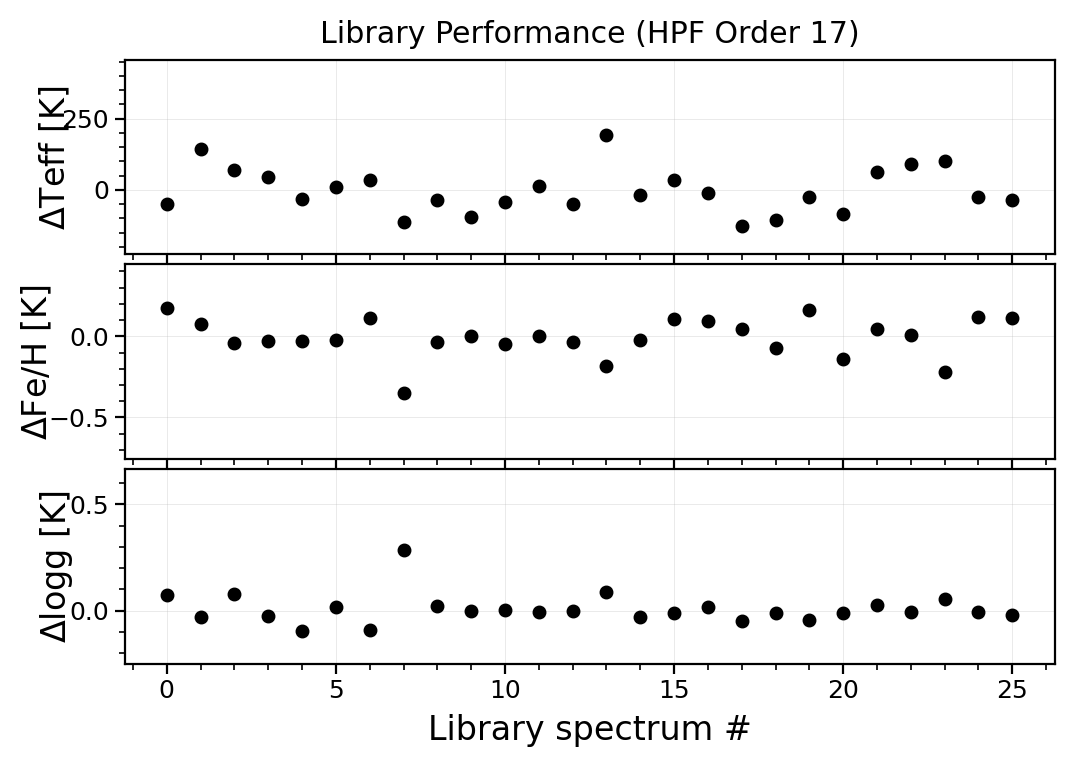

In [37]:
import matplotlib.pyplot as plt
import astropylib.gkastro

df_lib_compare = pd.DataFrame(res,columns=['teff','feh','logg','vsini','d_teff','d_feh','d_logg','_','__'])
fig, (ax,bx,cx) = plt.subplots(nrows=3,sharex=True,dpi=200)
x =range(len(df_lib_compare))
label = 'std={:0.2f}K'.format(np.std(df_lib_compare.d_teff))
print(label)
ax.plot(df_lib_compare.d_teff,'k.',markersize=8)
ax.set_ylim(ax.get_ylim()[0]*1.6,ax.get_ylim()[1]*2.2)

label = 'std={:0.2f}dex'.format(np.std(df_lib_compare.d_feh))
print(label)
bx.plot(df_lib_compare.d_feh,'k.',markersize=8)
bx.set_ylim(bx.get_ylim()[0]*2.0,bx.get_ylim()[1]*2.2)

label = 'std={:0.2f}dex'.format(np.std(df_lib_compare.d_logg))
print(label)
cx.plot(df_lib_compare.d_logg,'k.',markersize=8)
cx.set_ylim(cx.get_ylim()[0]*2.2,cx.get_ylim()[1]*2.2)

for xx in (ax,bx,cx):
    astropylib.gkastro.ax_apply_settings(xx)
    xx.tick_params(labelsize=9,pad=2)
    xx.grid(lw=0.3)
    #xx.legend(bbox_to_anchor=(1.,1.),fontsize=12)
fig.subplots_adjust(hspace=0.05)
ax.set_ylabel('$\Delta$Teff [K]',fontsize=12,labelpad=-4)
bx.set_ylabel('$\Delta$Fe/H [K]',fontsize=12,labelpad=-2)
cx.set_ylabel('$\Delta$logg [K]',fontsize=12,labelpad=-2)
cx.set_xlabel('Library spectrum #',fontsize=12)
ax.set_title('Library Performance (HPF Order 17)')

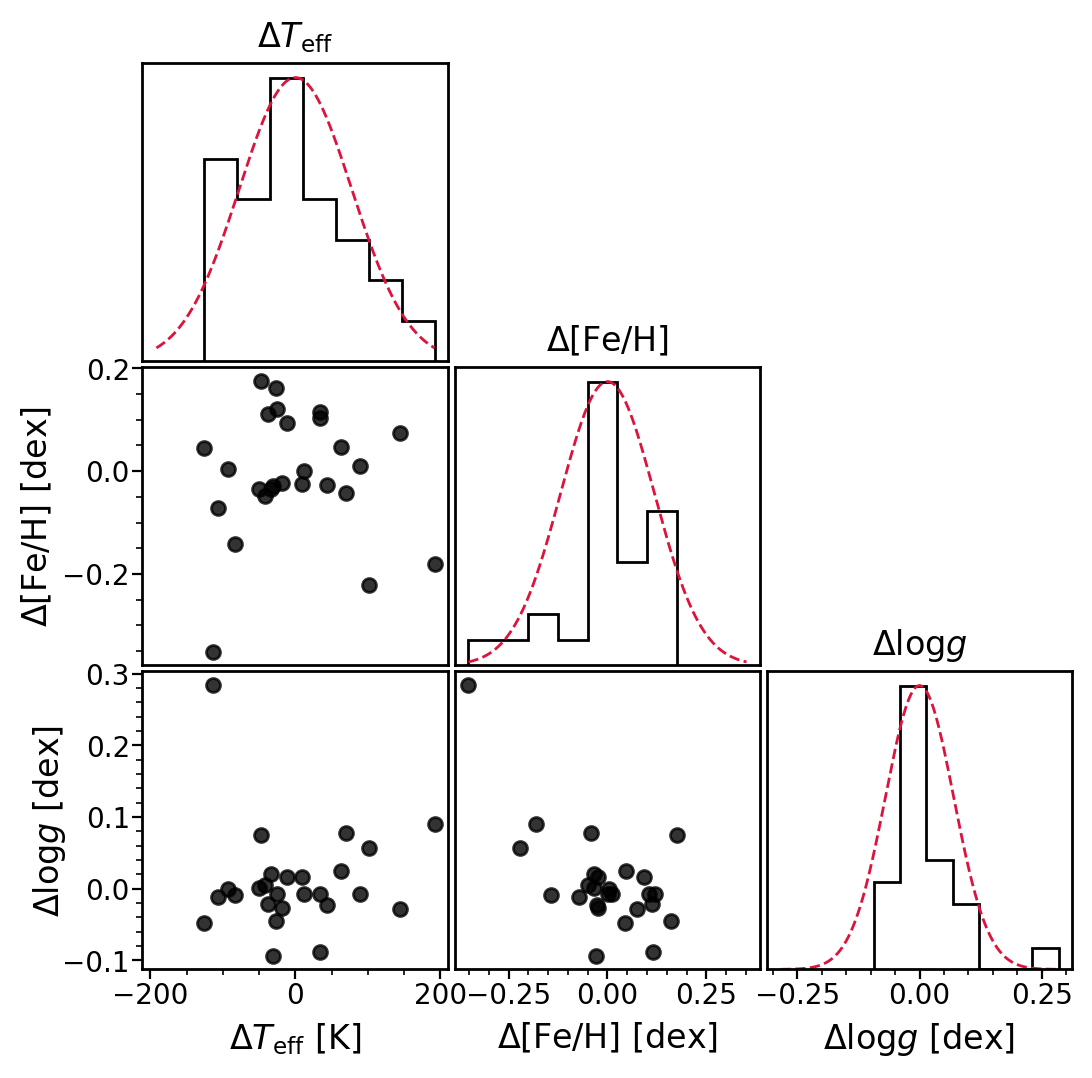

In [38]:
import astropy.modeling
dd = df_lib_compare[["d_teff","d_feh","d_logg"]]
fig, axx = plt.subplots(nrows=3,ncols=3,dpi=200,figsize=(6,6))

for xx in [axx[0,1],axx[0,2],axx[1,2]]:
    xx.axes.set_axis_off()
    
labels = ["$\Delta T_{\mathrm{eff}}$","$\Delta$[Fe/H]","$\Delta \log g$"]
xlabels = ["$\Delta T_{\mathrm{eff}}$ [K]","$\Delta$[Fe/H] [dex]","$\Delta \log g$ [dex]"]

#xlims = [xx.get_xlim() for xx in [axx[1,0],axx[2,0],axx[2,1]]]
xlims = []
diag = [axx[0,0],axx[1,1],axx[2,2]]
for i,xx in enumerate(diag):
    xx.set_title(labels[i],fontsize=12)
    _y, _x,_ = xx.hist(dd.iloc[:,i].values,color="black",histtype="step",bins=7,
                       range=[dd.iloc[:,i].values.min(),dd.iloc[:,i].values.max()])
    g = astropy.modeling.models.Gaussian1D(stddev=np.std(dd.iloc[:,i].values))
    xmax = np.max(np.abs(dd.iloc[:,i].values))
    x = np.linspace(-xmax,xmax,1000)
    y = (g(x)/(np.max(g(x))))*(np.max(_y))
    #print(np.max(y))
    xx.plot(x,y,color="crimson",lw=1,ls="--")
    #s = np.random.normal(0.,np.std(dd.iloc[:,i].values,),10000)
    #xx.hist(s,histtype="bar",normed=True,facecolor=cp[0],alpha=0.5,bins=100)
    if i == 0: 
        xx.xaxis.set_visible(False)
        xx.yaxis.set_visible(False)    
        #xx.set_xlim(xlims[0][0],xlims[0][1])
    if i == 1: 
        xx.xaxis.set_visible(False)
        xx.yaxis.set_visible(False)
        #xx.set_xlim(xlims[2][0],xlims[2][1])
    if i == 2: 
        xx.yaxis.set_visible(False)
    xlims.append(xx.get_xlim())

axx[1,0].plot(df_lib_compare.d_teff.values,df_lib_compare.d_feh.values,marker="o",lw=0,color="k",alpha=0.8)
axx[1,0].set_xlim(xlims[0][0],xlims[0][1])
axx[2,0].plot(df_lib_compare.d_teff.values,df_lib_compare.d_logg.values,marker="o",lw=0,color="k",alpha=0.8)
axx[2,0].set_xlim(xlims[0][0],xlims[0][1])
axx[2,1].plot(df_lib_compare.d_feh.values,df_lib_compare.d_logg.values,marker="o",lw=0,color="k",alpha=0.8)
axx[2,1].set_xlim(xlims[1][0],xlims[1][1])

axx[2,1].yaxis.set_visible(False)
axx[1,0].xaxis.set_visible(False)

axx[1,0].set_ylabel(xlabels[1],fontsize=12,labelpad=3)
axx[2,0].set_ylabel(xlabels[2],fontsize=12,labelpad=-2)
axx[2,0].set_xlabel(xlabels[0],fontsize=12)
axx[2,1].set_xlabel(xlabels[1],fontsize=12)
axx[2,2].set_xlabel(xlabels[2],fontsize=12)

#astropylib.gkastro.ax_axes_off()
for xx in axx.flatten():
    astropylib.gkastro.ax_apply_settings(xx,ticksize=10)
    xx.grid(lw=0)
    astropylib.gkastro.ax_set_linewidth(xx,1)
    xx.tick_params(pad=1)
    
fig.subplots_adjust(wspace=0.02,hspace=0.02)

In [39]:
np.std(df_lib_compare.d_teff.values)

77.69398023466658

In [40]:
np.std(df_lib_compare.d_logg)

0.06988338144021532

In [41]:
np.std(df_lib_compare.d_feh)

0.11857054099383246